# One Dimensional Sonar

In [1]:
using FFTW
using PyPlot
using SerialPorts
list_serialports()

33-element Array{String,1}:
 "/dev/ttyACM0"
 "/dev/ttyS0"  
 "/dev/ttyS1"  
 "/dev/ttyS10" 
 "/dev/ttyS11" 
 "/dev/ttyS12" 
 "/dev/ttyS13" 
 "/dev/ttyS14" 
 "/dev/ttyS15" 
 "/dev/ttyS16" 
 "/dev/ttyS17" 
 "/dev/ttyS18" 
 "/dev/ttyS19" 
 ⋮             
 "/dev/ttyS27" 
 "/dev/ttyS28" 
 "/dev/ttyS29" 
 "/dev/ttyS3"  
 "/dev/ttyS30" 
 "/dev/ttyS31" 
 "/dev/ttyS4"  
 "/dev/ttyS5"  
 "/dev/ttyS6"  
 "/dev/ttyS7"  
 "/dev/ttyS8"  
 "/dev/ttyS9"  

In [2]:
sp=SerialPort("/dev/ttyACM0", 9600)

SerialPort("/dev/ttyACM0", 9600, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x7f20056b1a90, open=True>(port='/dev/ttyACM0', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

## Chirp Pulse

In [158]:
x_rx=[2039, 2040, 2036, 2030, 2036, 2040, 2037, 2032, 2034, 2053, 2031, 2044, 2037, 2036, 2028, 2025, 2023, 2027, 2013, 2028, 2037, 2041, 2045, 2044, 2037, 2035, 2032, 2029, 2028, 2024, 2027, 2024, 2036, 2027, 2045, 2038, 2044, 2039, 2039, 2031, 2037, 2014, 2028, 2029, 2028, 2035, 2037, 2040, 2049, 2038, 2045, 2042, 2039, 2036, 2028, 2026, 2025, 2033, 2039, 2044, 2044, 2047, 2043, 2041, 2029, 2060, 2028, 2024, 2024, 2030, 2031, 2046, 2037, 2049, 2052, 2047, 2041, 2041, 2036, 2031, 2013, 2028, 2029, 2035, 2039, 2043, 2044, 2038, 2045, 2043, 2034, 2037, 2032, 2026, 2033, 2021, 2061, 2045, 2048, 2050, 2051, 2043, 2045, 2010, 2033, 2029, 2026, 2032, 2035, 2039, 2050, 2045, 2050, 2052, 2044, 2038, 2032, 2027, 2021, 2022, 2029, 2035, 2042, 2050, 2049, 2052, 2030, 2073, 2040, 2034, 2030, 2028, 2025, 2043, 2023, 2043, 2040, 2048, 2049, 2049, 2046, 2042, 2021, 2027, 2021, 2027, 2030, 2036, 2047, 2050, 2059, 2051, 2044, 2033, 2026, 2013, 2019, 2003, 2041, 2039, 2053, 2062, 2066, 2063, 2063, 2023, 2019, 2003, 2001, 2010, 2027, 2040, 2060, 2073, 2076, 2074, 2051, 2056, 2018, 1990, 1992, 1999, 2015, 2043, 2066, 2098, 2098, 2097, 2072, 2038, 2007, 1979, 1967, 1988, 1995, 2059, 2079, 2111, 2125, 2115, 2083, 2042, 1977, 1955, 1935, 1945, 1973, 2030, 2085, 2138, 2146, 2153, 2116, 2057, 1991, 1933, 1902, 1896, 1932, 1994, 2073, 2150, 2191, 2194, 2168, 2091, 2012, 1923, 1865, 1851, 1885, 1945, 2051, 2125, 2217, 2244, 2223, 2152, 2049, 1940, 1856, 1792, 1814, 1882, 1988, 2113, 2226, 2297, 2291, 2234, 2122, 1990, 1864, 1777, 1749, 1808, 1898, 2063, 2201, 2310, 2349, 2313, 2196, 2056, 1878, 1762, 1700, 1718, 1819, 1977, 2148, 2302, 2373, 2392, 2303, 2149, 1960, 1787, 1677, 1641, 1713, 1861, 2059, 2250, 2396, 2454, 2409, 2256, 2082, 1863, 1696, 1605, 1626, 1743, 1943, 2153, 2360, 2485, 2494, 2393, 2198, 1966, 1752, 1578, 1551, 1622, 1802, 2040, 2280, 2467, 2541, 2510, 2343, 2107, 1849, 1636, 1513, 1528, 1641, 1893, 2150, 2395, 2552, 2581, 2477, 2263, 1972, 1727, 1534, 1467, 1538, 1736, 1998, 2294, 2494, 2617, 2590, 2419, 2156, 1854, 1610, 1456, 1446, 1578, 1829, 2131, 2410, 2596, 2665, 2551, 2354, 2035, 1729, 1500, 1400, 1449, 1658, 1930, 2261, 2521, 2677, 2663, 2498, 2215, 1893, 1582, 1413, 1368, 1497, 1754, 2076, 2402, 2622, 2719, 2637, 2408, 2089, 1759, 1486, 1353, 1370, 1591, 1873, 2223, 2524, 2717, 2732, 2592, 2295, 1954, 1623, 1390, 1311, 1415, 1667, 2014, 2351, 2638, 2761, 2708, 2494, 2166, 1801, 1487, 1316, 1316, 1494, 1800, 2168, 2504, 2744, 2772, 2672, 2374, 2012, 1647, 1376, 1270, 1351, 1581, 1950, 2328, 2638, 2792, 2769, 2564, 2237, 1845, 1517, 1302, 1265, 1417, 1719, 2105, 2476, 2750, 2829, 2726, 2453, 2080, 1694, 1400, 1227, 1316, 1527, 1878, 2275, 2617, 2815, 2836, 2631, 2305, 1906, 1535, 1286, 1224, 1357, 1660, 2041, 2443, 2738, 2854, 2782, 2518, 2145, 1729, 1404, 1229, 1249, 1463, 1819, 2228, 2601, 2810, 2870, 2694, 2364, 1962, 1574, 1299, 1215, 1303, 1604, 2004, 2406, 2714, 2865, 2813, 2568, 2181, 1774, 1421, 1215, 1215, 1414, 1765, 2181, 2573, 2822, 2884, 2731, 2414, 1996, 1601, 1290, 1192, 1278, 1556, 1955, 2378, 2710, 2883, 2829, 2607, 2230, 1808, 1434, 1213, 1191, 1381, 1707, 2149, 2546, 2816, 2894, 2760, 2447, 2027, 1616, 1300, 1176, 1250, 1524, 1920, 2350, 2688, 2905, 2858, 2635, 2259, 1830, 1451, 1221, 1166, 1352, 1703, 2129, 2536, 2817, 2907, 2782, 2467, 2059, 1637, 1309, 1164, 1229, 1500, 1894, 2339, 2696, 2894, 2874, 2662, 2280, 1853, 1449, 1229, 1169, 1336, 1683, 2113, 2526, 2822, 2914, 2800, 2489, 2071, 1647, 1310, 1156, 1219, 1475, 1889, 2324, 2693, 2901, 2884, 2672, 2290, 1855, 1468, 1214, 1164, 1330, 1671, 2109, 2513, 2841, 2920, 2800, 2495, 2075, 1645, 1319, 1145, 1216, 1480, 1886, 2325, 2691, 2897, 2888, 2652, 2290, 1854, 1464, 1213, 1158, 1326, 1664, 2110, 2527, 2817, 2921, 2802, 2495, 2081, 1632, 1331, 1159, 1214, 1485, 1888, 2323, 2701, 2888, 2886, 2666, 2286, 1844, 1455, 1205, 1164, 1312, 1678, 2119, 2529, 2825, 2923, 2801, 2482, 2063, 1634, 1305, 1154, 1226, 1499, 1914, 2332, 2721, 2902, 2884, 2651, 2271, 1827, 1452, 1202, 1171, 1353, 1705, 2138, 2546, 2831, 2917, 2790, 2471, 2047, 1623, 1299, 1162, 1240, 1519, 1924, 2360, 2712, 2902, 2872, 2633, 2247, 1810, 1435, 1199, 1177, 1366, 1725, 2164, 2565, 2837, 2916, 2757, 2453, 2015, 1594, 1288, 1164, 1252, 1555, 1936, 2383, 2721, 2894, 2854, 2609, 2221, 1790, 1405, 1199, 1190, 1393, 1758, 2190, 2588, 2840, 2900, 2735, 2401, 1971, 1567, 1272, 1176, 1269, 1602, 1996, 2418, 2751, 2895, 2829, 2577, 2163, 1747, 1393, 1195, 1216, 1434, 1802, 2234, 2607, 2849, 2883, 2699, 2358, 1936, 1538, 1262, 1185, 1315, 1633, 2041, 2457, 2766, 2893, 2787, 2541, 2130, 1710, 1373, 1203, 1240, 1489, 1847, 2285, 2643, 2848, 2857, 2659, 2307, 1890, 1490, 1254, 1200, 1357, 1686, 2095, 2495, 2782, 2880, 2759, 2467, 2068, 1659, 1339, 1208, 1262, 1549, 1920, 2329, 2669, 2854, 2830, 2619, 2231, 1828, 1468, 1250, 1228, 1409, 1745, 2159, 2526, 2788, 2856, 2715, 2404, 2002, 1614, 1327, 1225, 1315, 1599, 1984, 2383, 2698, 2851, 2787, 2570, 2181, 1769, 1429, 1235, 1247, 1469, 1803, 2218, 2585, 2809, 2838, 2671, 2339, 1945, 1554, 1301, 1223, 1352, 1660, 2048, 2440, 2728, 2849, 2758, 2492, 2113, 1720, 1391, 1241, 1270, 1542, 1881, 2283, 2624, 2828, 2817, 2623, 2259, 1875, 1515, 1283, 1247, 1406, 1719, 2114, 2490, 2759, 2843, 2720, 2430, 2036, 1652, 1352, 1241, 1315, 1574, 1954, 2354, 2668, 2840, 2780, 2598, 2211, 1806, 1464, 1266, 1253, 1447, 1762, 2180, 2541, 2786, 2829, 2680, 2368, 1978, 1595, 1328, 1241, 1350, 1634, 2017, 2415, 2695, 2836, 2763, 2510, 2132, 1737, 1413, 1247, 1261, 1509, 1849, 2254, 2595, 2806, 2816, 2640, 2280, 1899, 1533, 1297, 1244, 1386, 1687, 2089, 2460, 2743, 2840, 2722, 2447, 2065, 1682, 1378, 1252, 1313, 1561, 1928, 2321, 2637, 2825, 2775, 2599, 2225, 1833, 1487, 1282, 1264, 1445, 1744, 2162, 2524, 2764, 2820, 2677, 2378, 1987, 1606, 1355, 1263, 1358, 1632, 2002, 2387, 2679, 2814, 2753, 2504, 2143, 1753, 1436, 1273, 1280, 1530, 1853, 2240, 2580, 2782, 2791, 2622, 2282, 1907, 1552, 1322, 1277, 1412, 1714, 2093, 2452, 2718, 2798, 2696, 2422, 2048, 1676, 1397, 1279, 1343, 1589, 1945, 2324, 2624, 2790, 2736, 2559, 2194, 1817, 1501, 1317, 1309, 1495, 1797, 2185, 2518, 2726, 2765, 2619, 2328, 1961, 1600, 1372, 1311, 1416, 1690, 2044, 2404, 2660, 2769, 2688, 2435, 2087, 1731, 1445, 1316, 1359, 1599, 1916, 2279, 2577, 2739, 2726, 2548, 2207, 1857, 1540, 1355, 1341, 1501, 1797, 2155, 2461, 2687, 2735, 2604, 2338, 1984, 1650, 1410, 1333, 1430, 1683, 2021, 2364, 2623, 2742, 2649, 2449, 2103, 1761, 1482, 1350, 1390, 1597, 1904, 2252, 2541, 2706, 2697, 2523, 2221, 1877, 1559, 1386, 1364, 1521, 1800, 2132, 2447, 2647, 2700, 2581, 2326, 1988, 1671, 1438, 1370, 1454, 1717, 2028, 2351, 2593, 2698, 2628, 2423, 2092, 1770, 1510, 1384, 1422, 1615, 1920, 2245, 2502, 2667, 2656, 2484, 2202, 1878, 1593, 1416, 1407, 1548, 1820, 2147, 2436, 2624, 2677, 2540, 2317, 1978, 1678, 1469, 1400, 1496, 1739, 2032, 2354, 2581, 2675, 2593, 2381, 2077, 1770, 1521, 1414, 1461, 1648, 1943, 2257, 2509, 2642, 2618, 2444, 2171, 1857, 1596, 1445, 1449, 1587, 1873, 2167, 2437, 2605, 2642, 2503, 2253, 1927, 1672, 1479, 1435, 1546, 1777, 2072, 2363, 2564, 2641, 2529, 2333, 2049, 1753, 1532, 1444, 1513, 1711, 1980, 2283, 2510, 2616, 2577, 2399, 2127, 1824, 1590, 1465, 1483, 1649, 1906, 2193, 2455, 2580, 2619, 2457, 2206, 1925, 1658, 1492, 1479, 1583, 1833, 2120, 2387, 2558, 2596, 2501, 2284, 1990, 1734, 1544, 1478, 1561, 1762, 2044, 2307, 2514, 2593, 2532, 2342, 2077, 1809, 1591, 1472, 1550, 1709, 1966, 2240, 2467, 2575, 2564, 2395, 2145, 1874, 1642, 1506, 1514, 1655, 1888, 2150, 2396, 2546, 2559, 2442, 2211, 1942, 1701, 1543, 1503, 1608, 1829, 2098, 2350, 2529, 2556, 2503, 2276, 2015, 1761, 1574, 1512, 1583, 1755, 2029, 2283, 2479, 2560, 2506, 2329, 2086, 1817, 1626, 1527, 1557, 1719, 1958, 2222, 2431, 2543, 2520, 2375, 2147, 1885, 1660, 1539, 1538, 1684, 1894, 2158, 2377, 2513, 2524, 2422, 2181, 1945, 1717, 1571, 1542, 1641, 1838, 2098, 2322, 2495, 2538, 2453, 2258, 2011, 1771, 1599, 1548, 1610, 1789, 2032, 2274, 2450, 2537, 2469, 2321, 2079, 1830, 1644, 1555, 1585, 1744, 1942, 2215, 2415, 2515, 2496, 2354, 2136, 1892, 1675, 1562, 1570, 1698, 1914, 2155, 2371, 2499, 2508, 2397, 2184, 1940, 1722, 1580, 1574, 1656, 1883, 2097, 2331, 2485, 2518, 2426, 2245, 1980, 1772, 1609, 1560, 1626, 1799, 2042, 2285, 2443, 2521, 2462, 2291, 2063, 1822, 1645, 1556, 1612, 1757, 1983, 2230, 2423, 2509, 2496, 2337, 2133, 1875, 1678, 1570, 1584, 1712, 1929, 2147, 2373, 2499, 2502, 2384, 2174, 1930, 1717, 1572, 1564, 1672, 1866, 2109, 2335, 2487, 2515, 2429, 2233, 1993, 1762, 1602, 1557, 1642, 1794, 2069, 2286, 2456, 2518, 2457, 2287, 2059, 1806, 1634, 1553, 1598, 1769, 1989, 2231, 2428, 2504, 2483, 2343, 2117, 1877, 1671, 1564, 1572, 1719, 1926, 2170, 2379, 2498, 2496, 2383, 2162, 1958, 1718, 1589, 1575, 1682, 1875, 2127, 2309, 2473, 2501, 2414, 2222, 1986, 1765, 1617, 1562, 1648, 1822, 2053, 2283, 2444, 2507, 2437, 2270, 2043, 1813, 1646, 1577, 1622, 1792, 1993, 2249, 2407, 2487, 2452, 2317, 2092, 1875, 1675, 1591, 1611, 1745, 1952, 2177, 2367, 2477, 2455, 2343, 2145, 1918, 1725, 1610, 1615, 1714, 1907, 2134, 2324, 2449, 2464, 2367, 2196, 1958, 1790, 1642, 1611, 1697, 1869, 2085, 2295, 2410, 2455, 2384, 2220, 2009, 1806, 1667, 1620, 1669, 1833, 2041, 2254, 2393, 2445, 2393, 2245, 2051, 1844, 1696, 1628, 1672, 1797, 2008, 2191, 2381, 2425, 2396, 2272, 2087, 1883, 1730, 1635, 1664, 1779, 1963, 2166, 2337, 2415, 2406, 2274, 2114, 1926, 1758, 1663, 1665, 1765, 1932, 2131, 2296, 2395, 2399, 2307, 2146, 1959, 1779, 1693, 1673, 1753, 1910, 2099, 2272, 2396, 2382, 2320, 2172, 1981, 1808, 1697, 1673, 1746, 1873, 2074, 2249, 2367, 2397, 2328, 2193, 2012, 1844, 1721, 1683, 1733, 1871, 2047, 2227, 2334, 2406, 2333, 2205, 2034, 1867, 1743, 1697, 1715, 1853, 2026, 2196, 2322, 2379, 2341, 2227, 2043, 1886, 1752, 1694, 1729, 1838, 2008, 2171, 2302, 2364, 2357, 2241, 2083, 1908, 1778, 1697, 1743, 1824, 1977, 2147, 2282, 2352, 2353, 2236, 2102, 1936, 1792, 1717, 1721, 1814, 1970, 2116, 2272, 2349, 2345, 2264, 2116, 1953, 1808, 1728, 1726, 1807, 1952, 2111, 2251, 2341, 2329, 2268, 2133, 1967, 1829, 1742, 1733, 1807, 1933, 2101, 2231, 2334, 2342, 2275, 2153, 1986, 1839, 1753, 1721, 1795, 1924, 2075, 2220, 2317, 2335, 2283, 2151, 2000, 1855, 1759, 1738, 1794, 1911, 2062, 2211
, 2306, 2337, 2289, 2173, 2019, 1873, 1757, 1750, 1781, 1893, 2044, 2190, 2294, 2340, 2278, 2184, 2035, 1886, 1769, 1732, 1774, 1886, 2018, 2180, 2287, 2329, 2300, 2195, 2046, 1898, 1784, 1737, 1769, 1867, 2020, 2164, 2281, 2325, 2324, 2207, 2060, 1913, 1792, 1737, 1772, 1840, 2003, 2149, 2266, 2322, 2306, 2212, 2077, 1923, 1809, 1744, 1761, 1848, 1985, 2138, 2257, 2322, 2310, 2222, 2088, 1944, 1810, 1755, 1748, 1864, 1977, 2125, 2251, 2321, 2311, 2241, 2087, 1956, 1829, 1762, 1759, 1836, 1966, 2118, 2235, 2319, 2317, 2240, 2114, 1968, 1840, 1758, 1760, 1823, 1954, 2102, 2235, 2308, 2323, 2241, 2153, 1981, 1847, 1775, 1764, 1820, 1949, 2071, 2222, 2304, 2319, 2258, 2139, 1987, 1856, 1765, 1759, 1818, 1933, 2077, 2210, 2303, 2315, 2267, 2147, 1997, 1866, 1779, 1756, 1818, 1913, 2086, 2201, 2295, 2319, 2272, 2155, 2016, 1865, 1779, 1752, 1799, 1912, 2050, 2192, 2297, 2306, 2276, 2170, 2026, 1889, 1779, 1752, 1787, 1906, 2041, 2182, 2284, 2325, 2283, 2188, 2031, 1907, 1783, 1748, 1784, 1889, 2025, 2181, 2271, 2326, 2293, 2189, 2047, 1898, 1785, 1743, 1754, 1872, 2021, 2165, 2279, 2328, 2309, 2204, 2064, 1913, 1789, 1736, 1762, 1854, 2015, 2146, 2293, 2335, 2317, 2223, 2082, 1927, 1807, 1728, 1753, 1843, 1987, 2149, 2271, 2334, 2327, 2230, 2101, 1944, 1808, 1735, 1738, 1827, 1966, 2131, 2256, 2334, 2331, 2256, 2118, 1969, 1812, 1760, 1736, 1811, 1945, 2105, 2244, 2337, 2324, 2270, 2137, 1978, 1838, 1751, 1738, 1810, 1921, 2086, 2231, 2323, 2344, 2278, 2152, 1991, 1859, 1760, 1736, 1791, 1918, 2069, 2218, 2305, 2358, 2282, 2166, 2013, 1866, 1769, 1745, 1794, 1909, 2055, 2193, 2294, 2322, 2276, 2165, 2020, 1880, 1781, 1750, 1800, 1903, 2045, 2185, 2282, 2314, 2274, 2170, 2032, 1898, 1800, 1764, 1801, 1899, 2032, 2166, 2264, 2302, 2267, 2172, 2037, 1910, 1813, 1779, 1808, 1898, 2023, 2153, 2250, 2288, 2263, 2172, 2043, 1917, 1823, 1791, 1819, 1907, 2026, 2152, 2241, 2283, 2259, 2173, 2049, 1930, 1835, 1800, 1822, 1909, 2020, 2141, 2229, 2270, 2242, 2166, 2048, 1932, 1841, 1807, 1836, 1915, 2027, 2136, 2222, 2258, 2234, 2161, 2050, 1938, 1850, 1822, 1846, 1926, 2033, 2142, 2222, 2253, 2225, 2152, 2043, 1934, 1853, 1826, 1852, 1929, 2030, 2137, 2215, 2246, 2220, 2141, 2039, 1932, 1853, 1829, 1860, 1936, 2036, 2136, 2210, 2243, 2212, 2135, 2029, 1937, 1851, 1830, 1863, 1945, 2046, 2147, 2211, 2232, 2205, 2129, 2026, 1933, 1859, 1838, 1873, 1949, 2052, 2147, 2211, 2226, 2197, 2126, 2027, 1925, 1859, 1841, 1872, 1946, 2046, 2145, 2208, 2232, 2202, 2129, 2031, 1930, 1863, 1845, 1875, 1950, 2049, 2145, 2211, 2232, 2205, 2132, 2034, 1935, 1866, 1842, 1865, 1934, 2032, 2135, 2205, 2235, 2213, 2141, 2047, 1941, 1867, 1832, 1851, 1923, 2017, 2122, 2207, 2241, 2230, 2167, 2070, 1964, 1881, 1829, 1840, 1893, 1983, 2095, 2187, 2234, 2240, 2189, 2095, 1994, 1902, 1838, 1833, 1874, 1960, 2061, 2158, 2225, 2247, 2212, 2131, 2024, 1924, 1845, 1822, 1860, 1924, 2021, 2124, 2206, 2250, 2231, 2169, 2073, 1969, 1875, 1829, 1834, 1890, 1978, 2087, 2181, 2237, 2243, 2196, 2109, 2006, 1910, 1847, 1833, 1875, 1943, 2045, 2143, 2213, 2241, 2223, 2153, 2056, 1954, 1874, 1837, 1850, 1905, 1989, 2091, 2178, 2232, 2230, 2187, 2099, 2000, 1910, 1851, 1840, 1880, 1941, 2043, 2133, 2200, 2226, 2208, 2140, 2045, 1953, 1878, 1847, 1865, 1919, 2001, 2096, 2175, 2213, 2210, 2172, 2091, 1999, 1918, 1867, 1859, 1900, 1961, 2046, 2130, 2188, 2207, 2183, 2122, 2048, 1964, 1898, 1867, 1886, 1931, 2003, 2083, 2153, 2192, 2189, 2148, 2078, 2002, 1932, 1884, 1876, 1907, 1967, 2048, 2123, 2172, 2183, 2160, 2105, 2043, 1957, 1912, 1886, 1902, 1947, 2009, 2086, 2144, 2173, 2167, 2128, 2068, 2005, 1942, 1910, 1907, 1931, 1979, 2050, 2111, 2150, 2163, 2141, 2093, 2034, 1977, 1933, 1914, 1927, 1964, 2018, 2075, 2125, 2151, 2145, 2111, 2065, 2013, 1958, 1929, 1927, 1952, 1994, 2050, 2101, 2142, 2142, 2122, 2087, 2038, 1989, 1951, 1939, 1950, 1983, 2030, 2073, 2116, 2137, 2125, 2101, 2059, 2008, 1970, 1949, 1950, 1975, 2011, 2049, 2089, 2119, 2125, 2112, 2081, 2039, 2000, 1968, 1956, 1964, 1994, 2027, 2062, 2093, 2113, 2114, 2095, 2060, 2019, 1980, 1961, 1961, 1983, 2013, 2049, 2081, 2108, 2112, 2100, 2072, 2038, 2003, 1975, 1970, 1979, 2003, 2029, 2059, 2085, 2100, 2099, 2082, 2055, 2019, 1989, 1974, 1978, 1995, 2020, 2045, 2074, 2096, 2102, 2090, 2069, 2040, 2009, 1987, 1983, 1995, 2010, 2038, 2064, 2089, 2098, 2097, 2080, 2055, 2024, 1999, 1983, 1990, 2006, 2026, 2050, 2075, 2087, 2090, 2083, 2064, 2035, 2010, 1993, 1986, 1996, 2012, 2032, 2057, 2078, 2091, 2083, 2067, 2044, 2018, 2001, 1991, 1996, 2011, 2022, 2045, 2066, 2085, 2085, 2079, 2061, 2033, 2013, 1992, 1989, 2005, 2015, 2029, 2055, 2072, 2081, 2082, 2069, 2048, 2025, 2007, 1996, 2000, 2019, 2025, 2044, 2062, 2075, 2076, 2066, 2053, 2032, 2012, 2001, 2000, 2010, 2025, 2039, 2055, 2071, 2073, 2076, 2061, 2044, 2021, 2007, 2001, 2004, 2013, 2028, 2044, 2058, 2072, 2073, 2069, 2054, 2035, 2016, 2008, 2003, 2010, 2026, 2040, 2056, 2067, 2071, 2067, 2053, 2039, 2025, 2013, 2007, 2007, 2016, 2029, 2045, 2058, 2068, 2068, 2060, 2043, 2027, 2014, 2008, 2008, 2017, 2029, 2040, 2053, 2061, 2064, 2063, 2053, 2037, 2026, 2018, 2015, 2017, 2027, 2031, 2044, 2054, 2063, 2062, 2056, 2045, 2031, 2023, 2013, 2014, 2023, 2027, 2035, 2046, 2057, 2061, 2059, 2046, 2036, 2023, 2015, 2012, 2014, 2033, 2037, 2047, 2055, 2061, 2059, 2051, 2037, 2026, 2021, 2017, 2018, 2026, 2035, 2042, 2053, 2060, 2061, 2053, 2047, 2035, 2023, 2016, 2016, 2016, 2030, 2038, 2046, 2052, 2055, 2053, 2048, 2042, 2032, 2027, 2019, 2017, 2026, 2035, 2042, 2052, 2057, 2055, 2052, 2041, 2038, 2027, 2020, 2015, 2021, 2027, 2029, 2043, 2048, 2052, 2049, 2049, 2043, 2028, 2023, 2019, 2014, 2026, 2034, 2045, 2054, 2057, 2059, 2049, 2044, 2036, 2025, 2022, 2024, 2022, 2031, 2042, 2049, 2057, 2058, 2057, 2049, 2042, 2032, 2028, 2023, 2021, 2030, 2033, 2046, 2053, 2052, 2052, 2046, 2041, 2037, 2029, 2025, 2026, 2033, 2041, 2042, 2051, 2050, 2054, 2051, 2043, 2037, 2027, 2023, 2021, 2022, 2029, 2033, 2042, 2050, 2058, 2057, 2049, 2045, 2038, 2030, 2028, 2023, 2028, 2038, 2040, 2047, 2047, 2049, 2051, 2039, 2032, 2028, 2024, 2022, 2026, 2034, 2042, 2047, 2050, 2052, 2052, 2044, 2038, 2034, 2030, 2024, 2025, 2028, 2034, 2044, 2043, 2045, 2045, 2043, 2040, 2034, 2035, 2029, 2025, 2029, 2032, 2039, 2040, 2045, 2047, 2044, 2043, 2037, 2030, 2030, 2027, 2028, 2026, 2030, 2038, 2041, 2045, 2046, 2047, 2042, 2040, 2035, 2032, 2029, 2026, 2039, 2034, 2041, 2048, 2048, 2048, 2045, 2041, 2037, 2037, 2033, 2031, 2034, 2038, 2040, 2042, 2050, 2050, 2050, 2049, 2041, 2043, 2032, 2035, 2029, 2033, 2037, 2038, 2045, 2045, 2047, 2037, 2041, 2037, 2037, 2031, 2031, 2031, 2038, 2037, 2037, 2041, 2048, 2043, 2041, 2040, 2034, 2041, 2033, 2034, 2038, 2038, 2043, 2039, 2042, 2045, 2042, 2043, 2036, 2033, 2037, 2031, 2032, 2033, 2038, 2039, 2040, 2042, 2048, 2043, 2037, 2034, 2034, 2035, 2033, 2039, 2037, 2037, 2041, 2044, 2042, 2045, 2045, 2039, 2033, 2034, 2034, 2037, 2042, 2038, 2044, 2044, 2042, 2042, 2041, 2043, 2035, 2031, 2030, 2032, 2035, 2033, 2041, 2043, 2040, 2043, 2038, 2035, 2033, 2036, 2033, 2034, 2038, 2037, 2038, 2037, 2039, 2040, 2041, 2042, 2040, 2039, 2036, 2032, 2035, 2034, 2039, 2040, 2043, 2040, 2044, 2037, 2039, 2037, 2037, 2033, 2035, 2036, 2031, 2035, 2035, 2033, 2036, 2037, 2038, 2038, 2039, 2035, 2033, 2035, 2034, 2037, 2037, 2040, 2041, 2048, 2045, 2042, 2042, 2037, 2037, 2034, 2037, 2035, 2036, 2035, 2037, 2040, 2042, 2041, 2039, 2036, 2030, 2032, 2030, 2036, 2037, 2034, 2040, 2041, 2043, 2038, 2040, 2042, 2041, 2038, 2038, 2036, 2038, 2040, 2037, 2039, 2040, 2042, 2045, 2041, 2042, 2040, 2035, 2037, 2038, 2037, 2033, 2040, 2041, 2045, 2042, 2044, 2041, 2038, 2038, 2028, 2037, 2036, 2034, 2039, 2039, 2040, 2038, 2044, 2036, 2037, 2034, 2036, 2034, 2037, 2038, 2038, 2042, 2041, 2047, 2044, 2038, 2040, 2039, 2036, 2032, 2034, 2041, 2040, 2039, 2041, 2043, 2039, 2040, 2038, 2037, 2035, 2031, 2033, 2038, 2040, 2038, 2038, 2042, 2042, 2047, 2041, 2041, 2040, 2041, 2041, 2039, 2041, 2041, 2041, 2043, 2041, 2043, 2039, 2037, 2036, 2033, 2036, 2032, 2037, 2035, 2035, 2036, 2035, 2037, 2038, 2041, 2040, 2041, 2038, 2036, 2036, 2033, 2037, 2037, 2042, 2045, 2043, 2040, 2039, 2036, 2034, 2039, 2036, 2039, 2036, 2032, 2036, 2036, 2038, 2039, 2039, 2037, 2036, 2035, 2031, 2034, 2038, 2038, 2036, 2038, 2041, 2042, 2045, 2040, 2041, 2039, 2037, 2038, 2041, 2040, 2039, 2039, 2038, 2041, 2044, 2038, 2040, 2037, 2038, 2037, 2037, 2040, 2037, 2037, 2038, 2043, 2041, 2043, 2037, 2037, 2035, 2031, 2035, 2031, 2038, 2035, 2035, 2036, 2036, 2037, 2036, 2037, 2036, 2033, 2036, 2036, 2034, 2038, 2038, 2040, 2041, 2042, 2045, 2043, 2037, 2036, 2035, 2034, 2038, 2040, 2040, 2043, 2039, 2039, 2038, 2037, 2036, 2033, 2037, 2036, 2039, 2037, 2041, 2040, 2042, 2047, 2042, 2044, 2039, 2036, 2032, 2035, 2033, 2039, 2036, 2036, 2036, 2038, 2041, 2043, 2038, 2037, 2037, 2035, 2032, 2036, 2038, 2036, 2031, 2038, 2039, 2041, 2039, 2039, 2038, 2040, 2036, 2036, 2037, 2038, 2038, 2039, 2040, 2041, 2044, 2041, 2040, 2038, 2038, 2038, 2039, 2039, 2038, 2039, 2039, 2039, 2041, 2041, 2043, 2035, 2034, 2038, 2036, 2040, 2040, 2037, 2037, 2039, 2037, 2040, 2038, 2039, 2035, 2033, 2039, 2037, 2038, 2039, 2039, 2038, 2041, 2043, 2038, 2040, 2037, 2036, 2035, 2033, 2039, 2038, 2038, 2039, 2041, 2040, 2047, 2039, 2037, 2034, 2036, 2036, 2036, 2038, 2037, 2038, 2041, 2043, 2039, 2038, 2038, 2038, 2035, 2035, 2033, 2038, 2039, 2039, 2038, 2040, 2045, 2043, 2037, 2037, 2035, 2033, 2037, 2039, 2043, 2035, 2035, 2035, 2035, 2035, 2033, 2037, 2037, 2035, 2034, 2037, 2037, 2038, 2036, 2036, 2039, 2039, 2039, 2038, 2037, 2037, 2035, 2033, 2041, 2038, 2039, 2041, 2040, 2042, 2045, 2043, 2039, 2034, 2039, 2035, 2035, 2035, 2027, 2033, 2037, 2040, 2040, 2040, 2042, 2039, 2039, 2036, 2036, 2036, 2036, 2036, 2038, 2038, 2039, 2039, 2038, 2038, 2038, 2037, 2037, 2034, 2042, 2044, 2039, 2041, 2042, 2043, 2036, 2037, 2039, 2036, 2034, 2038, 2040, 2039, 2039, 2038, 2039, 2038, 2041, 2038, 2041, 2038, 2038, 2038, 2039, 2041, 2039, 2041, 2040, 2041, 2043, 2039, 2038, 2038, 2038, 2036, 2036, 2034, 2042, 2041, 2045, 2041, 2039, 2043, 2036, 2035, 2032, 2033, 2034, 2039, 2041, 2047, 2041, 2041, 2043, 2037, 2038, 2037, 2036, 2036, 2034, 2038, 2041, 2045, 2040, 2040,
 2041, 2042, 2043, 2039, 2036, 2033, 2035, 2037, 2038, 2041, 2041, 2042, 2042, 2042, 2044, 2038, 2041, 2040, 2039, 2037, 2033, 2042, 2042, 2045, 2040, 2041, 2042, 2044, 2036, 2035, 2034, 2038, 2038, 2039, 2041, 2043, 2039, 2036, 2036, 2034, 2037, 2038, 2035, 2034, 2038, 2037, 2041, 2046, 2042, 2042, 2043, 2043, 2034, 2039, 2035, 2033, 2038, 2038, 2039, 2040, 2040, 2037, 2037, 2037, 2037, 2036, 2034, 2036, 2034, 2040, 2041, 2043, 2039, 2035, 2035, 2032, 2036, 2036, 2035, 2033, 2037, 2036, 2037, 2035, 2035, 2036, 2033, 2037, 2037, 2037, 2038, 2038, 2037, 2037, 2037, 2036, 2037, 2037, 2037, 2037, 2040, 2038, 2037, 2035, 2033, 2036, 2037, 2034, 2040, 2044, 2041, 2040, 2039, 2039, 2037, 2037, 2036, 2035, 2033, 2038, 2038, 2041, 2042, 2043, 2035, 2037, 2038, 2035, 2032, 2035, 2034, 2038, 2041, 2041, 2043, 2040, 2038, 2037, 2037, 2036, 2035, 2033, 2038, 2039, 2039, 2038, 2039, 2043, 2035, 2031, 2034, 2037, 2037, 2037, 2036, 2034, 2039, 2039, 2039, 2040, 2035, 2032, 2034, 2040, 2039, 2036, 2039, 2035, 2036, 2034, 2040, 2037, 2039, 2038, 2038, 2039, 2040, 2037, 2037, 2037, 2037, 2037, 2036, 2037, 2040, 2039, 2035, 2034, 2036, 2037, 2035, 2034, 2038, 2040, 2041, 2043, 2039, 2035, 2035, 2032, 2034, 2039, 2037, 2038, 2038, 2042, 2044, 2041, 2043, 2037, 2037, 2033, 2036, 2035, 2033, 2038, 2039, 2040, 2039, 2039, 2037, 2039, 2036, 2036, 2034, 2037, 2037, 2037, 2042, 2039, 2040, 2041, 2040, 2039, 2039, 2037, 2037, 2038, 2038, 2039, 2037, 2037, 2036, 2037, 2037, 2038, 2039, 2037, 2038, 2039, 2039, 2037, 2037, 2038, 2038, 2040, 2040, 2038, 2039, 2041, 2039, 2033, 2040, 2037, 2038, 2041, 2041, 2042, 2044, 2042, 2044, 2040, 2039, 2036, 2034, 2037, 2039, 2038, 2041, 2041, 2041, 2043, 2039, 2039, 2039, 2038, 2037, 2036, 2034, 2039, 2040, 2041, 2043, 2039, 2039, 2038, 2040, 2037, 2035, 2033, 2041, 2040, 2041, 2043, 2039, 2039, 2039, 2039, 2037, 2039, 2038, 2036, 2035, 2033, 2038, 2042, 2042, 2044, 2039, 2039, 2037, 2038, 2040, 2037, 2038, 2036, 2037, 2039, 2039, 2038, 2039, 2038, 2041, 2041, 2044, 2037, 2035, 2032, 2037, 2037, 2040, 2041, 2043, 2037, 2034, 2042, 2043, 2039, 2036, 2032, 2035, 2036, 2036, 2038, 2040, 2040, 2039, 2036, 2035, 2036, 2033, 2035, 2035, 2035, 2034, 2041, 2043, 2040, 2038, 2038, 2039, 2038, 2041, 2040, 2038, 2039, 2040, 2041, 2042, 2045, 2041, 2044, 2039, 2036, 2040, 2041, 2039, 2037, 2039, 2038, 2042, 2044, 2041, 2042, 2041, 2043, 2040, 2036, 2033, 2038, 2039, 2041, 2043, 2041, 2044, 2040, 2041, 2040, 2037, 2040, 2037, 2036, 2036, 2039, 2040, 2042, 2044, 2040, 2038, 2037, 2036, 2037, 2036, 2037, 2037, 2038, 2041, 2043, 2038, 2040, 2039, 2039, 2037, 2038, 2039, 2038, 2038, 2039, 2041, 2043, 2040, 2043, 2034, 2039, 2036, 2036, 2036, 2041, 2038, 2037, 2038, 2040, 2041, 2042, 2043, 2036, 2035, 2034, 2038, 2043, 2035, 2033, 2036, 2035, 2036, 2036, 2034, 2040, 2041, 2039, 2038, 2038, 2041, 2040, 2038, 2040, 2042, 2045, 2042, 2045, 2036, 2039, 2037, 2037, 2037, 2037, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2041, 2037, 2034, 2041, 2045, 2042, 2038, 2039, 2042, 2045, 2043, 2039, 2038, 2037, 2037, 2037, 2040, 2039, 2038, 2038, 2039, 2040, 2038, 2038, 2039, 2041, 2041, 2043, 2038, 2038, 2038, 2037, 2037, 2038, 2039, 2040, 2037, 2040, 2041, 2041, 2040, 2039, 2040, 2040, 2040, 2039, 2039, 2038, 2039, 2037, 2038, 2037, 2038, 2040, 2041, 2041, 2042, 2043, 2038, 2040, 2038, 2039, 2037, 2037, 2038, 2040, 2042, 2039, 2039, 2038, 2040, 2041, 2040, 2040, 2038, 2038, 2039, 2039, 2040, 2038, 2041, 2041, 2042, 2043, 2041, 2039, 2039, 2037, 2042, 2043, 2037, 2039, 2037, 2036, 2035, 2033, 2036, 2035, 2033, 2036, 2035, 2036, 2035, 2036, 2035, 2033, 2035, 2032, 2035, 2033, 2038, 2041, 2041, 2042, 2045, 2041, 2047, 2039, 2033, 2039, 2038, 2039, 2037, 2039, 2037, 2041, 2041, 2042, 2044, 2039, 2037, 2035, 2033, 2041, 2041, 2040, 2042, 2044, 2038, 2041, 2042, 2044, 2040, 2033, 2036, 2035, 2035, 2035, 2034, 2037, 2038, 2038, 2043, 2039, 2035, 2033, 2036, 2035, 2032, 2035, 2034, 2042, 2041, 2044, 2039, 2039, 2041, 2039, 2036, 2034, 2040, 2038, 2039, 2038, 2039, 2038, 2040, 2039, 2040, 2041, 2037, 2034, 2040, 2039, 2038, 2043, 2039, 2037, 2037, 2037, 2034, 2043, 2035, 2032, 2034, 2041, 2040, 2042, 2042, 2046, 2043, 2037, 2037, 2035, 2034, 2037, 2036, 2036, 2035, 2033, 2037, 2036, 2036, 2036, 2033, 2037, 2040, 2040, 2036, 2036, 2038, 2037, 2044, 2036, 2035, 2036, 2035, 2034, 2041, 2040, 2039, 2034, 2035, 2036, 2035, 2037, 2037, 2037, 2038, 2038, 2039, 2038, 2038, 2038, 2039, 2037, 2039, 2038, 2042, 2041, 2042, 2041, 2042, 2045, 2042, 2041, 2043, 2038, 2039, 2039, 2038, 2039, 2037, 2038, 2038, 2040, 2036, 2035, 2036, 2033, 2036, 2036, 2036, 2036, 2035, 2033, 2037, 2037, 2037, 2041, 2041, 2039, 2037, 2037, 2039, 2040, 2039, 2039, 2037, 2037, 2038, 2040, 2039, 2037, 2040, 2037, 2039, 2033, 2042, 2043, 2040, 2038, 2038, 2040, 2042, 2042, 2043, 2036, 2037, 2037, 2038, 2039, 2039, 2037, 2036, 2034, 2041, 2039, 2037, 2037, 2038, 2040, 2041, 2041, 2040, 2037, 2036, 2034, 2042, 2042, 2045, 2041, 2040, 2041, 2042, 2043, 2037, 2038, 2038, 2039, 2039, 2039, 2037, 2038, 2039, 2037, 2036, 2035, 2034, 2038, 2038, 2038, 2038, 2041, 2044, 2040, 2039, 2039, 2038, 2039, 2037, 2037, 2038, 2039, 2039, 2038, 2042, 2044, 2036, 2036, 2034, 2039, 2038, 2039, 2038, 2038, 2039, 2037, 2041, 2042, 2041, 2042, 2043, 2038, 2039, 2042, 2041, 2042, 2044, 2038, 2041, 2043, 2039, 2036, 2036, 2036, 2033, 2039, 2035, 2035, 2035, 2033, 2034, 2043, 2042, 2039, 2037, 2038, 2039, 2039, 2039, 2038, 2040, 2038, 2040, 2040, 2043, 2038, 2038, 2039, 2037, 2037, 2037, 2037, 2040, 2039, 2040, 2041, 2044, 2036, 2035, 2034, 2037, 2039, 2036, 2037, 2037, 2038, 2040, 2041, 2042, 2046, 2042, 2042, 2043, 2039, 2038, 2041, 2040, 2042, 2042, 2043, 2038, 2041, 2042, 2042, 2041, 2041, 2043, 2037, 2040, 2042, 2039, 2041, 2040, 2039, 2042, 2043, 2037, 2039, 2037, 2037, 2037, 2039, 2039, 2038, 2038, 2040, 2040, 2045, 2039, 2036, 2035, 2034, 2040, 2039, 2039, 2038, 2039, 2038, 2039, 2041, 2042, 2042, 2043, 2038, 2038, 2039, 2038, 2038, 2040, 2041, 2044, 2042, 2043, 2040, 2036, 2034, 2039, 2040, 2041, 2042, 2043, 2039, 2038, 2038, 2042, 2043, 2036, 2035, 2035, 2033, 2038, 2038, 2041, 2041, 2043, 2037, 2040, 2038, 2040, 2038, 2039, 2039, 2038, 2039, 2038, 2041, 2041, 2043, 2037, 2038, 2040, 2039, 2036, 2037, 2037, 2038, 2039, 2040, 2040, 2042, 2042, 2046, 2040, 2041, 2040, 2038, 2039, 2040, 2039, 2039, 2037, 2038, 2039, 2037, 2042, 2040, 2035, 2037, 2037, 2036, 2038, 2040, 2040, 2035, 2038, 2040, 2038, 2044, 2036, 2035, 2034, 2039, 2037, 2041, 2042, 2043, 2040, 2040, 2038, 2041, 2039, 2041, 2039, 2037, 2036, 2038, 2037, 2040, 2040, 2039, 2038, 2041, 2039, 2038, 2043, 2037, 2037, 2039, 2040, 2039, 2037, 2038, 2041, 2042, 2048, 2041, 2040, 2037, 2040, 2038, 2039, 2039, 2040, 2040, 2041, 2038, 2045, 2039, 2037, 2037, 2038, 2039, 2040, 2033, 2039, 2039, 2038, 2039, 2037, 2039, 2041, 2038, 2039, 2038, 2037, 2036, 2039, 2038, 2040, 2039, 2037, 2039, 2033, 2042, 2043, 2037, 2037, 2039, 2036, 2039, 2039, 2036, 2035, 2034, 2041, 2042, 2040, 2040, 2040, 2040, 2040, 2040, 2040, 2039, 2039, 2039, 2037, 2040, 2038, 2039, 2036, 2037, 2037, 2039, 2038, 2040, 2039, 2040, 2041, 2040, 2041, 2039, 2038, 2039, 2038, 2040, 2040, 2041, 2042, 2043, 2039, 2037, 2040, 2036, 2036, 2033, 2037, 2038, 2040, 2041, 2041, 2044, 2040, 2040, 2040, 2038, 2038, 2037, 2030, 2039, 2039, 2037, 2040, 2039, 2038, 2041, 2046, 2037, 2037, 2037, 2034, 2040, 2039, 2037, 2040, 2037, 2037, 2038, 2041, 2042, 2042, 2045, 2042, 2044, 2040, 2042, 2041, 2043, 2038, 2040, 2041, 2040, 2040, 2040, 2038, 2039, 2034, 2044, 2038, 2041, 2041, 2042, 2039, 2039, 2040, 2038, 2038, 2038, 2037, 2040, 2041, 2044, 2039, 2039, 2037, 2037, 2043, 2033, 2037, 2037, 2036, 2033, 2038, 2040, 2041, 2041, 2039, 2038, 2037, 2039, 2037, 2037, 2036, 2035, 2035, 2035, 2034, 2036, 2036, 2035, 2033, 2035, 2027, 2031, 2033, 2037, 2037, 2038, 2037, 2039, 2037, 2037, 2037, 2037, 2040, 2037, 2038, 2037, 2037, 2036, 2036, 2036, 2037, 2037, 2037, 2037, 2043, 2032, 2034, 2037, 2037, 2038, 2041, 2041, 2043, 2039, 2038, 2038, 2036, 2038, 2038, 2037, 2033, 2036, 2037, 2036, 2038, 2038, 2041, 2040, 2040, 2043, 2034, 2038, 2038, 2037, 2039, 2039, 2037, 2037, 2038, 2043, 2036, 2032, 2038, 2039, 2036, 2034, 2039, 2036, 2035, 2036, 2032, 2035, 2033, 2038, 2042, 2039, 2039, 2037, 2032, 2038, 2040, 2039, 2038, 2039, 2036, 2037, 2028, 2035, 2033, 2031, 2035, 2035, 2036, 2033, 2040, 2037, 2037, 2037, 2037, 2042, 2041, 2041, 2041, 2042, 2043, 2039, 2037, 2039, 2038, 2036, 2037, 2035, 2037, 2036, 2033, 2036, 2036, 2039, 2038, 2040, 2043, 2032, 2036, 2036, 2040, 2035, 2035, 2034, 2037, 2040, 2038, 2040, 2039, 2040, 2039, 2039, 2038, 2039, 2040, 2036, 2034, 2038, 2040, 2041, 2042, 2043, 2040, 2038, 2039, 2044, 2036, 2035, 2030, 2035, 2035, 2034, 2036, 2037, 2036, 2036, 2035, 2033, 2038, 2039, 2036, 2035, 2035, 2036, 2039, 2038, 2037, 2037, 2038, 2037, 2039, 2038, 2037, 2035, 2036, 2036, 2035, 2034, 2043, 2037, 2038, 2039, 2037, 2041, 2043, 2036, 2036, 2035, 2035, 2035, 2033, 2034, 2039, 2038, 2039, 2045, 2038, 2038, 2037, 2038, 2038, 2039, 2041, 2040, 2041, 2042, 2043, 2038, 2041, 2040, 2041, 2041, 2043, 2041, 2041, 2043, 2037, 2036, 2036, 2035, 2040, 2036, 2036, 2035, 2036, 2034, 2039, 2040, 2040, 2040, 2039, 2037, 2037, 2039, 2039, 2037, 2037, 2039, 2040, 2040, 2040, 2038, 2038, 2041, 2041, 2047, 2038, 2040, 2039, 2038, 2039, 2039, 2040, 2037, 2038, 2040, 2038, 2040, 2041, 2040, 2039, 2040, 2037, 2040, 2039, 2039, 2037, 2038, 2038, 2038, 2042, 2045, 2039, 2037, 2039, 2040, 2040, 2038, 2041, 2041, 2042, 2043, 2037, 2041, 2041, 2041, 2043, 2039, 2038, 2041, 2042, 2043, 2037, 2038, 2038, 2041, 2040, 2041, 2041, 2042, 2043, 2039, 2040, 2041, 2043, 2038, 2037, 2037, 2041, 2041, 2041, 2042, 2043, 2040, 2039, 2039, 2041, 2040, 2040, 2040, 2046, 2039, 2037, 2037, 2037, 2041, 2042, 2043, 2038, 2039, 2038, 2039, 2038, 2042, 2043, 2036, 2037, 2037, 2039, 2038, 2037, 2040, 2037, 2040, 2042, 2043, 2036, 2034, 2038, 2038, 2041, 2043, 2039, 2038, 2040, 2037, 2037, 2038, 2038, 2037, 2040, 2038, 2039, 2039, 2038, 2039, 2039, 2040, 2039, 2038, 2048, 2039, 2039, 2034, 2038, 2041, 2041, 2040, 2040, 2041, 2042, 2043, 2039, 2037, 2040, 2037, 2039, 2038, 2039, 2040, 2038, 2039, 2039, 2039, 2037, 2038, 2038, 2038, 2039, 2039, 2039, 2038, 2041, 2037, 2042, 2044
, 2040, 2038, 2040, 2040, 2037, 2038, 2038, 2040, 2041, 2041, 2045, 2042, 2044, 2041, 2045, 2037, 2036, 2036, 2034, 2039, 2040, 2041, 2040, 2042, 2042, 2043, 2039, 2037, 2037, 2039, 2037, 2038, 2040, 2041, 2040, 2039, 2038, 2035, 2032, 2038, 2038, 2041, 2041, 2044, 2041, 2039, 2039, 2040, 2039, 2040, 2038, 2040, 2043, 2035, 2033, 2035, 2035, 2035, 2035, 2033, 2037, 2038, 2038, 2040, 2044, 2037, 2035, 2034, 2037, 2038, 2043, 2037, 2039, 2037, 2037, 2038, 2039, 2041, 2039, 2038, 2038, 2039, 2040, 2041, 2040, 2041, 2041, 2041, 2042, 2049, 2043, 2039, 2036, 2036, 2035, 2033, 2038, 2043, 2039, 2038, 2037, 2037, 2043, 2036, 2034, 2037, 2039, 2038, 2041, 2042, 2043, 2039, 2038, 2040, 2045, 2038, 2039, 2037, 2037, 2035, 2036, 2037, 2038, 2037, 2036, 2035, 2033, 2039, 2037, 2038, 2037, 2038, 2040, 2040, 2040, 2041, 2042, 2040, 2039, 2044, 2041, 2037, 2037, 2037, 2038, 2040, 2040, 2042, 2042, 2044, 2041, 2039, 2041, 2040, 2040, 2036, 2036, 2037, 2037, 2039, 2038, 2037, 2036, 2037, 2040, 2039, 2036, 2036, 2036, 2033, 2038, 2039, 2039, 2037, 2039, 2039, 2033, 2040, 2039, 2037, 2037, 2038, 2038, 2039, 2040, 2041, 2043, 2036, 2036, 2040, 2036, 2035, 2031, 2034, 2038, 2040, 2038, 2039, 2039, 2038, 2039, 2038, 2037, 2037, 2035, 2033, 2039, 2037, 2038, 2041, 2040, 2041, 2039, 2040, 2042, 2043, 2037, 2034, 2040, 2041, 2043, 2038, 2039, 2037, 2035, 2035, 2033, 2038, 2041, 2041, 2038, 2041, 2041, 2040, 2043, 2037, 2038, 2038, 2040, 2041, 2038, 2039, 2036, 2036, 2034, 2042, 2045, 2040, 2039, 2036, 2036, 2037, 2039, 2038, 2038, 2038, 2038, 2039, 2036, 2036, 2034, 2042, 2037, 2042, 2042, 2040, 2041, 2039, 2039, 2037, 2039, 2040, 2037, 2030, 2036, 2037, 2036, 2038, 2038, 2037, 2038, 2034, 2040, 2041, 2041, 2042, 2042, 2044, 2039, 2039, 2037, 2038, 2038, 2038, 2040, 2037, 2042, 2040, 2040, 2039, 2037, 2036, 2038, 2039, 2038, 2037, 2038, 2039, 2038, 2039, 2039, 2037, 2039, 2038, 2041, 2041, 2040, 2038, 2037, 2038, 2040, 2041, 2042, 2043, 2037, 2037, 2038, 2040, 2037, 2038, 2038, 2039, 2038, 2039, 2038, 2038, 2040, 2039, 2039, 2038, 2037, 2038, 2034, 2040, 2040, 2039, 2038, 2041, 2042, 2042, 2045, 2042, 2046, 2042, 2042, 2043, 2039, 2040, 2041, 2041, 2041, 2042, 2042, 2041, 2043, 2040, 2041, 2039, 2038, 2038, 2039, 2039, 2037, 2039, 2038, 2038, 2039, 2039, 2038, 2038, 2039, 2037, 2039, 2037, 2038, 2040, 2044, 2037, 2038, 2041, 2039, 2041, 2036, 2037, 2036, 2036, 2036, 2036, 2036, 2034, 2039, 2038, 2040, 2039, 2037, 2037, 2037, 2039, 2038, 2039, 2038, 2038, 2037, 2029, 2037, 2038, 2039, 2037, 2037, 2038, 2039, 2039, 2037, 2037, 2038, 2038, 2036, 2039, 2038, 2038, 2038, 2039, 2039, 2039, 2037, 2037, 2039, 2035, 2036, 2037, 2035, 2036, 2035, 2033, 2035, 2035, 2034, 2042, 2041, 2042, 2045, 2042, 2043, 2039, 2037, 2037, 2038, 2038, 2039, 2038, 2040, 2040, 2038, 2042, 2044, 2035, 2036, 2034, 2038, 2039, 2039, 2033, 2041, 2042, 2044, 2041, 2040, 2039, 2039, 2036, 2036, 2036, 2036, 2033, 2038, 2042, 2043, 2039, 2038, 2038, 2043, 2037, 2037, 2038, 2040, 2035, 2033, 2038, 2040, 2040, 2041, 2042, 2044, 2041, 2040, 2040, 2038, 2042, 2042, 2045, 2042, 2044, 2040, 2039, 2039, 2038, 2037, 2036, 2036, 2036, 2035, 2035, 2035, 2034, 2037, 2040, 2038, 2040, 2040, 2038, 2040, 2038, 2040, 2039, 2037, 2039, 2039, 2039, 2040, 2040, 2041, 2042, 2041, 2043, 2040, 2039, 2038, 2039, 2037, 2039, 2036, 2036, 2037, 2036, 2035, 2035, 2036, 2038, 2038, 2041, 2040, 2040, 2041, 2041, 2044, 2037, 2038, 2039, 2041, 2041, 2038, 2041, 2041, 2043, 2039, 2038, 2040, 2042, 2043, 2035, 2034, 2039, 2036, 2037, 2038, 2041, 2043, 2040, 2039, 2038, 2040, 2039, 2037, 2038, 2039, 2041, 2041, 2041, 2042, 2038, 2039, 2041, 2042, 2043, 2038, 2038, 2044, 2037, 2039, 2038, 2042, 2042, 2043, 2039, 2037, 2039, 2036, 2037, 2038, 2039, 2040, 2039, 2038, 2038, 2039, 2037, 2040, 2040, 2039, 2036, 2036, 2038, 2040, 2040, 2039, 2038, 2040, 2041, 2041, 2042, 2044, 2039, 2037, 2038, 2040, 2039, 2038, 2039, 2038, 2038, 2040, 2040, 2040, 2038, 2039, 2037, 2038, 2039, 2041, 2039, 2040, 2039, 2038, 2040, 2042, 2041, 2041, 2044, 2040, 2041, 2042, 2043, 2038, 2039, 2039, 2037, 2035, 2035, 2036, 2034, 2038, 2036, 2039, 2038, 2038, 2041, 2040, 2039, 2037, 2041, 2038, 2040, 2040, 2039, 2039, 2037, 2038, 2040, 2039, 2040, 2038, 2036, 2039, 2039, 2038, 2036, 2038, 2037, 2039, 2038, 2039, 2039, 2038, 2040, 2038, 2041, 2040, 2037, 2038, 2040, 2039, 2039, 2039, 2039, 2037, 2038, 2037, 2039, 2037, 2037, 2037, 2040, 2039, 2040, 2039, 2041, 2041, 2039, 2039, 2042, 2042, 2038, 2041, 2043, 2040, 2041, 2041, 2042, 2043, 2040, 2039, 2038, 2039, 2035, 2031, 2035, 2037, 2037, 2037, 2037, 2035, 2035, 2034, 2038, 2037, 2041, 2040, 2038, 2040, 2039, 2040, 2040, 2040, 2038, 2040, 2039, 2038, 2039, 2038, 2037, 2036, 2035, 2035, 2035, 2031, 2034, 2037, 2037, 2037, 2044, 2036, 2034, 2040, 2039, 2038, 2040, 2039, 2040, 2038, 2040, 2037, 2037, 2040, 2036, 2036, 2034, 2038, 2039, 2040, 2039, 2037, 2038, 2037, 2039, 2038, 2041, 2039, 2038, 2038, 2039, 2040, 2039, 2038, 2035, 2036, 2036, 2033, 2039, 2037, 2036, 2033, 2038, 2038, 2040, 2040, 2039, 2037, 2037, 2036, 2036, 2037, 2036, 2033, 2036, 2035, 2035, 2035, 2034, 2038, 2038, 2040, 2041, 2043, 2037, 2036, 2034, 2037, 2041, 2043, 2035, 2034, 2038, 2037, 2038, 2040, 2041, 2039, 2037, 2036, 2038, 2038, 2038, 2039, 2038, 2037, 2037, 2038, 2039, 2036, 2035, 2033, 2035, 2036, 2035, 2033, 2037, 2037, 2038, 2035, 2034, 2038, 2038, 2038, 2039, 2040, 2039, 2038, 2042, 2041, 2043, 2038, 2037, 2038, 2039, 2038, 2037, 2040, 2038, 2039, 2039, 2038, 2038, 2039, 2039, 2036, 2039, 2038, 2035, 2033, 2037, 2037, 2039, 2038, 2038, 2039, 2038, 2037, 2043, 2033, 2034, 2037, 2039, 2037, 2038, 2039, 2038, 2039, 2034, 2039, 2038, 2041, 2039, 2035, 2034, 2041, 2038, 2038, 2039, 2041, 2040, 2040, 2034, 2041, 2042, 2043, 2038, 2041, 2040, 2036, 2039, 2039, 2037, 2037, 2036, 2041, 2037, 2036, 2035, 2034, 2039, 2038, 2040, 2037, 2038, 2038, 2035, 2036, 2036, 2035, 2034, 2038, 2039, 2038, 2038, 2038, 2039, 2040, 2039, 2039, 2037, 2036, 2036, 2034, 2039, 2036, 2036, 2037, 2038, 2037, 2038, 2037, 2037, 2038, 2038, 2037, 2036, 2034, 2041, 2042, 2040, 2043, 2037, 2037, 2040, 2036, 2035, 2033, 2038, 2038, 2036, 2038, 2037, 2039, 2037, 2038, 2038, 2037, 2038, 2039, 2037, 2037, 2038, 2040, 2037, 2039, 2037, 2040, 2037, 2037, 2039, 2037, 2038, 2037, 2037, 2039, 2041, 2039, 2038, 2037, 2040, 2037, 2037, 2039, 2036, 2037, 2036, 2035, 2034, 2042, 2043, 2037, 2037, 2039, 2037, 2042, 2040, 2040, 2039, 2038, 2037, 2039, 2038, 2039, 2035, 2034, 2039, 2037, 2039, 2035, 2034, 2038, 2041, 2042, 2043, 2040, 2039, 2038, 2037, 2038, 2044, 2036, 2037, 2037, 2037, 2038, 2039, 2041, 2040, 2039, 2039, 2038, 2038, 2041, 2040, 2039, 2038, 2039, 2039, 2035, 2037, 2033, 2039, 2039, 2037, 2036, 2035, 2035, 2034, 2038, 2039, 2037, 2040, 2039, 2039, 2039, 2040, 2038, 2039, 2037, 2036, 2035, 2034, 2037, 2040, 2041, 2042, 2042, 2044, 2038, 2045, 2037, 2038, 2039, 2038, 2039, 2039, 2039, 2036, 2037, 2038, 2039, 2036, 2039, 2039, 2037, 2036, 2035, 2036, 2036, 2035, 2031, 2035, 2035, 2035, 2033, 2037, 2038, 2042, 2040, 2041, 2043, 2041, 2041, 2043, 2043, 2035, 2034, 2039, 2039, 2037, 2037, 2037, 2038, 2040, 2041, 2040, 2039, 2041, 2042, 2049, 2040, 2041, 2041, 2043, 2039, 2038, 2041, 2041, 2044, 2040, 2041, 2043, 2037, 2043, 2034, 2038, 2043, 2039, 2037, 2038, 2038, 2038, 2040, 2041, 2042, 2044, 2040, 2038, 2040, 2041, 2042, 2042, 2044, 2041, 2042, 2040, 2041, 2042, 2044, 2040, 2042, 2043, 2041, 2042, 2043, 2040, 2037, 2036, 2034, 2043, 2036, 2036, 2034, 2038, 2039, 2041, 2040, 2042, 2044, 2039, 2039, 2037, 2041, 2041, 2040, 2040, 2041, 2042, 2044, 2042, 2044, 2039, 2040, 2037, 2038, 2043, 2036, 2036, 2035, 2035, 2035, 2031, 2036, 2037, 2035, 2033, 2037, 2039, 2037, 2037, 2038, 2037, 2041, 2039, 2040, 2041, 2040, 2039, 2039, 2038, 2038, 2039, 2037, 2038, 2040, 2039, 2041, 2040, 2040, 2040, 2041, 2040, 2043, 2040, 2034, 2039, 2037, 2039, 2040, 2040, 2042, 2043, 2035, 2037, 2038, 2041, 2040, 2037, 2037, 2039, 2039, 2039, 2038, 2040, 2041, 2042, 2045, 2043, 2038, 2045, 2034, 2041, 2043, 2038, 2038, 2033, 2038, 2039, 2040, 2039, 2039, 2037, 2038, 2038, 2040, 2041, 2042, 2041, 2043, 2037, 2036, 2036, 2037, 2038, 2037, 2036, 2037, 2037, 2037, 2037, 2035, 2035, 2032, 2036, 2041, 2040, 2039, 2037, 2039, 2038, 2038, 2041, 2038, 2039, 2039, 2037, 2037, 2038, 2041, 2038, 2041, 2041, 2042, 2046, 2042, 2043, 2038, 2039, 2038, 2034, 2042, 2038, 2040, 2039, 2042, 2043, 2039, 2039, 2036, 2035, 2031, 2037, 2039, 2034, 2037, 2037, 2040, 2037, 2039, 2038, 2042, 2042, 2044, 2039, 2037, 2040, 2034, 2040, 2038, 2040, 2039, 2037, 2038, 2039, 2039, 2039, 2038, 2041, 2039, 2035, 2036, 2035, 2034, 2038, 2038, 2038, 2038, 2040, 2041, 2040, 2042, 2042, 2041, 2040, 2041, 2041, 2043, 2038, 2041, 2040, 2040, 2041, 2044, 2040, 2039, 2037, 2038, 2039, 2040, 2037, 2039, 2036, 2035, 2034, 2039, 2035, 2031, 2034, 2036, 2038, 2040, 2039, 2039, 2039, 2038, 2036, 2035, 2033, 2038, 2037, 2036, 2037, 2036, 2039, 2036, 2035, 2033, 2037, 2037, 2041, 2040, 2036, 2036, 2035, 2034, 2038, 2040, 2038, 2039, 2038, 2040, 2040, 2037, 2039, 2036, 2033, 2036, 2037, 2038, 2034, 2041, 2042, 2043, 2044, 2035, 2036, 2034, 2037, 2035, 2033, 2037, 2035, 2034, 2040, 2041, 2042, 2043, 2039, 2039, 2039, 2042, 2040, 2037, 2038, 2040, 2040, 2039, 2038, 2040, 2041, 2041, 2037, 2041, 2043, 2038, 2039, 2038, 2038, 2037, 2038, 2040, 2039, 2040, 2037, 2035, 2035, 2032, 2037, 2037, 2037, 2037, 2038, 2036, 2039, 2035, 2037, 2036, 2035, 2033, 2035, 2036, 2035, 2034, 2038, 2041, 2037, 2040, 2039, 2038, 2037, 2038, 2038, 2039, 2039, 2039, 2038, 2040, 2040, 2038, 2039, 2036, 2035, 2031, 2036, 2037, 2036, 2038, 2038, 2041, 2044, 2032, 2038, 2040, 2040, 2036, 2036, 2035, 2034, 2036, 2043, 2033, 2036, 2039, 2038, 2039, 2040, 2037, 2037, 2037, 2036, 2036, 2036, 2034, 2037, 2041, 2041, 2043, 2039, 2040, 2039, 2037, 2038, 2041, 2041, 2040, 2039, 2038, 2036, 2035, 2032, 2038, 2038, 2037, 2039, 2042, 2045, 2042, 2043, 2042, 2039, 2037, 2035, 2036, 2030, 2034, 2037, 2039, 2039, 2039, 2040, 2040, 2040, 2040, 2039, 2035, 2038, 2037, 2036, 2033, 2038, 2039, 2038, 2039, 2038, 2038, 2041, 2043, 2041, 2042, 2041, 2043, 2036, 2037, 2036, 2035, 2033, 2036, 2034, 2038, 2037, 2042, 2044, 2038, 2040, 2042, 2044, 2042, 2043, 2037, 2037, 2036, 2035, 2037, 2036, 2035, 2032, 2037,
 2039, 2040, 2044, 2038, 2039, 2038, 2038, 2035, 2037, 2035, 2032, 2037, 2037, 2037, 2038, 2041, 2041, 2043, 2042, 2044, 2043, 2037, 2038, 2040, 2034, 2041, 2040, 2040, 2038, 2040, 2039, 2037, 2037, 2041, 2042, 2042, 2045, 2044, 2040, 2041, 2039, 2038, 2037, 2039, 2036, 2037, 2038, 2037, 2038, 2037, 2041, 2042, 2044, 2041, 2041, 2042, 2045, 2041, 2040, 2040, 2039, 2038, 2036, 2040, 2038, 2038, 2039, 2040, 2042, 2040, 2044, 2040, 2040, 2038, 2039, 2036, 2037, 2038, 2037, 2038, 2038, 2040, 2038, 2042, 2045, 2036, 2040, 2035, 2037, 2038, 2038, 2038, 2039, 2037, 2039, 2039, 2039, 2035, 2033, 2036, 2038, 2037, 2039, 2037, 2037, 2037, 2038, 2038, 2041, 2040, 2039, 2033, 2041, 2041, 2043, 2039, 2039, 2032, 2038, 2039, 2043, 2038, 2037, 2038, 2039, 2038, 2041, 2042, 2043, 2039, 2040, 2039, 2036, 2039, 2037, 2036, 2035, 2035, 2035, 2032, 2035, 2037, 2035, 2033, 2040, 2040, 2033, 2043, 2037, 2037, 2038, 2041, 2039, 2036, 2035, 2034, 2040, 2039, 2041, 2038, 2039, 2040, 2039, 2039, 2033, 2041, 2042, 2042, 2045, 2042, 2053, 2041, 2042, 2043, 2037, 2037, 2037, 2037, 2037, 2038, 2038, 2040, 2042, 2047, 2041, 2040, 2041, 2043, 2040, 2037, 2038, 2037, 2039, 2037, 2037, 2038, 2037, 2037, 2037, 2037, 2040, 2042, 2042, 2044, 2040, 2041, 2042, 2041, 2045, 2037, 2040, 2037, 2040, 2035, 2034, 2041, 2042, 2041, 2043, 2041, 2045, 2038, 2039, 2041, 2040, 2041, 2040, 2039, 2038, 2038, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2039, 2037, 2037, 2038, 2039, 2041, 2041, 2038, 2043, 2039, 2036, 2034, 2040, 2038, 2037, 2039, 2038, 2039, 2039, 2039, 2036, 2039, 2035, 2037, 2036, 2034, 2037, 2038, 2038, 2040, 2039, 2038, 2040, 2041, 2043, 2036, 2033, 2038, 2040, 2041, 2039, 2040, 2040, 2041, 2041, 2042, 2043, 2037, 2034, 2040, 2041, 2040, 2040, 2041, 2041, 2042, 2044, 2041, 2043, 2040, 2040, 2039, 2037, 2038, 2035, 2035, 2034, 2036, 2037, 2037, 2039, 2035, 2037, 2036, 2035, 2034, 2038, 2040, 2040, 2038, 2039, 2037, 2038, 2039, 2042, 2040, 2045, 2040, 2038, 2039, 2038, 2040, 2041, 2040, 2038, 2040, 2038, 2042, 2043, 2036, 2036, 2034, 2039, 2035, 2035, 2031, 2035, 2038, 2039, 2038, 2038, 2037, 2038, 2039, 2037, 2038, 2038, 2038, 2039, 2038, 2037, 2041, 2039, 2040, 2039, 2038, 2038, 2037, 2039, 2036, 2035, 2031, 2036, 2038, 2038, 2039, 2038, 2038, 2037, 2041, 2039, 2038, 2039, 2034, 2042, 2040, 2045, 2039, 2037, 2036, 2035, 2034, 2037, 2038, 2036, 2037, 2040, 2040, 2037, 2038, 2038, 2038, 2040, 2039, 2041, 2038, 2042, 2042, 2043, 2035, 2033, 2040, 2038, 2040, 2039, 2037, 2037, 2035, 2036, 2033, 2040, 2039, 2038, 2040, 2039, 2037, 2036, 2037, 2036, 2036, 2037, 2034, 2038, 2039, 2040, 2037, 2041, 2041, 2041, 2039, 2039, 2037, 2036, 2035, 2033, 2035, 2035, 2034, 2039, 2040, 2039, 2036, 2031, 2035, 2030, 2033, 2038, 2040, 2040, 2038, 2039, 2040, 2039, 2037, 2037, 2037, 2036, 2037, 2035, 2036, 2036, 2035, 2033, 2041, 2042, 2040, 2040, 2038, 2038, 2040, 2037, 2039, 2037, 2037, 2039, 2034, 2042, 2042, 2043, 2037, 2037, 2037, 2036, 2035, 2034, 2037, 2038, 2038, 2041, 2041, 2042, 2044, 2039, 2036, 2035, 2035, 2030, 2035, 2033, 2039, 2036, 2040, 2038, 2037, 2036, 2035, 2033, 2037, 2037, 2036, 2037, 2038, 2037, 2040, 2039, 2037, 2035, 2033, 2036, 2036, 2033, 2038, 2038, 2040, 2040, 2034, 2044, 2038, 2039, 2037, 2037, 2038, 2039, 2037, 2039, 2037, 2037, 2040, 2041, 2040, 2041, 2039, 2038, 2037, 2039, 2037, 2037, 2038, 2038, 2038, 2039, 2040, 2038, 2038, 2038, 2039, 2039, 2036, 2036, 2034, 2038, 2042, 2043, 2042, 2043, 2040, 2038, 2037, 2038, 2037, 2037, 2037, 2037, 2036, 2037, 2038, 2042, 2041, 2039, 2037, 2038, 2039, 2040, 2039, 2038, 2039, 2040, 2041, 2044, 2043, 2037, 2035, 2036, 2031, 2036, 2035, 2034, 2040, 2038, 2040, 2036, 2039, 2037, 2037, 2038, 2038, 2038, 2039, 2037, 2037, 2037, 2038, 2040, 2041, 2043, 2040, 2038, 2038, 2039, 2038, 2037, 2040, 2039, 2038, 2038, 2040, 2042, 2043, 2038, 2039, 2040, 2038, 2037, 2036, 2036, 2033, 2040, 2041, 2044, 2040, 2040, 2037, 2037, 2037, 2037, 2037, 2039, 2038, 2038, 2038, 2036, 2044, 2035, 2035, 2032, 2036, 2036, 2035, 2033, 2038, 2038, 2040, 2040, 2044, 2039, 2038, 2041, 2043, 2037, 2036, 2040, 2038, 2038, 2040, 2041, 2040, 2036, 2038, 2039, 2039, 2037, 2038, 2038, 2035, 2035, 2035, 2036, 2035, 2036, 2037, 2037, 2038, 2037, 2037, 2036, 2037, 2036, 2034, 2042, 2044, 2039, 2044, 2039, 2037, 2037, 2037, 2035, 2033, 2037, 2037, 2039, 2041, 2041, 2045, 2042, 2044, 2039, 2041, 2040, 2042, 2043, 2039, 2038, 2041, 2041, 2035, 2040, 2038, 2039, 2039, 2037, 2038, 2040, 2039, 2039, 2039, 2038, 2042, 2046, 2042, 2041, 2041, 2044, 2039, 2039, 2040, 2038, 2039, 2038, 2040, 2038, 2045, 2042, 2041, 2044, 2039, 2039, 2037, 2037, 2037, 2039, 2037, 2041, 2045, 2039, 2038, 2038, 2038, 2039, 2039, 2040, 2039, 2044, 2039, 2038, 2037, 2043, 2037, 2036, 2036, 2033, 2039, 2037, 2037, 2039, 2039, 2039, 2040, 2039, 2040, 2040, 2040, 2038, 2040, 2038, 2038, 2041, 2041, 2043, 2039, 2037, 2041, 2041, 2040, 2041, 2044, 2038, 2041, 2043, 2040, 2039, 2038, 2038, 2040, 2041, 2044, 2040, 2039, 2042, 2041, 2043, 2037, 2028, 2037, 2038, 2039, 2039, 2037, 2041, 2040, 2040, 2039, 2039, 2038, 2038, 2040, 2041, 2043, 2039, 2039, 2040, 2039, 2039, 2038, 2041, 2043, 2037, 2036, 2035, 2031, 2037, 2041, 2041, 2039, 2037, 2038, 2040, 2041, 2042, 2044, 2040, 2040, 2039, 2038, 2040, 2037, 2038, 2040, 2040, 2040, 2040, 2037, 2040, 2039, 2040, 2038, 2042, 2040, 2037, 2040, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2042, 2044, 2039, 2037, 2037, 2039, 2039, 2037, 2037, 2038, 2038, 2041, 2041, 2039, 2041, 2039, 2039, 2037, 2038, 2043, 2037, 2037, 2038, 2042, 2042, 2045, 2042, 2042, 2045, 2042, 2041, 2042, 2046, 2044, 2038, 2039, 2041, 2042, 2040, 2043, 2036, 2035, 2032, 2038, 2037, 2039, 2038, 2040, 2042, 2041, 2043, 2039, 2038, 2037, 2038, 2039, 2040, 2038, 2039, 2039, 2038, 2037, 2039, 2037, 2039, 2039, 2034, 2036, 2038, 2039, 2040, 2038, 2041, 2041, 2043, 2039, 2039, 2037, 2035, 2033, 2038, 2040, 2039, 2039, 2038, 2039, 2035, 2039, 2033, 2035, 2033, 2034, 2042, 2044, 2041, 2042, 2044, 2041, 2041, 2042, 2043, 2040, 2035, 2034, 2037, 2038, 2041, 2042, 2039, 2041, 2041, 2042, 2041, 2037, 2043, 2036, 2034, 2038, 2040, 2041, 2042, 2041, 2042, 2044, 2039, 2037, 2038, 2039, 2032, 2037, 2038, 2041, 2039, 2040, 2040, 2038, 2039, 2036, 2034, 2041, 2041, 2041, 2041, 2044, 2039, 2038, 2035, 2036, 2035, 2031, 2037, 2040, 2037, 2041, 2036, 2036, 2036, 2036, 2033, 2038, 2037, 2040, 2035, 2030, 2037, 2035, 2034, 2036, 2037, 2038, 2040, 2034, 2046, 2039, 2039, 2038, 2038, 2039, 2036, 2035, 2035, 2036, 2036, 2034, 2038, 2038, 2038, 2038, 2034, 2045, 2038, 2040, 2038, 2041, 2039, 2040, 2039, 2036, 2035, 2032, 2038, 2036, 2034, 2036, 2036, 2037, 2037, 2040, 2037, 2039, 2038, 2036, 2035, 2029, 2037, 2035, 2034, 2035, 2033, 2040, 2041, 2038, 2038, 2040, 2040, 2039, 2039, 2035, 2033, 2035, 2036, 2036, 2037, 2037, 2036, 2035, 2034, 2037, 2032, 2040, 2037, 2037, 2038, 2041, 2043, 2037, 2037, 2036, 2034, 2038, 2039, 2038, 2040, 2037, 2038, 2038, 2041, 2042, 2043, 2037, 2036, 2033, 2037, 2031, 2040, 2039, 2041, 2037, 2037, 2041, 2041, 2041, 2038, 2041, 2042, 2043, 2040, 2040, 2039, 2036, 2038, 2040, 2037, 2036, 2033, 2040, 2037, 2037, 2036, 2038, 2037, 2038, 2038, 2038, 2041, 2042, 2044, 2038, 2040, 2038, 2039, 2039, 2038, 2036, 2035, 2036, 2035, 2036, 2036, 2033, 2035, 2033, 2037, 2035, 2037, 2036, 2034, 2042, 2042, 2044, 2040, 2040, 2037, 2038, 2037, 2038, 2039, 2037, 2036, 2036, 2036, 2036, 2036, 2036, 2037, 2034, 2038, 2039, 2033, 2042, 2041, 2041, 2041, 2042, 2040, 2042, 2043, 2039, 2037, 2037, 2039, 2039, 2038, 2038, 2039, 2038, 2040, 2041, 2041, 2042, 2044, 2038, 2039, 2036, 2040, 2037, 2037, 2033, 2040, 2041, 2042, 2044, 2040, 2039, 2037, 2039, 2038, 2037, 2036, 2038, 2040, 2041, 2043, 2038, 2037, 2037, 2038, 2038, 2035, 2037, 2036, 2033, 2039, 2039, 2040, 2037, 2039, 2034, 2041, 2041, 2043, 2038, 2038, 2038, 2039, 2039, 2039, 2040, 2037, 2038, 2039, 2038, 2037, 2038, 2042, 2042, 2042, 2043, 2042, 2043, 2038, 2040, 2036, 2036, 2036, 2034, 2039, 2039, 2039, 2038, 2040, 2041, 2041, 2041, 2044, 2039, 2038, 2039, 2034, 2042, 2043, 2040, 2042, 2043, 2041, 2041, 2042, 2043, 2036, 2037, 2037, 2037, 2039, 2036, 2036, 2033, 2041, 2042, 2044, 2040, 2040, 2040, 2040, 2035, 2038, 2038, 2039, 2039, 2037, 2039, 2039, 2039, 2040, 2037, 2041, 2041, 2045, 2042, 2042, 2043, 2040, 2036, 2038, 2040, 2043, 2036, 2035, 2034, 2037, 2043, 2036, 2031, 2036, 2034, 2038, 2041, 2041, 2044, 2036, 2038, 2036, 2041, 2041, 2041, 2042, 2040, 2044, 2040, 2040, 2039, 2039, 2038, 2038, 2037, 2039, 2037, 2039, 2039, 2037, 2038, 2041, 2041, 2042, 2043, 2038, 2040, 2041, 2042, 2039, 2040, 2039, 2040, 2039, 2039, 2041, 2039, 2038, 2037, 2039, 2039, 2039, 2037, 2038, 2039, 2039, 2040, 2038, 2042, 2043, 2038, 2039, 2038, 2038, 2036, 2036, 2037, 2038, 2042, 2042, 2043, 2038, 2040, 2039, 2036, 2039, 2034, 2039, 2038, 2042, 2043, 2040, 2038, 2041, 2041, 2040, 2041, 2041, 2042, 2043, 2039, 2039, 2039, 2038, 2035, 2039, 2037, 2037, 2037, 2035, 2038, 2036, 2034, 2037, 2038, 2041, 2043, 2039, 2038, 2040, 2039, 2040, 2039, 2036, 2035, 2035, 2037, 2038, 2042, 2042, 2043, 2038, 2041, 2041, 2040, 2037, 2035, 2036, 2035, 2035, 2035, 2036, 2036, 2036, 2034, 2038, 2040, 2039, 2038, 2035, 2038, 2038, 2040, 2040, 2040, 2040, 2041, 2037, 2037, 2040, 2040, 2036, 2036, 2037, 2038, 2039, 2040, 2038, 2039, 2038, 2037, 2035, 2038, 2038, 2038, 2039, 2039, 2038, 2040, 2040, 2041, 2040, 2040, 2039, 2035, 2039, 2037, 2034, 2039, 2040, 2042, 2043, 2039, 2034, 2039, 2035, 2037, 2037, 2037, 2035, 2035, 2032, 2036, 2038, 2038, 2040, 2036, 2034, 2039, 2033, 2039, 2038, 2037, 2040, 2041, 2043, 2039, 2036, 2035, 2033, 2034, 2049, 2035, 2038, 2033, 2038, 2039, 2036, 2036, 2035, 2033, 2034, 2039, 2038, 2033, 2043, 2037, 2038, 2039, 2038, 2037, 2038, 2038, 2037, 2037, 2036, 2038, 2043, 2037, 2036, 2033, 2038, 2038, 2037, 2037, 2037, 2036, 2034, 2039, 2036, 2039, 2035, 2034, 2038, 2038, 2036, 2038, 2037, 2038, 2038, 2037, 2039, 2036, 2036, 2033, 2035, 2034, 2041, 2042, 2042, 2044, 2040, 2038, 2039, 2035, 2037, 2032, 2034, 2038, 2041, 2041, 2044, 2039, 2036, 2035, 2030, 2036, 2036, 2035, 2032, 2034, 2039, 2039, 2039, 2034, 2041, 2037, 2040, 2039, 2036, 2038, 2038, 2038, 2039, 2039, 2034, 2043, 2037, 2037, 2035, 2035, 2034, 2038, 2039, 2036, 2036, 2034, 2037, 2038, 2038, 2040, 2037, 2038, 2040
, 2037, 2041, 2039, 2037, 2037, 2038, 2039, 2037, 2037, 2036, 2036, 2035, 2034, 2040, 2039, 2037, 2035, 2032, 2035, 2035, 2036, 2034, 2037, 2037, 2036, 2033, 2042, 2041, 2041, 2039, 2040, 2040, 2039, 2035, 2034, 2038, 2037, 2040, 2037, 2039, 2041, 2038, 2037, 2037, 2038, 2040, 2040, 2040, 2039, 2035, 2029, 2036, 2029, 2041, 2036, 2035, 2034, 2038, 2039, 2037, 2035, 2032, 2038, 2040, 2039, 2034, 2038, 2039, 2035, 2037, 2038, 2041, 2039, 2038, 2037, 2033, 2041, 2040, 2038, 2036, 2035, 2034, 2040, 2041, 2041, 2043, 2038, 2039, 2038, 2038, 2035, 2034, 2041, 2040, 2041, 2043, 2038, 2037, 2037, 2038, 2037, 2041, 2040, 2039, 2038, 2038, 2040, 2036, 2037, 2034, 2041, 2039, 2040, 2037, 2036, 2036, 2032, 2037, 2039, 2038, 2037, 2035, 2034, 2038, 2039, 2033, 2038, 2040, 2041, 2042, 2042, 2048, 2042, 2043, 2038, 2039, 2038, 2037, 2036, 2034, 2036, 2035, 2035, 2030, 2035, 2036, 2035, 2036, 2031, 2035, 2031, 2033, 2036, 2036, 2037, 2038, 2038, 2040, 2041, 2039, 2036, 2037, 2033, 2040, 2041, 2040, 2039, 2039, 2042, 2038, 2041, 2041, 2043, 2038, 2040, 2038, 2043, 2035, 2031, 2039, 2035, 2035, 2037, 2036, 2034, 2039, 2037, 2038, 2041, 2041, 2041, 2041, 2041, 2043, 2038, 2041, 2040, 2042, 2041, 2043, 2038, 2041, 2036, 2037, 2038, 2040, 2041, 2042, 2043, 2039, 2037, 2040, 2038, 2040, 2040, 2042, 2039, 2039, 2038, 2040, 2041, 2041, 2040, 2038, 2040, 2039, 2037, 2037, 2038, 2039, 2038, 2042, 2043, 2040, 2036, 2034, 2038, 2040, 2041, 2042, 2043, 2038, 2038, 2041, 2039, 2038, 2040, 2043, 2037, 2037, 2038, 2040, 2040, 2036, 2034, 2038, 2041, 2041, 2044, 2041, 2041, 2041, 2041, 2040, 2040, 2039, 2037, 2040, 2041, 2044, 2039, 2039, 2039, 2035, 2035, 2031, 2033, 2038, 2038, 2038, 2037, 2040, 2038, 2040, 2043, 2037, 2037, 2039, 2039, 2038, 2036, 2035, 2034, 2037, 2039, 2037, 2038, 2039, 2037, 2037, 2036, 2038, 2037, 2037, 2040, 2040, 2041, 2043, 2035, 2038, 2036, 2034, 2041, 2043, 2037, 2037, 2038, 2038, 2040, 2038, 2040, 2039, 2040, 2039, 2039, 2037, 2040, 2034, 2040, 2039, 2038, 2041, 2039, 2041, 2043, 2035, 2036, 2036, 2036, 2035, 2033, 2038, 2038, 2040, 2043, 2039, 2037, 2038, 2038, 2039, 2035, 2038, 2037, 2036, 2036, 2037, 2038, 2038, 2040, 2038, 2040, 2040, 2040, 2039, 2037, 2037, 2037, 2038, 2038, 2040, 2041, 2044, 2037, 2042, 2041, 2040, 2042, 2041, 2041, 2043, 2039, 2039, 2039, 2038, 2039, 2037, 2038, 2040, 2038, 2039, 2036, 2035, 2035, 2035, 2034, 2041, 2042, 2042, 2043, 2036, 2035, 2035, 2032, 2034, 2038, 2040, 2041, 2043, 2039, 2039, 2037, 2038, 2039, 2038, 2037, 2036, 2034, 2037, 2041, 2042, 2045, 2044, 2039, 2038, 2039, 2039, 2039, 2037, 2038, 2037, 2039, 2038, 2040, 2041, 2040, 2043, 2037, 2037, 2041, 2038, 2039, 2034, 2041, 2040, 2040, 2041, 2042, 2042, 2043, 2039, 2039, 2042, 2041, 2041, 2043, 2038, 2040, 2040, 2041, 2042, 2042, 2045, 2044, 2038, 2037, 2036, 2034, 2040, 2043, 2038, 2040, 2040, 2038, 2039, 2035, 2033, 2038, 2039, 2034, 2041, 2040, 2040, 2042, 2043, 2038, 2038, 2041, 2041, 2044, 2037, 2036, 2037, 2037, 2038, 2039, 2038, 2039, 2035, 2035, 2035, 2034, 2038, 2041, 2038, 2041, 2037, 2041, 2042, 2041, 2042, 2044, 2041, 2042, 2045, 2041, 2038, 2040, 2040, 2039, 2041, 2040, 2039, 2036, 2035, 2033, 2035, 2038, 2037, 2036, 2036, 2033, 2041, 2042, 2045, 2043, 2039, 2038, 2039, 2038, 2037, 2036, 2036, 2036, 2037, 2038, 2038, 2039, 2037, 2030, 2034, 2039, 2039, 2039, 2035, 2035, 2035, 2033, 2036, 2035, 2035, 2031, 2034, 2037, 2041, 2041, 2042, 2042, 2042, 2044, 2038, 2038, 2040, 2038, 2040, 2038, 2036, 2038, 2038, 2037, 2039, 2034, 2040, 2040, 2040, 2041, 2041, 2042, 2044, 2040, 2041, 2040, 2035, 2036, 2036, 2035, 2035, 2035, 2031, 2036, 2033, 2035, 2036, 2030, 2031, 2032, 2036, 2035, 2036, 2034, 2037, 2039, 2041, 2037, 2038, 2040, 2039, 2040, 2039, 2037, 2037, 2035, 2035, 2034, 2041, 2038, 2040, 2038, 2041, 2042, 2042, 2043, 2037, 2037, 2037, 2037, 2038, 2037, 2037, 2039, 2036, 2034, 2038, 2039, 2038, 2039, 2040, 2038, 2039, 2039, 2037, 2038, 2039, 2040, 2038, 2036, 2035, 2036, 2034, 2040, 2041, 2041, 2040, 2038, 2040, 2036, 2036, 2032, 2038, 2037, 2039, 2037, 2036, 2036, 2035, 2034, 2036, 2038, 2037, 2036, 2036, 2035, 2034, 2039, 2039, 2037, 2037, 2036, 2036, 2033, 2038, 2039, 2035, 2034, 2039, 2038, 2039, 2032, 2038, 2038, 2038, 2038, 2040, 2037, 2036, 2036, 2035, 2034, 2039, 2038, 2038, 2040, 2039, 2039, 2037, 2037, 2035, 2033, 2038, 2040, 2040, 2040, 2038, 2041, 2042, 2042, 2043, 2039, 2036, 2037, 2034, 2039, 2039, 2038, 2041, 2041, 2040, 2039, 2039, 2040, 2037, 2037, 2037, 2036, 2038, 2039, 2040, 2036, 2036, 2034, 2038, 2036, 2039, 2036, 2035, 2035, 2036, 2037, 2032, 2037, 2037, 2038, 2038, 2041, 2041, 2042, 2041, 2043, 2037, 2040, 2037, 2039, 2038, 2039, 2037, 2038, 2039, 2038, 2037, 2037, 2037, 2038, 2041, 2043, 2039, 2037, 2037, 2037, 2038, 2040, 2039, 2037, 2037, 2037, 2039, 2039, 2038, 2036, 2038, 2037, 2037, 2037, 2039, 2036, 2035, 2036, 2035, 2034, 2039, 2039, 2038, 2037, 2039, 2038, 2038, 2040, 2039, 2038, 2042, 2042, 2042, 2044, 2040, 2036, 2036, 2036, 2036, 2036, 2034, 2037, 2039, 2038, 2039, 2037, 2040, 2039, 2037, 2038, 2040, 2041, 2045, 2043, 2034, 2040, 2039, 2037, 2041, 2040, 2037, 2039, 2039, 2034, 2042, 2041, 2040, 2042, 2041, 2042, 2048, 2046, 2043, 2037, 2039, 2040, 2039, 2037, 2037, 2037, 2039, 2039, 2037, 2037, 2039, 2039, 2037, 2038, 2036, 2040, 2037, 2037, 2040, 2038, 2039, 2038, 2038, 2042, 2040, 2042, 2043, 2042, 2042, 2043, 2038, 2039, 2038, 2039, 2039, 2039, 2039, 2036, 2037, 2038, 2042, 2042, 2041, 2043, 2038, 2041, 2043, 2038, 2041, 2041, 2041, 2042, 2044, 2039, 2038, 2038, 2040, 2042, 2043, 2039, 2037, 2038, 2039, 2039, 2035, 2035, 2033, 2037, 2041, 2041, 2041, 2043, 2039, 2041, 2042, 2040, 2039, 2039, 2040, 2039, 2037, 2038, 2039, 2039, 2039, 2038, 2040, 2040, 2039, 2038, 2040, 2039, 2039, 2037, 2037, 2038, 2040, 2039, 2039, 2037, 2040, 2041, 2043, 2039, 2038, 2038, 2037, 2040, 2038, 2041, 2043, 2038, 2040, 2039, 2035, 2039, 2038, 2037, 2039, 2036, 2037, 2038, 2043, 2038, 2040, 2040, 2039, 2038, 2039, 2037, 2035, 2035, 2037, 2036, 2037, 2037, 2038, 2043, 2036, 2036, 2036, 2035, 2032, 2036, 2035, 2033, 2041, 2040, 2040, 2040, 2040, 2042, 2044, 2044, 2035, 2034, 2041, 2042, 2043, 2041, 2037, 2039, 2038, 2038, 2041, 2043, 2035, 2031, 2038, 2039, 2039, 2038, 2039, 2039, 2037, 2038, 2040, 2041, 2042, 2041, 2041, 2043, 2040, 2040, 2042, 2042, 2044, 2040, 2039, 2040, 2039, 2037, 2038, 2038, 2040, 2041, 2042, 2045, 2042, 2042, 2043, 2040, 2041, 2040, 2038, 2040, 2039, 2041, 2041, 2043, 2038, 2038, 2037, 2034, 2042, 2043, 2035, 2034, 2039, 2039, 2039, 2038, 2040, 2038, 2039, 2038, 2040, 2042, 2039, 2037, 2038, 2039, 2040, 2041, 2041, 2042, 2043, 2038, 2038, 2040, 2040, 2037, 2037, 2035, 2035, 2037, 2037, 2033, 2041, 2041, 2043, 2038, 2037, 2033, 2041, 2043, 2039, 2036, 2036, 2037, 2037, 2033, 2038, 2039, 2039, 2039, 2038, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2039, 2041, 2039, 2040, 2038, 2038, 2041, 2038, 2039, 2037, 2038, 2038, 2039, 2035, 2037, 2037, 2037, 2034, 2038, 2038, 2041, 2040, 2042, 2042, 2043, 2040, 2040, 2043, 2035, 2033, 2036, 2036, 2036, 2036, 2036, 2035, 2033, 2037, 2039, 2038, 2036, 2034, 2038, 2041, 2043, 2039, 2037, 2038, 2037, 2038, 2040, 2039, 2037, 2038, 2039, 2036, 2036, 2036, 2036, 2034, 2038, 2040, 2037, 2040, 2038, 2039, 2037, 2037, 2038, 2038, 2041, 2037, 2039, 2038, 2039, 2037, 2037, 2037, 2033, 2035, 2035, 2034, 2039, 2038, 2036, 2037, 2036, 2031, 2037, 2038, 2037, 2035, 2036, 2034, 2036, 2035, 2035, 2035, 2034, 2038, 2041, 2042, 2043, 2038, 2037, 2034, 2040, 2041, 2042, 2042, 2044, 2039, 2038, 2035, 2035, 2033, 2037, 2039, 2036, 2035, 2036, 2035, 2032, 2033, 2036, 2036, 2036, 2035, 2032, 2034, 2036, 2037, 2038, 2038, 2039, 2035, 2033, 2037, 2036, 2034, 2040, 2038, 2037, 2040, 2039, 2036, 2037, 2036, 2036, 2036, 2036, 2034, 2038, 2036, 2036, 2034, 2038, 2041, 2040, 2039, 2038, 2038, 2038, 2041, 2042, 2043, 2037, 2036, 2037, 2036, 2036, 2036, 2034, 2038, 2038, 2038, 2041, 2042, 2041, 2041, 2042, 2044, 2039, 2040, 2038, 2040, 2039, 2038, 2036, 2037, 2035, 2034, 2039, 2039, 2038, 2039, 2038, 2040, 2040, 2038, 2037, 2037, 2039, 2036, 2036, 2034, 2040, 2034, 2041, 2042, 2042, 2047, 2043, 2040, 2040, 2038, 2040, 2039, 2039, 2038, 2038, 2040, 2038, 2040, 2039, 2043, 2037, 2037, 2036, 2034, 2040, 2040, 2038, 2038, 2041, 2039, 2036, 2036, 2034, 2044, 2036, 2033, 2036, 2037, 2037, 2038, 2038, 2038, 2039, 2038, 2041, 2041, 2045, 2039, 2039, 2038, 2039, 2040, 2040, 2042, 2040, 2038, 2040, 2040, 2041, 2040, 2040, 2037, 2041, 2041, 2041, 2043, 2037, 2037, 2037, 2039, 2038, 2039, 2035, 2034, 2039, 2039, 2039, 2037, 2037, 2040, 2041, 2039, 2039, 2041, 2040, 2039, 2037, 2037, 2039, 2038, 2038, 2039, 2039, 2039, 2039, 2038, 2039, 2037, 2035, 2036, 2037, 2036, 2036, 2037, 2034, 2041, 2041, 2042, 2045, 2041, 2041, 2041, 2042, 2044, 2037, 2038, 2038, 2039, 2038, 2042, 2042, 2043, 2037, 2037, 2042, 2044, 2041, 2042, 2043, 2038, 2038, 2039, 2041, 2044, 2038, 2039, 2039, 2039, 2040, 2037, 2037, 2036, 2033, 2041, 2042, 2043, 2038, 2039, 2038, 2039, 2038, 2043, 2035, 2038, 2037, 2038, 2043, 2037, 2039, 2036, 2035, 2033, 2038, 2040, 2040, 2042, 2041, 2043, 2039, 2039, 2039, 2037, 2037, 2035, 2036, 2035, 2036, 2034, 2038, 2039, 2042, 2040, 2043, 2038, 2042, 2043, 2036, 2037, 2039, 2038, 2040, 2040, 2037, 2038, 2040, 2040, 2040, 2039, 2038, 2040, 2038, 2041, 2040, 2038, 2039, 2038, 2041, 2042, 2045, 2040, 2039, 2039, 2037, 2040, 2038, 2041, 2040, 2039, 2039, 2039, 2040, 2039, 2038, 2037, 2039, 2039, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2041, 2041, 2041, 2041, 2043, 2040, 2038, 2041, 2042, 2043, 2038, 2041, 2041, 2043, 2040, 2037, 2038, 2040, 2038, 2042, 2041, 2043, 2037, 2039, 2039, 2041, 2040, 2039, 2037, 2038, 2040, 2039, 2038, 2038, 2039, 2037, 2038, 2040, 2039, 2039, 2039, 2039, 2037, 2039, 2037, 2038, 2040, 2039, 2039, 2040, 2040, 2041, 2042, 2042, 2044, 2040, 2039, 2039, 2038, 2040, 2042, 2042, 2045, 2042, 2041, 2043, 2038, 2040, 2039, 2040, 2039, 2037, 2038, 2038, 2040, 2040, 2038, 2039, 2039, 2036, 2033, 2040, 2041, 2039, 2039, 2037, 2038, 2042, 2043, 2037, 2036, 2037, 2039, 2037, 2040, 2040, 2040, 2039, 2035, 2036, 2037, 2037, 2037, 2037, 2038, 2039, 2037, 2039, 2039, 2036, 2038, 2040, 2041, 2041, 2039, 2038, 2041, 2043, 2038, 2041, 2042, 2043, 2039, 2035, 2037, 2037, 2036, 2035, 2035, 2034, 2038,
 2039, 2037, 2039, 2037, 2037, 2039, 2036, 2034, 2039, 2038, 2037, 2039, 2038, 2042, 2042, 2045, 2040, 2038, 2040, 2039, 2041, 2041, 2036, 2039, 2038, 2039, 2037, 2039, 2038, 2037, 2043, 2033, 2035, 2034, 2038, 2037, 2039, 2039, 2038, 2038, 2040, 2039, 2040, 2041, 2046, 2041, 2040, 2038, 2039, 2037, 2040, 2038, 2040, 2039, 2039, 2038, 2040, 2040, 2038, 2037, 2038, 2039, 2039, 2038, 2041, 2042, 2043, 2038, 2038, 2036, 2039, 2036, 2035, 2033, 2040, 2037, 2037, 2041, 2036, 2036, 2036, 2034, 2038, 2037, 2038, 2040, 2041, 2041, 2042, 2042, 2044, 2041, 2036, 2040, 2040, 2037, 2037, 2038, 2039, 2038, 2037, 2039, 2038, 2039, 2039, 2038, 2039, 2037, 2035, 2036, 2035, 2035, 2033, 2036, 2036, 2035, 2035, 2033, 2036, 2039, 2036, 2033, 2037, 2037, 2038, 2040, 2038, 2039, 2036, 2037, 2037, 2037, 2038, 2037, 2038, 2039, 2039, 2039, 2039, 2038, 2037, 2040, 2038, 2039, 2035, 2034, 2037, 2036, 2036, 2037, 2036, 2037, 2038, 2037, 2037, 2037, 2037, 2037, 2034, 2039, 2037, 2038, 2035, 2037, 2037, 2037, 2037, 2037, 2040, 2041, 2039, 2036, 2033, 2038, 2039, 2038, 2038, 2039, 2039, 2036, 2040, 2036, 2036, 2033, 2035, 2034, 2039, 2039, 2034, 2039, 2037, 2038, 2037, 2038, 2038, 2038, 2036, 2035, 2038, 2038, 2039, 2040, 2038, 2039, 2036, 2035, 2035, 2031, 2030, 2033, 2037, 2039, 2038, 2038, 2039, 2037, 2039, 2038, 2039, 2039, 2035, 2032, 2037, 2036, 2036, 2031, 2037, 2035, 2031, 2036, 2037, 2036, 2036, 2034, 2037, 2037, 2038, 2038, 2039, 2037, 2037, 2037, 2035, 2035, 2034, 2037, 2033, 2040, 2039, 2040, 2041, 2040, 2037, 2037, 2038, 2038, 2039, 2034, 2038, 2039, 2034, 2042, 2044, 2040, 2040, 2034, 2041, 2041, 2048, 2039, 2037, 2033, 2040, 2035, 2038, 2039, 2039, 2038, 2037, 2037, 2041, 2038, 2040, 2038, 2040, 2039, 2038, 2038, 2040, 2040, 2041, 2039, 2037, 2039, 2040, 2038, 2039, 2036, 2037, 2038, 2039, 2039, 2036, 2037, 2034, 2041, 2039, 2039, 2037, 2036, 2036, 2036, 2037, 2037, 2038, 2030, 2035, 2036, 2033, 2037, 2036, 2035, 2033, 2037, 2038, 2040, 2037, 2038, 2038, 2035, 2033, 2040, 2038, 2038, 2037, 2038, 2035, 2038, 2038, 2040, 2039, 2039, 2036, 2035, 2036, 2033, 2036, 2035, 2034, 2037, 2038, 2039, 2038, 2039, 2040, 2040, 2040, 2040, 2038, 2038, 2041, 2043, 2038, 2038, 2039, 2037, 2037, 2036, 2035, 2036, 2035, 2031, 2034, 2040, 2039, 2038, 2039, 2039, 2036, 2036, 2037, 2038, 2038, 2036, 2036, 2038, 2038, 2038, 2039, 2039, 2038, 2040, 2041, 2043, 2043, 2031, 2036, 2033, 2043, 2037, 2035, 2035, 2033, 2037, 2035, 2034, 2041, 2041, 2042, 2043, 2043, 2037, 2038, 2037, 2037, 2037, 2038, 2038, 2039, 2039, 2038, 2040, 2038, 2040, 2040, 2038, 2041, 2041, 2043, 2037, 2036, 2039, 2036, 2035, 2026, 2038, 2037, 2038, 2038, 2038, 2041, 2043, 2036, 2039, 2038, 2039, 2036, 2037, 2037, 2038, 2041, 2042, 2043, 2038, 2039, 2038, 2042, 2039, 2038, 2041, 2041, 2046, 2043, 2036, 2037, 2036, 2036, 2038, 2037, 2038, 2037, 2036, 2037, 2038, 2040, 2037, 2039, 2039, 2037, 2038, 2039, 2034, 2040, 2039, 2037, 2040, 2040, 2039, 2037, 2036, 2036, 2035, 2033, 2041, 2046, 2041, 2041, 2044, 2039, 2043, 2035, 2036, 2034, 2037, 2041, 2040, 2041, 2042, 2041, 2042, 2046, 2041, 2042, 2046, 2042, 2046, 2043, 2041, 2045, 2045, 2038, 2040, 2039, 2041, 2039, 2040, 2037, 2038, 2038, 2039, 2039, 2038, 2037, 2038, 2038, 2043, 2039, 2039, 2041, 2040, 2043, 2035, 2035, 2035, 2037, 2038, 2035, 2035, 2035, 2032, 2036, 2036, 2033, 2036, 2038, 2041, 2042, 2045, 2038, 2040, 2040, 2043, 2035, 2038, 2039, 2038, 2038, 2038, 2041, 2043, 2037, 2037, 2039, 2040, 2037, 2040, 2040, 2038, 2038, 2039, 2040, 2038, 2039, 2039, 2039, 2039, 2039, 2038, 2038, 2037, 2039, 2036, 2042, 2041, 2046, 2041, 2040, 2040, 2042, 2044, 2040, 2039, 2038, 2036, 2036, 2036, 2032, 2036, 2036, 2033, 2039, 2040, 2042, 2042, 2042, 2045, 2042, 2043, 2040, 2042, 2042, 2043, 2036, 2036, 2037, 2036, 2035, 2034, 2037, 2038, 2042, 2044, 2041, 2041, 2041, 2041, 2043, 2037, 2039, 2037, 2037, 2038, 2037, 2038, 2041, 2043, 2037, 2036, 2036, 2036, 2036, 2034, 2038, 2038, 2040, 2042, 2043, 2035, 2033, 2036, 2036, 2036, 2036, 2037, 2037, 2037, 2036, 2036, 2037, 2045, 2036, 2033, 2039, 2038, 2038, 2042, 2041, 2040, 2035, 2035, 2035, 2034, 2037, 2033, 2039, 2037, 2042, 2042, 2045, 2040, 2042, 2043, 2039, 2039, 2038, 2042, 2038, 2038, 2039, 2043, 2038, 2038, 2037, 2039, 2038, 2038, 2037, 2040, 2036, 2035, 2033, 2041, 2039, 2038, 2038, 2042, 2040, 2040, 2045, 2039, 2038, 2037, 2038, 2040, 2038, 2042, 2041, 2041, 2045, 2040, 2041, 2042, 2044, 2037, 2037, 2032, 2039, 2042, 2040, 2039, 2039, 2038, 2037, 2042, 2043, 2037, 2039, 2039, 2036, 2036, 2035, 2034, 2036, 2034, 2041, 2042, 2042, 2044, 2037, 2039, 2037, 2040, 2040, 2037, 2037, 2036, 2035, 2033, 2037, 2038, 2039, 2037, 2036, 2037, 2036, 2036, 2036, 2034, 2038, 2038, 2041, 2041, 2043, 2035, 2039, 2034, 2039, 2039, 2039, 2036, 2033, 2037, 2034, 2041, 2042, 2042, 2040, 2041, 2041, 2041, 2041, 2044, 2042, 2040, 2041, 2042, 2040, 2039, 2037, 2038, 2038, 2041, 2041, 2044, 2039, 2038, 2037, 2036, 2036, 2033, 2040, 2037, 2037, 2037, 2038, 2041, 2038, 2042, 2041, 2041, 2044, 2039, 2039, 2036, 2033, 2037, 2035, 2035, 2035, 2033, 2035, 2037, 2036, 2036, 2039, 2034, 2038, 2038, 2044, 2035, 2039, 2037, 2032, 2038, 2036, 2036, 2037, 2036, 2031, 2034, 2039, 2038, 2035, 2040, 2037, 2037, 2037, 2037, 2037, 2039, 2035, 2036, 2031, 2035, 2033, 2038, 2039, 2038, 2038, 2037, 2040, 2040, 2038, 2037, 2038, 2038, 2039, 2040, 2039, 2038, 2040, 2038, 2040, 2039, 2039, 2040, 2035, 2034, 2038, 2038, 2039, 2039, 2038, 2038, 2038, 2041, 2041, 2043, 2038, 2039, 2038, 2038, 2039, 2037, 2038, 2036, 2035, 2033, 2035, 2036, 2036, 2036, 2035, 2033, 2037, 2036, 2035, 2035, 2033, 2036, 2034, 2041, 2040, 2038, 2038, 2040, 2040, 2041, 2041, 2042, 2041, 2040, 2047, 2039, 2044, 2038, 2036, 2035, 2034, 2039, 2037, 2038, 2038, 2039, 2034, 2042, 2046, 2042, 2043, 2036, 2036, 2036, 2036, 2035, 2034, 2038, 2036, 2038, 2040, 2040, 2038, 2037, 2034, 2041, 2041, 2041, 2043, 2039, 2040, 2041, 2040, 2044, 2040, 2036, 2035, 2034, 2038, 2041, 2041, 2043, 2037, 2035, 2035, 2033, 2039, 2035, 2035, 2035, 2035, 2033, 2037, 2040, 2041, 2040, 2037, 2040, 2037, 2038, 2039, 2036, 2038, 2036, 2038, 2037, 2039, 2038, 2038, 2040, 2038, 2041, 2040, 2041, 2039, 2037, 2041, 2042, 2042, 2045, 2041, 2038, 2040, 2041, 2042, 2040, 2039, 2040, 2041, 2044, 2039, 2042, 2039, 2037, 2039, 2039, 2044, 2034, 2039, 2038, 2039, 2039, 2037, 2040, 2038, 2037, 2037, 2039, 2042, 2042, 2041, 2041, 2041, 2045, 2040, 2041, 2044, 2042, 2042, 2043, 2036, 2038, 2038, 2037, 2038, 2042, 2036, 2043, 2037, 2037, 2037, 2034, 2041, 2041, 2042, 2043, 2037, 2039, 2041, 2042, 2043, 2040, 2039, 2037, 2041, 2037, 2044, 2036, 2035, 2035, 2034, 2042, 2041, 2043, 2040, 2037, 2036, 2039, 2037, 2037, 2033, 2038, 2040, 2043, 2039, 2041, 2039, 2041, 2041, 2043, 2036, 2041, 2038, 2039, 2037, 2037, 2038, 2040, 2040, 2040, 2039, 2038, 2039, 2038, 2041, 2040, 2040, 2040, 2042, 2043, 2041, 2041, 2043, 2036, 2037, 2037, 2037, 2036, 2034, 2039, 2039, 2040, 2040, 2040, 2041, 2041, 2041, 2041, 2043, 2038, 2039, 2036, 2038, 2039, 2041, 2041, 2044, 2038, 2040, 2038, 2042, 2043, 2036, 2036, 2035, 2035, 2034, 2040, 2037, 2039, 2037, 2038, 2039, 2037, 2039, 2039, 2036, 2037, 2036, 2036, 2037, 2037, 2036, 2035, 2034, 2039, 2042, 2042, 2043, 2041, 2041, 2043, 2038, 2039, 2037, 2035, 2036, 2035, 2035, 2035, 2033, 2036, 2036, 2035, 2035, 2035, 2032, 2038, 2035, 2036, 2037, 2037, 2037, 2037, 2035, 2035, 2035, 2035, 2034, 2038, 2039, 2038, 2040, 2042, 2042, 2042, 2042, 2046, 2041, 2044, 2039, 2039, 2037, 2037, 2036, 2036, 2040, 2037, 2037, 2037, 2038, 2040, 2040, 2041, 2041, 2040, 2040, 2038, 2041, 2041, 2040, 2037, 2040, 2038, 2039, 2040, 2040, 2039, 2038, 2035, 2041, 2039, 2039, 2035, 2036, 2036, 2036, 2035, 2034, 2039, 2037, 2037, 2039, 2039, 2036, 2035, 2033, 2035, 2035, 2035, 2034, 2036, 2037, 2037, 2038, 2041, 2045, 2039, 2039, 2035, 2035, 2035, 2034, 2039, 2038, 2038, 2040, 2040, 2041, 2041, 2040, 2037, 2039, 2039, 2038, 2040, 2038, 2038, 2039, 2038, 2037, 2042, 2040, 2040, 2040, 2039, 2040, 2040, 2039, 2038, 2036, 2038, 2039, 2036, 2035, 2031, 2035, 2031, 2037, 2036, 2037, 2035, 2034, 2037, 2039, 2038, 2039, 2037, 2036, 2036, 2032, 2038, 2038, 2038, 2038, 2039, 2038, 2039, 2040, 2038, 2036, 2034, 2039, 2037, 2038, 2035, 2040, 2035, 2034, 2036, 2032, 2043, 2035, 2034, 2037, 2038, 2039, 2039, 2038, 2038, 2039, 2037, 2037, 2038, 2038, 2037, 2038, 2036, 2038, 2036, 2036, 2037, 2034, 2039, 2037, 2037, 2044, 2034, 2037, 2037, 2037, 2039, 2038, 2037, 2039, 2038, 2039, 2038, 2036, 2034, 2037, 2039, 2037, 2035, 2036, 2034, 2038, 2038, 2041, 2039, 2040, 2037, 2037, 2033, 2039, 2036, 2035, 2034, 2037, 2037, 2036, 2038, 2037, 2042, 2041, 2037, 2041, 2039, 2038, 2039, 2038, 2037, 2036, 2035, 2035, 2034, 2039, 2036, 2035, 2033, 2041, 2041, 2040, 2040, 2039, 2036, 2035, 2034, 2034, 2039, 2037, 2035, 2036, 2035, 2037, 2034, 2038, 2041, 2040, 2039, 2036, 2039, 2034, 2040, 2036, 2036, 2035, 2035, 2034, 2037, 2039, 2037, 2039, 2032, 2034, 2038, 2037, 2038, 2037, 2041, 2037, 2038, 2040, 2040, 2039, 2037, 2041, 2038, 2041, 2039, 2041, 2039, 2038, 2037, 2038, 2039, 2037, 2039, 2039, 2034, 2039, 2040, 2039, 2036, 2038, 2036, 2035, 2035, 2034, 2037, 2035, 2038, 2034, 2039, 2038, 2041, 2044, 2040, 2040, 2039, 2039, 2036, 2037, 2038, 2037, 2035, 2031, 2035, 2034, 2038, 2039, 2039, 2037, 2037, 2039, 2039, 2040, 2033, 2038, 2037, 2036, 2036, 2034, 2038, 2038, 2038, 2041, 2044, 2041, 2041, 2041, 2039, 2038, 2042, 2041, 2044, 2037, 2037, 2036, 2036, 2035, 2034, 2037, 2036, 2036, 2038, 2039, 2036, 2040, 2038, 2039, 2036, 2035, 2033, 2037, 2030, 2035, 2034, 2041, 2042, 2041, 2042, 2042, 2043, 2039, 2039, 2040, 2043, 2034, 2039, 2037, 2040, 2038, 2040, 2037, 2041, 2041, 2042, 2045, 2042, 2041, 2042, 2043, 2039, 2039, 2037, 2036, 2034, 2038, 2040, 2040, 2040, 2037, 2036, 2036, 2037, 2039, 2038, 2037, 2038, 2039, 2038, 2041, 2041, 2041, 2040, 2038, 2040, 2040, 2041, 2041, 2043, 2039, 2036, 2036, 2033, 2040, 2038, 2041, 2039, 2040, 2041, 2040, 2039, 2036, 2037, 2037, 2037, 2040, 2040, 2038, 2038, 2040, 2041, 2040, 2040, 2039, 2038, 2038, 2039, 2038, 2041, 2040, 2036, 2039, 2038, 2041, 2042, 2043, 2038, 2042, 2043, 2038, 2040, 2040, 2041, 2037, 2040, 2041, 2043, 2036, 2037, 2036, 2033, 2040, 2037, 2044, 2038, 2036, 2035, 2035, 2035, 2031, 2035, 2034, 2039, 2039, 2039, 2039
, 2038, 2037, 2036, 2039, 2037, 2040, 2039, 2039, 2037, 2038, 2039, 2039, 2044, 2036, 2036, 2035, 2034, 2042, 2041, 2041, 2042, 2044, 2038, 2042, 2043, 2039, 2038, 2038, 2040, 2041, 2041, 2043, 2035, 2036, 2036, 2035, 2033, 2039, 2036, 2035, 2034, 2035, 2037, 2038, 2039, 2038, 2039, 2039, 2041, 2043, 2041, 2038, 2037, 2035, 2034, 2042, 2043, 2037, 2039, 2035, 2038, 2040, 2045, 2038, 2040, 2040, 2041, 2044, 2038, 2039, 2039, 2038, 2037, 2038, 2038, 2038, 2038, 2032, 2040, 2041, 2043, 2041, 2040, 2038, 2040, 2040, 2040, 2047, 2039, 2036, 2035, 2034, 2041, 2043, 2037, 2037, 2038, 2038, 2041, 2043, 2040, 2041, 2040, 2041, 2041, 2043, 2037, 2037, 2038, 2036, 2037, 2038, 2043, 2035, 2032, 2035, 2035, 2035, 2037, 2033, 2040, 2039, 2039, 2039, 2035, 2034, 2039, 2036, 2036, 2037, 2038, 2038, 2038, 2041, 2039, 2040, 2040, 2041, 2042, 2041, 2043, 2038, 2041, 2042, 2044, 2038, 2039, 2037, 2037, 2037, 2038, 2039, 2039, 2038, 2040, 2041, 2043, 2039, 2037, 2034, 2041, 2038, 2044, 2036, 2035, 2036, 2036, 2035, 2034, 2041, 2039, 2038, 2039, 2039, 2041, 2042, 2042, 2041, 2041, 2042, 2041, 2048, 2040, 2039, 2041, 2041, 2040, 2043, 2036, 2035, 2034, 2040, 2040, 2042, 2043, 2037, 2037, 2038, 2037, 2038, 2038, 2039, 2036, 2039, 2037, 2038, 2039, 2040, 2039, 2037, 2037, 2040, 2038, 2039, 2038, 2038, 2041, 2040, 2040, 2042, 2042, 2042, 2047, 2041, 2040, 2041, 2042, 2044, 2039, 2039, 2037, 2039, 2036, 2034, 2038, 2041, 2042, 2048, 2041, 2039, 2038, 2038, 2039, 2037, 2038, 2039, 2040, 2036, 2041, 2042, 2042, 2043, 2035, 2034, 2040, 2043, 2038, 2040, 2038, 2039, 2036, 2035, 2036, 2032, 2033, 2037, 2036, 2037, 2038, 2039, 2037, 2037, 2037, 2037, 2034, 2042, 2041, 2041, 2042, 2045, 2042, 2043, 2040, 2038, 2038, 2039, 2038, 2044, 2037, 2035, 2033, 2034, 2041, 2041, 2042, 2043, 2037, 2037, 2040, 2041, 2042, 2039, 2038, 2040, 2039, 2039, 2038, 2040, 2036, 2041, 2039, 2037, 2041, 2037, 2037, 2036, 2036, 2035, 2037, 2034, 2039, 2037, 2037, 2037, 2036, 2037, 2035, 2035, 2035, 2034, 2040, 2041, 2042, 2040, 2044, 2040, 2039, 2041, 2039, 2038, 2038, 2040, 2039, 2035, 2035, 2031, 2035, 2033, 2037, 2036, 2035, 2033, 2037, 2038, 2037, 2039, 2037, 2037, 2040, 2038, 2038, 2037, 2038, 2038, 2039, 2037, 2038, 2038, 2040, 2037, 2037, 2039, 2036, 2035, 2034, 2036, 2037, 2033, 2038, 2037, 2038, 2040, 2034, 2040, 2040, 2039, 2036, 2043, 2031, 2032, 2033, 2041, 2041, 2043, 2038, 2040, 2038, 2037, 2039, 2037, 2037, 2037, 2035, 2035, 2034, 2038, 2035, 2034, 2040, 2041, 2037, 2035, 2039, 2036, 2033, 2035, 2037, 2037, 2038, 2038, 2037, 2038, 2039, 2038, 2038, 2037, 2035, 2035, 2034, 2038, 2037, 2038, 2040, 2039, 2037, 2037, 2034, 2039, 2037, 2036, 2035, 2034, 2036, 2036, 2035, 2034, 2039, 2037, 2040, 2037, 2038, 2036, 2033, 2039, 2039, 2041, 2038, 2040, 2039, 2037, 2037, 2036, 2031, 2034, 2038, 2038, 2040, 2038, 2039, 2039, 2036, 2039, 2036, 2037, 2037, 2038, 2037, 2036, 2036, 2033, 2041, 2043, 2034, 2038, 2039, 2040, 2038, 2039, 2037, 2037, 2036, 2036, 2034, 2041, 2041, 2040, 2040, 2039, 2038, 2041, 2041, 2039, 2038, 2039, 2038, 2039, 2036, 2036, 2034, 2042, 2043, 2036, 2043, 2029, 2032, 2033, 2039, 2039, 2037, 2037, 2039, 2038, 2039, 2038, 2041, 2040, 2040, 2037, 2040, 2039, 2039, 2039, 2037, 2038, 2038, 2041, 2038, 2043, 2035, 2035, 2033, 2036, 2038, 2040, 2039, 2038, 2036, 2037, 2037, 2038, 2040, 2034, 2040, 2041, 2041, 2044, 2041, 2041, 2042, 2043, 2040, 2038, 2034, 2038, 2038, 2040, 2040, 2041, 2042, 2044, 2039, 2036, 2036, 2036, 2042, 2036, 2035, 2036, 2035, 2034, 2040, 2041, 2041, 2041, 2044, 2040, 2038, 2041, 2040, 2038, 2040, 2039, 2039, 2040, 2039, 2038, 2039, 2037, 2040, 2039, 2038, 2038, 2038, 2042, 2043, 2039, 2038, 2039, 2038, 2039, 2038, 2037, 2045, 2037, 2038, 2038, 2041, 2044, 2039, 2037, 2036, 2037, 2037, 2037, 2038, 2038, 2040, 2037, 2037, 2038, 2042, 2043, 2039, 2037, 2037, 2038, 2037, 2042, 2039, 2035, 2037, 2037, 2038, 2038, 2042, 2044, 2038, 2038, 2043, 2039, 2039, 2034, 2038, 2039, 2039, 2042, 2041, 2044, 2039, 2040, 2038, 2037, 2045, 2038, 2036, 2035, 2036, 2038, 2038, 2038, 2038, 2041, 2040, 2041, 2041, 2040, 2042, 2042, 2045, 2043, 2040, 2042, 2038, 2038, 2038, 2040, 2039, 2041, 2039, 2037, 2038, 2036, 2036, 2036, 2036, 2035, 2038, 2036, 2037, 2040, 2038, 2039, 2035, 2038, 2035, 2034, 2040, 2041, 2044, 2039, 2037, 2037, 2041, 2040, 2039, 2037, 2038, 2043, 2036, 2038, 2037, 2037, 2036, 2035, 2037, 2035, 2033, 2037, 2039, 2038, 2040, 2039, 2040, 2038, 2037, 2037, 2038, 2040, 2039, 2038, 2039, 2041, 2043, 2040, 2038, 2042, 2041, 2043, 2040, 2042, 2041, 2042, 2043, 2038, 2040, 2041, 2041, 2041, 2041, 2041, 2042, 2043, 2037, 2039, 2039, 2036, 2036, 2035, 2036, 2034, 2038, 2037, 2039, 2036, 2038, 2037, 2036, 2035, 2037, 2038, 2038, 2040, 2040, 2042, 2041, 2040, 2040, 2042, 2043, 2037, 2036, 2037, 2037, 2037, 2035, 2032, 2037, 2037, 2038, 2040, 2039, 2036, 2037, 2036, 2037, 2040, 2038, 2037, 2039, 2035, 2034, 2039, 2044, 2034, 2041, 2040, 2039, 2037, 2038, 2035, 2035, 2037, 2036, 2034, 2042, 2040, 2037, 2037, 2041, 2040, 2039, 2038, 2042, 2041, 2041, 2042, 2042, 2040, 2042, 2042, 2042, 2043, 2038, 2037, 2041, 2039, 2037, 2038, 2043, 2040, 2037, 2036, 2035, 2035, 2035, 2034, 2037, 2039, 2037, 2040, 2036, 2035, 2030, 2037, 2037, 2038, 2039, 2035, 2036, 2033, 2039, 2037, 2036, 2034, 2043, 2035, 2035, 2032, 2035, 2033, 2037, 2041, 2040, 2039, 2038, 2038, 2039, 2040, 2038, 2041, 2040, 2040, 2036, 2040, 2039, 2039, 2036, 2036, 2035, 2039, 2036, 2034, 2040, 2039, 2038, 2041, 2040, 2039, 2037, 2037, 2038, 2039, 2045, 2038, 2037, 2038, 2039, 2039, 2038, 2039, 2039, 2035, 2035, 2034, 2037, 2038, 2037, 2036, 2035, 2035, 2033, 2035, 2035, 2035, 2034, 2036, 2035, 2039, 2032, 2036, 2034, 2041, 2039, 2039, 2037, 2038, 2038, 2040, 2039, 2039, 2037, 2037, 2037, 2039, 2040, 2039, 2035, 2033, 2037, 2038, 2037, 2040, 2035, 2034, 2036, 2034, 2042, 2042, 2045, 2039, 2038, 2038, 2038, 2037, 2040, 2038, 2038, 2038, 2039, 2036, 2037, 2038, 2038, 2039, 2039, 2033, 2035, 2037, 2035, 2033, 2038, 2040, 2038, 2040, 2039, 2039, 2039, 2033, 2038, 2038, 2037, 2038, 2036, 2036, 2036, 2037, 2037, 2034, 2039, 2039, 2034, 2034, 2047, 2039, 2041, 2037, 2038, 2040, 2043, 2035, 2034, 2039, 2035, 2037, 2036, 2037, 2035, 2032, 2037, 2036, 2036, 2035, 2033, 2036, 2034, 2039, 2040, 2043, 2034, 2039, 2036, 2036, 2034, 2039, 2039, 2038, 2041, 2039, 2038, 2037, 2038, 2037, 2039, 2037, 2038, 2040, 2039, 2040, 2036, 2035, 2034, 2037, 2043, 2037, 2036, 2033, 2037, 2039, 2036, 2036, 2034, 2037, 2037, 2039, 2035, 2038, 2036, 2034, 2037, 2038, 2037, 2038, 2039, 2038, 2039, 2038, 2037, 2036, 2035, 2033, 2038, 2038, 2042, 2041, 2040, 2039, 2037, 2034, 2041, 2043, 2038, 2039, 2037, 2036, 2034, 2040, 2042, 2043, 2038, 2039, 2037, 2037, 2036, 2035, 2033, 2037, 2038, 2040, 2042, 2041, 2041, 2040, 2040, 2041, 2037, 2041, 2036, 2039, 2035, 2035, 2034, 2038, 2038, 2038, 2040, 2038, 2039, 2039, 2037, 2038, 2037, 2037, 2038, 2039, 2037, 2037, 2037, 2037, 2037, 2039, 2038, 2038, 2037, 2033, 2038, 2042, 2040, 2045, 2038, 2039, 2039, 2038, 2045, 2037, 2036, 2036, 2036, 2036, 2035, 2034, 2038, 2035, 2036, 2031, 2037, 2035, 2033, 2035, 2036, 2035, 2035, 2034, 2040, 2039, 2038, 2037, 2035, 2033, 2036, 2036, 2037, 2036, 2035, 2036, 2035, 2033, 2038, 2038, 2038, 2040, 2039, 2038, 2039, 2039, 2037, 2037, 2037, 2038, 2037, 2040, 2038, 2039, 2040, 2039, 2038, 2039, 2040, 2037, 2038, 2038, 2039, 2041, 2038, 2042, 2040, 2039, 2040, 2038, 2039, 2039, 2040, 2041, 2040, 2040, 2040, 2039, 2036, 2031, 2036, 2035, 2033, 2037, 2038, 2041, 2043, 2038, 2037, 2035, 2034, 2042, 2040, 2035, 2036, 2036, 2036, 2037, 2038, 2037, 2039, 2037, 2037, 2036, 2036, 2035, 2033, 2037, 2038, 2041, 2040, 2042, 2042, 2044, 2041, 2043, 2040, 2037, 2036, 2032, 2038, 2040, 2040, 2041, 2041, 2041, 2044, 2040, 2039, 2042, 2039, 2038, 2039, 2037, 2038, 2039, 2042, 2044, 2039, 2039, 2037, 2039, 2038, 2038, 2039, 2038, 2040, 2039, 2038, 2040, 2040, 2039, 2041, 2040, 2041, 2040, 2038, 2040, 2038, 2041, 2043, 2040, 2039, 2037, 2040, 2039, 2043, 2039, 2038, 2037, 2038, 2036, 2037, 2036, 2036, 2035, 2034, 2041, 2041, 2050, 2044, 2039, 2039, 2037, 2040, 2040, 2039, 2038, 2039, 2041, 2041, 2044, 2039, 2038, 2040, 2041, 2041, 2042, 2042, 2042, 2045, 2043, 2040, 2038, 2035, 2037, 2038, 2039, 2038, 2040, 2041, 2042, 2043, 2039, 2037, 2037, 2039, 2039, 2037, 2036, 2035, 2037, 2037, 2039, 2039, 2037, 2039, 2038, 2035, 2037, 2038, 2035, 2037, 2037, 2040, 2040, 2038, 2040, 2036, 2039, 2034, 2041, 2042, 2043, 2040, 2039, 2037, 2038, 2039, 2039, 2037, 2038, 2039, 2037, 2041, 2040, 2039, 2041, 2040, 2040, 2041, 2042, 2044, 2039, 2036, 2038, 2041, 2040, 2039, 2037, 2038, 2040, 2040, 2040, 2038, 2041, 2042, 2041, 2043, 2046, 2037, 2038, 2039, 2039, 2039, 2039, 2036, 2037, 2036, 2036, 2034, 2037, 2037, 2037, 2039, 2037, 2038, 2039, 2038, 2039, 2040, 2039, 2039, 2037, 2033, 2040, 2051, 2037, 2041, 2042, 2043, 2038, 2040, 2038, 2038, 2040, 2043, 2037, 2034, 2037, 2039, 2039, 2039, 2034, 2041, 2041, 2043, 2038, 2039, 2039, 2035, 2031, 2037, 2036, 2037, 2037, 2038, 2039, 2040, 2040, 2040, 2041, 2039, 2037, 2036, 2037, 2038, 2041, 2041, 2042, 2043, 2039, 2037, 2037, 2044, 2036, 2028, 2036, 2034, 2039, 2039, 2037, 2037, 2037, 2038, 2037, 2035, 2035, 2033, 2035, 2036, 2035, 2034, 2039, 2036, 2037, 2037, 2037, 2032, 2035, 2035, 2033, 2039, 2038, 2041, 2042, 2043, 2039, 2037, 2038, 2040, 2040, 2039, 2037, 2037, 2040, 2042, 2038, 2040, 2040, 2040, 2038, 2037, 2036, 2041, 2038, 2038, 2042, 2041, 2042, 2043, 2039, 2040, 2039, 2037, 2037, 2040, 2035, 2035, 2033, 2035, 2037, 2036, 2036, 2034, 2038, 2039, 2035, 2034, 2034, 2042, 2042, 2045, 2041, 2043, 2036, 2035, 2035, 2032, 2035, 2034, 2041, 2041, 2040, 2038, 2039, 2038, 2039, 2037, 2037, 2036, 2034, 2037, 2040, 2038, 2038, 2038, 2038, 2041, 2040, 2041, 2041, 2038, 2041, 2043, 2037, 2040, 2037, 2036, 2035, 2033, 2037, 2037, 2037, 2039, 2036, 2037, 2036, 2035, 2035, 2033, 2035, 2034, 2037, 2039, 2034, 2040, 2041, 2038, 2040, 2038, 2041, 2039, 2034, 2038, 2041, 2043, 2039, 2035, 2032, 2036, 2033, 2037, 2035, 2033, 2039, 2038, 2039, 2039, 2038, 2040, 2039, 2037, 2037, 2038, 2037, 2040, 2038, 2037, 2036, 2035, 2036, 2036, 2035, 2029, 2033, 2036, 2035, 2034, 2036, 2035, 2032, 2033, 2038, 2040, 2039, 2039, 2038, 2038, 2040, 2038, 2039, 2038, 2039, 2037, 2039, 2040, 2038, 2038,
 2040, 2039, 2038, 2037, 2032, 2039, 2037, 2037, 2039, 2038, 2040, 2038, 2037, 2037, 2037, 2037, 2039, 2038, 2038, 2038, 2040, 2040, 2040, 2039, 2038, 2038, 2038, 2039, 2037, 2037, 2039, 2038, 2037, 2036, 2037, 2036, 2038, 2037, 2037, 2041, 2039, 2039, 2038, 2040, 2040, 2037, 2037, 2037, 2043, 2036, 2038, 2037, 2038, 2039, 2038, 2036, 2036, 2029, 2033, 2037, 2038, 2042, 2043, 2037, 2038, 2036, 2035, 2036, 2036, 2033, 2035, 2037, 2037, 2038, 2038, 2038, 2038, 2041, 2040, 2039, 2034, 2041, 2041, 2043, 2039, 2038, 2039, 2040, 2040, 2039, 2038, 2038, 2044, 2038, 2035, 2033, 2038, 2039, 2038, 2038, 2039, 2037, 2037, 2037, 2036, 2039, 2034, 2040, 2038, 2042, 2044, 2038, 2041, 2042, 2042, 2044, 2041, 2045, 2041, 2040, 2037, 2039, 2039, 2036, 2036, 2038, 2038, 2037, 2039, 2036, 2037, 2037, 2037, 2042, 2041, 2043, 2039, 2038, 2040, 2038, 2039, 2039, 2039, 2039, 2037, 2037, 2038, 2039, 2040, 2036, 2034, 2040, 2039, 2039, 2037, 2042, 2041, 2042, 2041, 2042, 2042, 2044, 2042, 2043, 2039, 2038, 2041, 2043, 2037, 2037, 2037, 2039, 2037, 2039, 2036, 2037, 2037, 2038, 2039, 2038, 2041, 2040, 2040, 2040, 2039, 2038, 2040, 2040, 2041, 2043, 2038, 2039, 2038, 2039, 2035, 2035, 2035, 2035, 2035, 2035, 2033, 2038, 2039, 2037, 2036, 2041, 2038, 2038, 2039, 2039, 2041, 2041, 2042, 2041, 2042, 2045, 2042, 2043, 2040, 2039, 2037, 2039, 2037, 2040, 2041, 2041, 2041, 2043, 2039, 2038, 2037, 2037, 2037, 2040, 2037, 2039, 2038, 2039, 2038, 2040, 2036, 2038, 2034, 2040, 2040, 2039, 2040, 2040, 2042, 2043, 2041, 2041, 2041, 2044, 2037, 2036, 2036, 2036, 2036, 2036, 2038, 2038, 2040, 2039, 2039, 2038, 2038, 2043, 2037, 2038, 2039, 2039, 2037, 2039, 2037, 2038, 2041, 2041, 2043, 2037, 2036, 2035, 2033, 2036, 2038, 2040, 2037, 2043, 2036, 2036, 2037, 2037, 2038, 2036, 2037, 2036, 2039, 2036, 2039, 2035, 2036, 2035, 2033, 2040, 2039, 2040, 2037, 2037, 2036, 2037, 2037, 2039, 2040, 2039, 2038, 2040, 2040, 2039, 2037, 2030, 2033, 2040, 2039, 2039, 2039, 2038, 2039, 2041, 2039, 2039, 2039, 2036, 2036, 2034, 2041, 2043, 2036, 2034, 2041, 2043, 2037, 2036, 2038, 2036, 2034, 2036, 2037, 2040, 2041, 2042, 2043, 2040, 2040, 2038, 2040, 2039, 2036, 2035, 2034, 2039, 2040, 2039, 2040, 2038, 2041, 2040, 2037, 2043, 2037, 2036, 2034, 2039, 2042, 2042, 2043, 2039, 2038, 2039, 2038, 2042, 2040, 2039, 2039, 2034, 2043, 2040, 2039, 2041, 2041, 2042, 2042, 2045, 2045, 2037, 2039, 2038, 2039, 2039, 2038, 2040, 2037, 2036, 2036, 2035, 2034, 2039, 2038, 2037, 2037, 2037, 2040, 2041, 2042, 2043, 2038, 2038, 2038, 2043, 2037, 2036, 2035, 2035, 2033, 2036, 2036, 2036, 2036, 2034, 2041, 2040, 2044, 2036, 2030, 2033, 2037, 2039, 2039, 2037, 2039, 2037, 2037, 2033, 2042, 2044, 2039, 2036, 2035, 2034, 2038, 2040, 2039, 2039, 2038, 2038, 2039, 2036, 2034, 2036, 2036, 2038, 2041, 2040, 2040, 2039, 2036, 2038, 2038, 2040, 2037, 2037, 2037, 2038, 2038, 2040, 2042, 2043, 2038, 2038, 2040, 2039, 2035, 2033, 2036, 2035, 2034, 2039, 2038, 2039, 2039, 2039, 2037, 2038, 2040, 2036, 2035, 2032, 2037, 2034, 2039, 2038, 2038, 2039, 2037, 2038, 2039, 2037, 2036, 2035, 2034, 2039, 2039, 2039, 2035, 2035, 2033, 2037, 2037, 2039, 2037, 2034, 2041, 2039, 2041, 2040, 2042, 2041, 2042, 2040, 2040, 2038, 2042, 2041, 2040, 2042, 2039, 2036, 2038, 2037, 2038, 2039, 2038, 2039, 2041, 2039, 2034, 2041, 2039, 2040, 2040, 2040, 2039, 2037, 2037, 2040, 2038, 2041, 2041, 2042, 2041, 2043, 2040, 2039, 2037, 2039, 2039, 2037, 2037, 2038, 2038, 2037, 2038, 2037, 2037, 2037, 2040, 2038, 2039, 2038, 2039, 2039, 2040, 2038, 2036, 2037, 2035, 2035, 2035, 2035, 2034, 2036, 2036, 2030, 2036, 2036, 2033, 2039, 2039, 2038, 2035, 2036, 2034, 2038, 2039, 2037, 2034, 2041, 2041, 2041, 2043, 2041, 2039, 2039, 2039, 2038, 2039, 2038, 2038, 2037, 2038, 2037, 2032, 2037, 2041, 2039, 2039, 2039, 2038, 2038, 2039, 2040, 2037, 2037, 2037, 2038, 2040, 2039, 2040, 2032, 2038, 2039, 2038, 2039, 2039, 2037, 2035, 2033, 2038, 2041, 2041, 2041, 2041, 2041, 2042, 2042, 2043, 2035, 2035, 2032, 2036, 2037, 2037, 2039, 2038, 2040, 2040, 2039, 2038, 2041, 2040, 2039, 2038, 2039, 2036, 2038, 2039, 2037, 2038, 2037, 2037, 2039, 2036, 2036, 2035, 2032, 2038, 2038, 2043, 2035, 2036, 2035, 2034, 2039, 2046, 2037, 2037, 2038, 2038, 2040, 2039, 2039, 2037, 2037, 2040, 2038, 2040, 2041, 2041, 2042, 2043, 2041, 2041, 2043, 2037, 2037, 2038, 2037, 2037, 2037, 2038, 2040, 2039, 2038, 2041, 2043, 2038, 2038, 2039, 2039, 2037, 2040, 2041, 2039, 2038, 2039, 2041, 2041, 2043, 2038, 2037, 2037, 2037, 2037, 2042, 2043, 2036, 2033, 2038, 2040, 2040, 2039, 2038, 2040, 2039, 2037, 2040, 2037, 2037, 2037, 2038, 2040, 2039, 2040, 2039, 2039, 2039, 2037, 2036, 2038, 2037, 2039, 2033, 2037, 2039, 2039, 2039, 2038, 2040, 2038, 2039, 2041, 2041, 2041, 2041, 2043, 2039, 2038, 2043, 2038, 2038, 2039, 2037, 2037, 2040, 2038, 2040, 2039, 2038, 2040, 2041, 2040, 2039, 2038, 2038, 2037, 2041, 2038, 2039, 2040, 2040, 2040, 2041, 2041, 2043, 2039, 2038, 2037, 2039, 2039, 2042, 2039, 2038, 2040, 2039, 2036, 2038, 2041, 2039, 2040, 2039, 2038, 2040, 2039, 2038, 2036, 2038, 2041, 2043, 2039, 2034, 2040, 2037, 2041, 2047, 2040, 2038, 2039, 2037, 2040, 2042, 2043, 2039, 2038, 2037, 2038, 2042, 2041, 2041, 2043, 2039, 2038, 2039, 2039, 2037, 2038, 2039, 2039, 2037, 2041, 2043, 2036, 2032, 2039, 2038, 2038, 2039, 2041, 2040, 2039, 2038, 2044, 2041, 2041, 2042, 2042, 2046, 2043, 2041, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2039, 2036, 2036, 2036, 2038, 2038, 2040, 2039, 2038, 2038, 2039, 2041, 2041, 2041, 2042, 2048, 2042, 2044, 2039, 2038, 2039, 2037, 2038, 2043, 2036, 2035, 2033, 2037, 2039, 2039, 2037, 2038, 2039, 2037, 2037, 2036, 2038, 2038, 2040, 2038, 2041, 2041, 2042, 2041, 2043, 2040, 2039, 2039, 2040, 2039, 2036, 2037, 2036, 2036, 2037, 2036, 2036, 2035, 2035, 2032, 2036, 2029, 2034, 2039, 2037, 2038, 2039, 2038, 2040, 2038, 2041, 2042, 2042, 2047, 2040, 2037, 2040, 2040, 2039, 2039, 2037, 2039, 2038, 2038, 2038, 2041, 2039, 2039, 2038, 2039, 2040, 2040, 2039, 2040, 2037, 2040, 2038, 2037, 2039, 2039, 2039, 2039, 2039, 2037, 2038, 2038, 2039, 2037, 2039, 2038, 2038, 2043, 2035, 2036, 2035, 2034, 2039, 2037, 2037, 2037, 2039, 2039, 2038, 2039, 2039, 2036, 2035, 2034, 2039, 2039, 2038, 2039, 2040, 2040, 2040, 2040, 2039, 2034, 2038, 2041, 2041, 2041, 2043, 2039, 2038, 2038, 2040, 2038, 2039, 2038, 2040, 2037, 2040, 2039, 2038, 2037, 2038, 2039, 2038, 2039, 2039, 2038, 2038, 2038, 2038, 2038, 2041, 2042, 2041, 2043, 2033, 2039, 2038, 2042, 2043, 2039, 2036, 2037, 2037, 2036, 2037, 2036, 2036, 2036, 2035, 2034, 2038, 2036, 2037, 2038, 2038, 2038, 2040, 2039, 2036, 2038, 2038, 2039, 2038, 2038, 2037, 2037, 2036, 2035, 2035, 2035, 2033, 2038, 2041, 2038, 2040, 2037, 2037, 2034, 2040, 2038, 2041, 2041, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2037, 2036, 2037, 2038, 2038, 2040, 2038, 2039, 2037, 2035, 2038, 2033, 2041, 2037, 2039, 2038, 2039, 2040, 2036, 2036, 2035, 2035, 2035, 2034, 2037, 2032, 2037, 2038, 2039, 2038, 2040, 2039, 2041, 2035, 2034, 2044, 2037, 2037, 2034, 2039, 2039, 2041, 2041, 2040, 2041, 2041, 2042, 2043, 2040, 2038, 2036, 2035, 2035, 2035, 2034, 2038, 2040, 2038, 2039, 2038, 2039, 2038, 2037, 2037, 2037, 2037, 2039, 2037, 2037, 2038, 2038, 2037, 2038, 2042, 2041, 2040, 2039, 2038, 2040, 2039, 2038, 2041, 2039, 2039, 2037, 2037, 2038, 2037, 2036, 2038, 2038, 2039, 2038, 2039, 2039, 2036, 2037, 2037, 2040, 2037, 2035, 2033, 2038, 2041, 2043, 2037, 2038, 2040, 2039, 2034, 2041, 2042, 2042, 2040, 2041, 2041, 2044, 2041, 2041, 2042, 2043, 2039, 2039, 2038, 2038, 2036, 2037, 2037, 2038, 2038, 2040, 2041, 2040, 2039, 2038, 2042, 2043, 2035, 2034, 2037, 2037, 2038, 2039, 2037, 2038, 2037, 2039, 2037, 2045, 2038, 2036, 2035, 2035, 2035, 2032, 2035, 2032, 2035, 2034, 2038, 2042, 2040, 2040, 2039, 2038, 2037, 2038, 2040, 2039, 2039, 2038, 2038, 2037, 2042, 2041, 2041, 2039, 2038, 2041, 2043, 2041, 2039, 2038, 2039, 2039, 2041, 2041, 2040, 2041, 2039, 2038, 2041, 2043, 2038, 2039, 2038, 2040, 2038, 2042, 2043, 2037, 2038, 2039, 2039, 2040, 2040, 2040, 2037, 2038, 2038, 2042, 2040, 2041, 2041, 2038, 2042, 2044, 2041, 2042, 2043, 2037, 2039, 2037, 2041, 2038, 2040, 2039, 2038, 2039, 2039, 2038, 2041, 2040, 2042, 2041, 2045, 2040, 2040, 2037, 2038, 2041, 2042, 2049, 2043, 2039, 2038, 2039, 2038, 2043, 2036, 2034, 2036, 2036, 2038, 2038, 2040, 2039, 2039, 2037, 2039, 2040, 2039, 2038, 2036, 2036, 2035, 2034, 2041, 2041, 2041, 2043, 2038, 2037, 2041, 2042, 2042, 2042, 2044, 2041, 2043, 2039, 2038, 2040, 2039, 2038, 2039, 2040, 2036, 2035, 2034, 2039, 2038, 2041, 2041, 2042, 2042, 2045, 2041, 2044, 2042, 2039, 2039, 2037, 2038, 2039, 2039, 2040, 2039, 2040, 2039, 2041, 2040, 2040, 2041, 2039, 2038, 2039, 2040, 2040, 2042, 2042, 2043, 2036, 2039, 2039, 2033, 2038, 2042, 2043, 2040, 2042, 2045, 2039, 2040, 2039, 2040, 2040, 2039, 2037, 2037, 2039, 2037, 2043, 2036, 2035, 2033, 2037, 2038, 2040, 2041, 2040, 2039, 2038, 2038, 2041, 2042, 2044, 2039, 2040, 2038, 2044, 2039, 2037, 2037, 2038, 2038, 2039, 2041, 2041, 2041, 2041, 2043, 2037, 2040, 2040, 2041, 2040, 2041, 2043, 2037, 2040, 2040, 2037, 2041, 2037, 2040, 2041, 2041, 2041, 2043, 2039, 2037, 2040, 2039, 2038, 2038, 2037, 2038, 2038, 2037, 2039, 2036, 2037, 2038, 2040, 2041, 2039, 2042, 2042, 2045, 2046, 2046, 2039, 2038, 2040, 2040, 2038, 2039, 2040, 2039, 2041, 2040, 2041, 2044, 2038, 2038, 2037, 2039, 2038, 2041, 2041, 2043, 2039, 2037, 2038, 2040, 2038, 2040, 2039, 2037, 2037, 2040, 2043, 2038, 2040, 2038, 2039, 2037, 2041, 2038, 2040, 2039, 2040, 2040, 2040, 2037, 2037, 2038, 2040, 2040, 2042, 2044, 2038, 2035, 2037, 2037, 2037, 2038, 2038, 2043, 2037, 2041, 2035, 2041, 2039, 2034, 2040, 2040, 2040, 2041, 2042, 2042, 2044, 2041, 2040, 2040, 2045, 2040, 2040, 2039, 2038, 2041, 2042, 2043, 2040, 2040, 2039, 2039, 2041, 2040, 2039, 2034, 2041, 2041, 2045, 2043, 2039, 2038, 2039, 2036, 2037, 2040, 2038, 2039, 2037, 2035, 2036, 2035, 2036, 2034, 2040, 2038, 2040, 2042, 2043, 2039, 2036, 2036, 2034, 2038, 2038, 2039, 2041, 2041, 2041, 2044, 2041, 2038, 2039, 2039, 2033, 2038, 2039, 2039, 2037, 2038, 2035, 2034, 2041, 2038, 2040, 2039, 2039, 2038, 2040, 2038, 2041, 2043, 2039, 2037, 2040, 2038, 2037, 2038, 2037, 2037, 2041, 2040, 2045, 2039, 2038, 2039, 2037, 2042, 2040, 2040, 2038, 2040, 2039, 2039, 2039, 2036, 2032, 2037, 2038, 2039, 2038, 2037
, 2037, 2037, 2037, 2038, 2039, 2038, 2038, 2041, 2039, 2037, 2044, 2035, 2036, 2032, 2036, 2035, 2034, 2041, 2041, 2041, 2038, 2040, 2041, 2040, 2035, 2036, 2036, 2035, 2035, 2031, 2037, 2035, 2035, 2035, 2030, 2038, 2035, 2035, 2033, 2036, 2036, 2033, 2037, 2038, 2038, 2039, 2035, 2038, 2038, 2037, 2037, 2038, 2038, 2041, 2043, 2034, 2043, 2036, 2035, 2033, 2039, 2034, 2039, 2038, 2039, 2038, 2039, 2041, 2042, 2039, 2040, 2038, 2042, 2041, 2041, 2040, 2040, 2037, 2040, 2037, 2037, 2037, 2038, 2039, 2037, 2042, 2045, 2041, 2041, 2041, 2041, 2041, 2041, 2042, 2043, 2040, 2039, 2038, 2040, 2038, 2038, 2039, 2037, 2038, 2041, 2042, 2043, 2040, 2037, 2038, 2041, 2039, 2038, 2038, 2040, 2042, 2042, 2044, 2037, 2040, 2039, 2037, 2041, 2043, 2038, 2037, 2036, 2036, 2037, 2035, 2035, 2033, 2036, 2034, 2035, 2039, 2037, 2036, 2033, 2039, 2040, 2034, 2043, 2039, 2037, 2037, 2037, 2037, 2036, 2035, 2034, 2037, 2037, 2037, 2038, 2039, 2039, 2039, 2039, 2038, 2039, 2038, 2038, 2039, 2038, 2038, 2038, 2041, 2041, 2043, 2036, 2037, 2041, 2040, 2041, 2039, 2039, 2039, 2037, 2038, 2038, 2039, 2037, 2038, 2038, 2043, 2032, 2036, 2035, 2036, 2037, 2036, 2037, 2037, 2038, 2037, 2038, 2040, 2037, 2039, 2038, 2040, 2041, 2040, 2039, 2038, 2037, 2038, 2039, 2038, 2041, 2041, 2041, 2042, 2043, 2040, 2038, 2041, 2041, 2041, 2042, 2043, 2040, 2040, 2038, 2039, 2040, 2038, 2039, 2039, 2037, 2035, 2036, 2035, 2034, 2042, 2040, 2040, 2038, 2040, 2040, 2039, 2038, 2041, 2041, 2042, 2042, 2045, 2045, 2040, 2041, 2041, 2042, 2044, 2041, 2036, 2037, 2038, 2040, 2038, 2043, 2036, 2034, 2045, 2037, 2038, 2042, 2043, 2041, 2040, 2040, 2043, 2040, 2042, 2042, 2043, 2040, 2039, 2038, 2038, 2039, 2039, 2036, 2038, 2039, 2040, 2038, 2038, 2039, 2039, 2039, 2038, 2040, 2039, 2038, 2040, 2040, 2040, 2038, 2043, 2037, 2038, 2037, 2036, 2037, 2037, 2038, 2040, 2038, 2040, 2038, 2038, 2040, 2039, 2040, 2040, 2041, 2040, 2041, 2041, 2043, 2038, 2041, 2043, 2038, 2039, 2038, 2041, 2042, 2044, 2040, 2041, 2043, 2038, 2038, 2043, 2035, 2035, 2034, 2038, 2040, 2040, 2039, 2039, 2038, 2039, 2038, 2042, 2041, 2042, 2044, 2038, 2040, 2040, 2040, 2043, 2037, 2041, 2040, 2041, 2044, 2039, 2038, 2037, 2038, 2035, 2035, 2035, 2034, 2041, 2040, 2040, 2043, 2041, 2042, 2042, 2042, 2045, 2041, 2043, 2039, 2039, 2040, 2041, 2039, 2043, 2038, 2038, 2038, 2041, 2041, 2043, 2037, 2038, 2041, 2041, 2038, 2043, 2042, 2041, 2041, 2042, 2044, 2039, 2040, 2039, 2038, 2042, 2041, 2044, 2042, 2043, 2036, 2036, 2037, 2038, 2038, 2040, 2040, 2037, 2039, 2037, 2039, 2041, 2038, 2040, 2040, 2041, 2040, 2040, 2040, 2041, 2041, 2043, 2040, 2043, 2036, 2033, 2038, 2038, 2038, 2040, 2039, 2040, 2040, 2039, 2038, 2039, 2041, 2039, 2039, 2040, 2040, 2041, 2042, 2043, 2038, 2040, 2036, 2036, 2039, 2036, 2036, 2037, 2036, 2036, 2040, 2037, 2037, 2039, 2039, 2039, 2040, 2042, 2040, 2039, 2038, 2038, 2041, 2042, 2042, 2044, 2041, 2042, 2046, 2045, 2041, 2042, 2044, 2041, 2042, 2043, 2038, 2039, 2039, 2037, 2039, 2041, 2043, 2037, 2036, 2034, 2040, 2040, 2040, 2041, 2042, 2044, 2040, 2040, 2040, 2038, 2037, 2037, 2039, 2040, 2037, 2038, 2040, 2039, 2038, 2037, 2041, 2043, 2039, 2036, 2037, 2038, 2037, 2038, 2038, 2038, 2039, 2038, 2037, 2042, 2041, 2042, 2042, 2044, 2038, 2040, 2038, 2041, 2040, 2042, 2044, 2040, 2041, 2038, 2038, 2038, 2040, 2040, 2040, 2042, 2043, 2038, 2039, 2037, 2041, 2041, 2041, 2037, 2040, 2039, 2039, 2039, 2039, 2038, 2040, 2037, 2039, 2041, 2041, 2042, 2043, 2038, 2040, 2042, 2042, 2042, 2043, 2038, 2039, 2041, 2038, 2040, 2037, 2042, 2042, 2043, 2036, 2037, 2038, 2037, 2038, 2041, 2042, 2042, 2044, 2041, 2042, 2043, 2039, 2039, 2038, 2039, 2037, 2037, 2040, 2037, 2038, 2038, 2038, 2039, 2039, 2037, 2039, 2039, 2039, 2038, 2038, 2039, 2037, 2039, 2032, 2035, 2035, 2034, 2037, 2038, 2040, 2039, 2038, 2041, 2039, 2038, 2040, 2036, 2037, 2035, 2036, 2033, 2037, 2036, 2038, 2039, 2039, 2037, 2037, 2038, 2038, 2039, 2039, 2038, 2037, 2039, 2037, 2036, 2039, 2036, 2034, 2037, 2037, 2037, 2040, 2038, 2039, 2037, 2035, 2036, 2037, 2039, 2034, 2039, 2035, 2035, 2035, 2034, 2038, 2040, 2039, 2038, 2037, 2039, 2038, 2038, 2038, 2040, 2039, 2039, 2037, 2036, 2037, 2036, 2036, 2037, 2037, 2034, 2038, 2037, 2037, 2037, 2039, 2033, 2038, 2040, 2039, 2036, 2039, 2037, 2037, 2035, 2035, 2035, 2033, 2037, 2038, 2039, 2036, 2038, 2037, 2036, 2034, 2037, 2037, 2038, 2044, 2035, 2036, 2035, 2034, 2039, 2037, 2041, 2039, 2035, 2033, 2037, 2037, 2039, 2038, 2040, 2037, 2040, 2038, 2041, 2041, 2039, 2038, 2041, 2040, 2044, 2038, 2038, 2037, 2037, 2036, 2035, 2036, 2034, 2037, 2036, 2036, 2037, 2037, 2040, 2038, 2039, 2037, 2037, 2038, 2040, 2038, 2037, 2038, 2039, 2041, 2040, 2039, 2038, 2039, 2036, 2034, 2040, 2042, 2043, 2039, 2036, 2036, 2036, 2035, 2032, 2036, 2034, 2040, 2044, 2039, 2034, 2040, 2041, 2042, 2044, 2038, 2039, 2039, 2037, 2037, 2039, 2039, 2037, 2035, 2033, 2036, 2036, 2036, 2035, 2034, 2039, 2038, 2038, 2043, 2036, 2034, 2037, 2040, 2035, 2036, 2040, 2041, 2042, 2041, 2042, 2043, 2039, 2038, 2037, 2037, 2039, 2038, 2041, 2040, 2041, 2040, 2040, 2038, 2043, 2038, 2038, 2037, 2036, 2038, 2039, 2039, 2037, 2038, 2039, 2038, 2039, 2044, 2033, 2036, 2036, 2035, 2033, 2039, 2038, 2044, 2036, 2035, 2032, 2040, 2039, 2038, 2037, 2036, 2037, 2037, 2038, 2041, 2041, 2043, 2039, 2037, 2039, 2037, 2036, 2034, 2038, 2041, 2043, 2039, 2038, 2039, 2037, 2036, 2040, 2035, 2033, 2036, 2036, 2037, 2037, 2041, 2043, 2038, 2039, 2037, 2036, 2041, 2038, 2041, 2038, 2040, 2042, 2046, 2041, 2041, 2042, 2045, 2043, 2038, 2040, 2037, 2038, 2039, 2040, 2040, 2040, 2041, 2042, 2040, 2041, 2042, 2046, 2043, 2040, 2038, 2040, 2038, 2039, 2039, 2029, 2037, 2039, 2034, 2043, 2040, 2036, 2034, 2036, 2040, 2040, 2042, 2043, 2038, 2040, 2039, 2039, 2041, 2038, 2037, 2037, 2037, 2039, 2041, 2042, 2042, 2045, 2040, 2040, 2040, 2042, 2042, 2045, 2041, 2044, 2040, 2041, 2042, 2045, 2039, 2038, 2042, 2046, 2043, 2036, 2036, 2037, 2037, 2038, 2038, 2039, 2035, 2035, 2034, 2040, 2041, 2042, 2039, 2040, 2041, 2043, 2040, 2043, 2038, 2038, 2040, 2039, 2042, 2041, 2041, 2041, 2042, 2044, 2043, 2039, 2038, 2039, 2039, 2038, 2042, 2041, 2040, 2040, 2038, 2041, 2041, 2045, 2042, 2043, 2041, 2041, 2044, 2041, 2039, 2036, 2037, 2038, 2043, 2037, 2037, 2039, 2038, 2040, 2041, 2044, 2040, 2037, 2037, 2039, 2038, 2040, 2041, 2042, 2047, 2041, 2040, 2043, 2038, 2041, 2040, 2038, 2040, 2040, 2042, 2042, 2048, 2040, 2041, 2042, 2045, 2044, 2039, 2035, 2035, 2034, 2037, 2040, 2039, 2038, 2039, 2039, 2040, 2041, 2041, 2039, 2037, 2040, 2040, 2039, 2039, 2040, 2038, 2041, 2043, 2038, 2042, 2040, 2041, 2042, 2044, 2042, 2043, 2037, 2035, 2035, 2033, 2038, 2041, 2040, 2040, 2039, 2039, 2041, 2044, 2038, 2039, 2037, 2036, 2035, 2035, 2035, 2030, 2033, 2038, 2043, 2038, 2040, 2040, 2041, 2043, 2037, 2037, 2042, 2041, 2040, 2039, 2039, 2038, 2040, 2039, 2039, 2040, 2039, 2037, 2039, 2040, 2037, 2036, 2034, 2041, 2043, 2040, 2040, 2041, 2042, 2043, 2039, 2041, 2040, 2035, 2033, 2036, 2043, 2035, 2036, 2037, 2035, 2034, 2041, 2041, 2045, 2038, 2038, 2039, 2040, 2038, 2040, 2039, 2040, 2040, 2039, 2039, 2043, 2037, 2036, 2038, 2037, 2038, 2039, 2037, 2037, 2037, 2036, 2032, 2038, 2040, 2037, 2037, 2039, 2038, 2039, 2039, 2038, 2039, 2037, 2038, 2038, 2040, 2038, 2036, 2036, 2037, 2037, 2040, 2038, 2042, 2042, 2043, 2038, 2038, 2042, 2038, 2039, 2038, 2039, 2041, 2043, 2041, 2039, 2038, 2038, 2038, 2041, 2038, 2036, 2035, 2035, 2034, 2041, 2041, 2043, 2038, 2037, 2036, 2038, 2038, 2037, 2037, 2037, 2036, 2035, 2032, 2037, 2036, 2037, 2039, 2040, 2043, 2037, 2036, 2034, 2040, 2038, 2040, 2037, 2037, 2036, 2034, 2039, 2039, 2041, 2038, 2039, 2039, 2037, 2039, 2037, 2041, 2040, 2040, 2039, 2038, 2037, 2038, 2043, 2037, 2039, 2038, 2040, 2040, 2040, 2039, 2036, 2033, 2036, 2036, 2035, 2033, 2036, 2038, 2040, 2041, 2043, 2038, 2040, 2036, 2038, 2039, 2037, 2032, 2036, 2034, 2040, 2040, 2041, 2043, 2037, 2037, 2038, 2040, 2041, 2042, 2042, 2041, 2043, 2039, 2039, 2034, 2038, 2040, 2040, 2039, 2043, 2035, 2032, 2034, 2039, 2039, 2038, 2037, 2037, 2038, 2037, 2035, 2038, 2035, 2037, 2036, 2036, 2034, 2040, 2040, 2039, 2039, 2039, 2037, 2034, 2041, 2040, 2042, 2040, 2040, 2042, 2043, 2042, 2043, 2038, 2038, 2036, 2036, 2036, 2034, 2038, 2040, 2039, 2038, 2038, 2041, 2042, 2039, 2042, 2041, 2043, 2035, 2031, 2035, 2033, 2037, 2039, 2039, 2037, 2036, 2037, 2037, 2038, 2042, 2042, 2041, 2043, 2039, 2036, 2037, 2038, 2039, 2039, 2037, 2037, 2038, 2037, 2036, 2037, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2036, 2038, 2040, 2038, 2040, 2035, 2037, 2040, 2038, 2039, 2039, 2037, 2037, 2038, 2039, 2030, 2035, 2037, 2036, 2037, 2038, 2040, 2039, 2037, 2037, 2037, 2039, 2039, 2038, 2037, 2037, 2039, 2039, 2039, 2036, 2036, 2034, 2040, 2037, 2044, 2037, 2039, 2038, 2039, 2039, 2036, 2035, 2033, 2036, 2037, 2035, 2036, 2038, 2036, 2036, 2036, 2034, 2037, 2039, 2037, 2040, 2040, 2041, 2038, 2043, 2036, 2032, 2035, 2034, 2039, 2041, 2042, 2043, 2039, 2038, 2036, 2035, 2036, 2035, 2031, 2034, 2039, 2038, 2041, 2040, 2041, 2041, 2041, 2041, 2047, 2041, 2040, 2041, 2043, 2040, 2038, 2039, 2039, 2037, 2037, 2037, 2040, 2044, 2037, 2035, 2035, 2035, 2033, 2037, 2035, 2035, 2036, 2035, 2033, 2038, 2038, 2038, 2039, 2038, 2038, 2041, 2041, 2042, 2043, 2041, 2040, 2041, 2043, 2037, 2037, 2036, 2035, 2034, 2041, 2042, 2043, 2038, 2039, 2038, 2042, 2042, 2042, 2044, 2042, 2044, 2040, 2039, 2038, 2037, 2037, 2036, 2035, 2033, 2037, 2038, 2040, 2041, 2043, 2038, 2040, 2039, 2038, 2038, 2040, 2042, 2041, 2041, 2042, 2042, 2044, 2040, 2042, 2043, 2038, 2041, 2040, 2039, 2044, 2038, 2038, 2037, 2037, 2038, 2039, 2037, 2038, 2037, 2037, 2039, 2042, 2036, 2038, 2040, 2041, 2045, 2041, 2043, 2039, 2038, 2038, 2038, 2040, 2039, 2037, 2036, 2034, 2040, 2038, 2041, 2042, 2045, 2043, 2039, 2038, 2043, 2039, 2036, 2036, 2035, 2035, 2033, 2035, 2034, 2037, 2034, 2040, 2043, 2041, 2040, 2040, 2042, 2046, 2044, 2041, 2041, 2042, 2043, 2038, 2039, 2037, 2036, 2034, 2036, 2035, 2035, 2035, 2035, 2035, 2035, 2035, 2033, 2037, 2041, 2045, 2040, 2037, 2036, 2038, 2039, 2035, 2034, 2040, 2041, 2037, 2042, 2044, 2040, 2042, 2040, 2042, 2045, 2042, 2043, 2038, 2038, 2038, 2038, 2042, 2040, 2039, 2039, 2040, 2038, 2042, 2044, 2040,
 2041, 2041, 2042, 2047, 2043, 2037, 2037, 2036, 2035, 2034, 2037, 2038, 2037, 2039, 2037, 2036, 2042, 2042, 2043, 2039, 2039, 2039, 2041, 2039, 2037, 2036, 2036, 2035, 2034, 2037, 2037, 2038, 2039, 2038, 2042, 2042, 2045, 2042, 2043, 2042, 2043, 2038, 2038, 2038, 2038, 2040, 2041, 2042, 2043, 2038, 2040, 2039, 2036, 2040, 2039, 2037, 2038, 2040, 2041, 2043, 2039, 2038, 2037, 2038, 2040, 2034, 2044, 2041, 2042, 2041, 2045, 2043, 2039, 2039, 2037, 2037, 2037, 2036, 2035, 2037, 2037, 2037, 2039, 2038, 2039, 2039, 2041, 2039, 2039, 2038, 2039, 2038, 2039, 2041, 2036, 2038, 2040, 2040, 2041, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2038, 2041, 2042, 2044, 2041, 2043, 2038, 2039, 2034, 2033, 2045, 2037, 2040, 2037, 2040, 2041, 2042, 2044, 2037, 2040, 2038, 2038, 2042, 2044, 2040, 2035, 2036, 2036, 2036, 2036, 2035, 2033, 2036, 2034, 2038, 2041, 2038, 2040, 2040, 2039, 2038, 2037, 2040, 2040, 2039, 2038, 2038, 2042, 2040, 2042, 2039, 2039, 2038, 2040, 2038, 2041, 2043, 2037, 2036, 2031, 2038, 2038, 2037, 2038, 2039, 2041, 2040, 2042, 2045, 2040, 2040, 2036, 2037, 2036, 2036, 2034, 2041, 2041, 2044, 2041, 2045, 2041, 2040, 2038, 2033, 2043, 2039, 2036, 2034, 2038, 2041, 2040, 2041, 2041, 2040, 2039, 2039, 2041, 2041, 2040, 2039, 2039, 2035, 2035, 2033, 2037, 2038, 2036, 2036, 2036, 2038, 2036, 2035, 2033, 2037, 2038, 2041, 2042, 2042, 2044, 2040, 2035, 2041, 2036, 2035, 2034, 2040, 2037, 2039, 2039, 2037, 2038, 2039, 2037, 2033, 2043, 2035, 2032, 2036, 2035, 2035, 2033, 2036, 2035, 2035, 2033, 2035, 2037, 2035, 2035, 2032, 2038, 2039, 2039, 2037, 2035, 2035, 2035, 2032, 2029, 2035, 2031, 2034, 2037, 2038, 2041, 2041, 2042, 2043, 2038, 2041, 2040, 2041, 2039, 2037, 2038, 2038, 2038, 2039, 2037, 2037, 2034, 2040, 2040, 2037, 2041, 2040, 2038, 2039, 2037, 2039, 2038, 2040, 2036, 2038, 2041, 2041, 2043, 2036, 2034, 2036, 2037, 2040, 2039, 2040, 2039, 2037, 2036, 2035, 2034, 2038, 2037, 2036, 2037, 2037, 2038, 2037, 2036, 2036, 2036, 2036, 2036, 2036, 2035, 2033, 2037, 2036, 2035, 2033, 2039, 2036, 2036, 2035, 2035, 2034, 2039, 2037, 2037, 2038, 2042, 2043, 2036, 2037, 2037, 2037, 2037, 2039, 2043, 2035, 2034, 2037, 2037, 2037, 2039, 2039, 2037, 2038, 2042, 2042, 2039, 2043, 2036, 2033, 2036, 2038, 2039, 2040, 2039, 2038, 2042, 2041, 2042, 2045, 2040, 2037, 2039, 2039, 2037, 2039, 2039, 2037, 2037, 2037, 2036, 2036, 2037, 2035, 2034, 2038, 2039, 2040, 2039, 2038, 2039, 2037, 2038, 2037, 2042, 2041, 2040, 2039, 2039, 2039, 2039, 2038, 2036, 2038, 2039, 2037, 2035, 2039, 2035, 2032, 2035, 2033, 2039, 2036, 2037, 2038, 2039, 2037, 2036, 2038, 2038, 2039, 2034, 2042, 2043, 2041, 2043, 2038, 2040, 2037, 2037, 2040, 2043, 2036, 2033, 2039, 2038, 2041, 2042, 2043, 2038, 2039, 2039, 2037, 2039, 2038, 2037, 2037, 2038, 2040, 2040, 2041, 2042, 2041, 2042, 2043, 2034, 2043, 2038, 2032, 2040, 2039, 2040, 2037, 2037, 2038, 2036, 2037, 2035, 2041, 2039, 2038, 2038, 2039, 2039, 2038, 2041, 2043, 2038, 2041, 2041, 2038, 2042, 2042, 2043, 2038, 2039, 2039, 2039, 2042, 2043, 2038, 2040, 2039, 2041, 2039, 2037, 2037, 2035, 2038, 2038, 2042, 2043, 2039, 2037, 2037, 2033, 2040, 2043, 2034, 2043, 2037, 2039, 2038, 2039, 2038, 2038, 2040, 2038, 2041, 2041, 2041, 2042, 2042, 2045, 2042, 2045, 2042, 2043, 2041, 2041, 2043, 2041, 2041, 2041, 2042, 2042, 2044, 2040, 2040, 2041, 2043, 2041, 2040, 2045, 2040, 2037, 2039, 2038, 2040, 2040, 2040, 2040, 2040, 2041, 2040, 2039, 2039, 2038, 2039, 2039, 2038, 2039, 2040, 2040, 2040, 2040, 2040, 2041, 2042, 2043, 2040, 2041, 2042, 2047, 2040, 2041, 2042, 2043, 2037, 2039, 2038, 2038, 2041, 2043, 2039, 2037, 2037, 2038, 2037, 2040, 2040, 2040, 2040, 2042, 2041, 2042, 2045, 2044, 2040, 2038, 2041, 2041, 2043, 2039, 2038, 2039, 2040, 2037, 2037, 2039, 2037, 2039, 2037, 2038, 2041, 2042, 2044, 2039, 2039, 2039, 2036, 2035, 2034, 2041, 2041, 2044, 2041, 2041, 2043, 2039, 2035, 2036, 2034, 2038, 2040, 2042, 2043, 2039, 2038, 2039, 2037, 2037, 2038, 2040, 2041, 2039, 2039, 2039, 2038, 2041, 2042, 2041, 2043, 2038, 2039, 2035, 2038, 2039, 2037, 2040, 2037, 2038, 2040, 2039, 2038, 2040, 2039, 2038, 2042, 2045, 2039, 2038, 2038, 2038, 2041, 2038, 2042, 2043, 2039, 2038, 2037, 2040, 2037, 2037, 2039, 2038, 2040, 2041, 2041, 2039, 2040, 2038, 2040, 2041, 2040, 2039, 2039, 2040, 2040, 2039, 2042, 2043, 2038, 2038, 2039, 2039, 2040, 2037, 2037, 2038, 2039, 2039, 2039, 2037, 2036, 2037, 2037, 2036, 2040, 2038, 2039, 2035, 2038, 2031, 2037, 2036, 2037, 2037, 2036, 2035, 2037, 2038, 2036, 2036, 2036, 2035, 2034, 2037, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2037, 2034, 2039, 2035, 2038, 2039, 2039, 2040, 2038, 2039, 2037, 2038, 2030, 2036, 2036, 2036, 2036, 2035, 2035, 2033, 2036, 2035, 2033, 2037, 2036, 2035, 2029, 2034, 2038, 2042, 2042, 2043, 2038, 2038, 2036, 2037, 2045, 2037, 2036, 2040, 2035, 2034, 2037, 2039, 2037, 2037, 2037, 2036, 2036, 2037, 2036, 2034, 2039, 2036, 2035, 2033, 2040, 2038, 2040, 2039, 2037, 2041, 2038, 2038, 2038, 2040, 2037, 2037, 2041, 2044, 2040, 2040, 2038, 2040, 2038, 2038, 2036, 2036, 2036, 2036, 2036, 2037, 2036, 2034, 2036, 2036, 2039, 2035, 2033, 2037, 2039, 2038, 2036, 2038, 2037, 2038, 2038, 2038, 2035, 2035, 2035, 2033, 2039, 2036, 2038, 2038, 2039, 2033, 2039, 2038, 2037, 2040, 2039, 2038, 2038, 2039, 2038, 2037, 2038, 2039, 2038, 2039, 2038, 2041, 2038, 2038, 2038, 2040, 2038, 2041, 2041, 2041, 2042, 2044, 2038, 2037, 2042, 2042, 2041, 2040, 2041, 2043, 2037, 2037, 2038, 2039, 2037, 2038, 2039, 2036, 2036, 2034, 2038, 2042, 2042, 2043, 2038, 2039, 2037, 2038, 2038, 2039, 2036, 2036, 2035, 2037, 2036, 2036, 2039, 2034, 2038, 2036, 2037, 2040, 2037, 2038, 2036, 2036, 2036, 2035, 2035, 2032, 2036, 2034, 2040, 2038, 2039, 2039, 2035, 2035, 2032, 2036, 2037, 2036, 2036, 2037, 2037, 2035, 2035, 2033, 2034, 2038, 2039, 2038, 2040, 2040, 2039, 2038, 2037, 2038, 2038, 2033, 2038, 2038, 2040, 2038, 2042, 2043, 2040, 2038, 2037, 2036, 2037, 2037, 2037, 2036, 2034, 2040, 2040, 2039, 2039, 2037, 2036, 2035, 2035, 2032, 2031, 2034, 2039, 2037, 2037, 2039, 2038, 2035, 2035, 2034, 2039, 2040, 2042, 2038, 2039, 2037, 2041, 2040, 2039, 2038, 2037, 2037, 2037, 2036, 2035, 2037, 2036, 2034, 2039, 2038, 2041, 2038, 2040, 2041, 2040, 2039, 2038, 2039, 2036, 2035, 2033, 2038, 2039, 2039, 2040, 2038, 2038, 2038, 2039, 2039, 2041, 2042, 2041, 2041, 2040, 2041, 2044, 2039, 2037, 2040, 2041, 2041, 2043, 2037, 2035, 2034, 2038, 2040, 2039, 2039, 2038, 2038, 2038, 2039, 2039, 2041, 2040, 2037, 2040, 2039, 2039, 2039, 2037, 2037, 2036, 2035, 2034, 2031, 2038, 2038, 2041, 2042, 2043, 2037, 2038, 2038, 2039, 2037, 2037, 2038, 2038, 2039, 2038, 2040, 2040, 2041, 2042, 2044, 2040, 2041, 2038, 2040, 2039, 2039, 2036, 2035, 2034, 2040, 2043, 2037, 2038, 2037, 2038, 2035, 2034, 2043, 2035, 2031, 2034, 2040, 2039, 2040, 2038, 2041, 2041, 2041, 2040, 2042, 2043, 2038, 2036, 2036, 2038, 2038, 2038, 2041, 2042, 2045, 2042, 2041, 2046, 2041, 2041, 2043, 2037, 2037, 2038, 2040, 2041, 2041, 2041, 2043, 2041, 2040, 2039, 2040, 2041, 2041, 2040, 2042, 2043, 2039, 2038, 2039, 2037, 2039, 2036, 2036, 2036, 2037, 2038, 2039, 2034, 2039, 2039, 2037, 2037, 2038, 2038, 2039, 2039, 2040, 2040, 2040, 2039, 2038, 2039, 2039, 2037, 2035, 2038, 2038, 2040, 2040, 2041, 2042, 2044, 2039, 2037, 2038, 2040, 2036, 2040, 2037, 2037, 2038, 2039, 2041, 2041, 2043, 2039, 2037, 2038, 2039, 2037, 2039, 2036, 2035, 2035, 2035, 2034, 2041, 2041, 2042, 2044, 2041, 2043, 2037, 2038, 2037, 2037, 2039, 2041, 2047, 2041, 2043, 2036, 2036, 2033, 2036, 2038, 2035, 2036, 2036, 2037, 2038, 2038, 2040, 2040, 2039, 2038, 2039, 2039, 2040, 2038, 2039, 2038, 2040, 2042, 2042, 2043, 2039, 2039, 2036, 2037, 2041, 2038, 2040, 2040, 2042, 2043, 2038, 2040, 2039, 2039, 2037, 2037, 2039, 2037, 2038, 2038, 2039, 2040, 2041, 2043, 2038, 2040, 2039, 2039, 2037, 2041, 2038, 2040, 2039, 2039, 2038, 2045, 2040, 2037, 2038, 2036, 2036, 2037, 2038, 2037, 2037, 2038, 2038, 2040, 2039, 2038, 2038, 2040, 2040, 2038, 2041, 2041, 2041, 2043, 2039, 2038, 2039, 2035, 2035, 2034, 2038, 2039, 2041, 2042, 2041, 2041, 2040, 2038, 2040, 2006, 2037, 2037, 2038, 2038, 2039, 2041, 2038, 2038, 2040, 2040, 2039, 2040, 2040, 2039, 2039, 2034, 2042, 2043, 2039, 2033, 2037, 2038, 2041, 2041, 2044, 2037, 2039, 2036, 2039, 2037, 2036, 2035, 2033, 2037, 2035, 2036, 2037, 2035, 2032, 2035, 2034, 2037, 2037, 2037, 2038, 2037, 2037, 2035, 2038, 2039, 2037, 2036, 2035, 2035, 2033, 2034, 2039, 2037, 2037, 2039, 2040, 2038, 2039, 2038, 2039, 2038, 2036, 2035, 2035, 2032, 2032, 2037, 2037, 2039, 2036, 2036, 2033, 2038, 2038, 2036, 2040, 2037, 2036, 2035, 2035, 2031, 2035, 2034, 2037, 2036, 2036, 2036, 2037, 2037, 2036, 2036, 2034, 2036, 2038, 2038, 2039, 2037, 2037, 2037, 2037, 2039, 2036, 2034, 2036, 2035, 2035, 2034, 2043, 2036, 2036, 2032, 2030, 2034, 2038, 2037, 2037, 2038, 2039, 2037, 2039, 2037, 2037, 2037, 2038, 2035, 2034, 2035, 2034, 2042, 2040, 2041, 2042, 2044, 2040, 2041, 2040, 2038, 2039, 2038, 2035, 2034, 2039, 2039, 2042, 2043, 2035, 2034, 2037, 2037, 2038, 2039, 2029, 2033, 2038, 2038, 2040, 2037, 2040, 2038, 2039, 2041, 2041, 2041, 2041, 2039, 2037, 2039, 2038, 2040, 2039, 2039, 2036, 2033, 2039, 2031, 2040, 2036, 2035, 2033, 2036, 2038, 2034, 2040, 2038, 2040, 2039, 2038, 2040, 2038, 2037, 2036, 2034, 2041, 2042, 2043, 2037, 2038, 2038, 2038, 2035, 2038, 2037, 2036, 2034, 2039, 2040, 2036, 2039, 2036, 2035, 2033, 2034, 2041, 2039, 2036, 2034, 2040, 2040, 2040, 2040, 2039, 2039, 2037, 2036, 2035, 2033, 2037, 2035, 2034, 2039, 2041, 2041, 2042, 2043, 2037, 2037, 2036, 2035, 2034, 2038, 2038, 2041, 2037, 2039, 2038, 2036, 2036, 2034, 2040, 2040, 2041, 2041, 2041, 2042, 2043, 2037, 2036, 2037, 2035, 2034, 2037, 2038, 2040, 2037, 2036, 2035, 2032, 2037, 2037, 2039, 2036, 2033, 2038, 2036, 2035, 2032, 2036, 2033, 2035, 2035, 2036, 2036, 2037, 2036, 2032, 2036, 2032, 2033, 2039, 2033, 2039, 2040, 2040, 2038, 2042, 2042, 2043, 2038, 2038, 2036, 2040, 2038, 2035, 2034, 2038, 2038, 2039, 2038, 2039, 2037, 2038, 2039, 2039, 2037, 2036, 2035, 2031, 2034, 2039, 2039, 2038, 2039, 2038, 2038, 2039, 2034, 2039, 2038, 2038, 2039, 2040, 2040, 2037, 2039, 2036, 2037, 2034, 2041, 2040, 2039, 2034, 2041, 2041, 2042, 2044, 2040, 2038, 2038, 2040, 2039, 2040, 2037, 2035, 2035, 2033, 2038, 2039, 2038, 2039, 2037, 2039, 2037, 2036, 2036, 2033, 2037
, 2037, 2038, 2039, 2038, 2037, 2037, 2040, 2039, 2038, 2039, 2038, 2039, 2037, 2037, 2040, 2040, 2038, 2040, 2040, 2040, 2040, 2039, 2036, 2034, 2038, 2039, 2038, 2037, 2039, 2038, 2039, 2038, 2039, 2037, 2040, 2036, 2034, 2038, 2041, 2041, 2044, 2040, 2040, 2042, 2042, 2039, 2039, 2039, 2037, 2036, 2037, 2039, 2037, 2039, 2038, 2037, 2038, 2038, 2038, 2039, 2038, 2038, 2038, 2039, 2038, 2040, 2038, 2039, 2039, 2039, 2038, 2038, 2040, 2039, 2038, 2037, 2039, 2039, 2037, 2039, 2038, 2041, 2040, 2040, 2042, 2041, 2040, 2041, 2042, 2043, 2039, 2037, 2037, 2040, 2039, 2038, 2041, 2043, 2036, 2035, 2035, 2033, 2037, 2034, 2042, 2043, 2038, 2039, 2036, 2037, 2034, 2038, 2038, 2040, 2040, 2041, 2042, 2042, 2043, 2037, 2039, 2037, 2034, 2039, 2039, 2037, 2040, 2038, 2036, 2037, 2039, 2038, 2037, 2044, 2038, 2037, 2034, 2041, 2043, 2039, 2038, 2039, 2038, 2039, 2040, 2039, 2036, 2036, 2034, 2039, 2038, 2039, 2037, 2038, 2040, 2039, 2040, 2040, 2041, 2041, 2041, 2040, 2038, 2037, 2043, 2040, 2039, 2040, 2043, 2038, 2038, 2039, 2035, 2035, 2036, 2036, 2037, 2038, 2041, 2038, 2040, 2039, 2039, 2041, 2039, 2038, 2038, 2041, 2042, 2044, 2039, 2039, 2038, 2039, 2039, 2039, 2039, 2037, 2038, 2040, 2040, 2042, 2043, 2038, 2037, 2040, 2039, 2038, 2037, 2042, 2042, 2043, 2039, 2038, 2038, 2042, 2043, 2039, 2035, 2036, 2035, 2036, 2037, 2035, 2033, 2037, 2039, 2040, 2036, 2040, 2037, 2039, 2037, 2035, 2042, 2038, 2038, 2040, 2040, 2042, 2045, 2041, 2041, 2039, 2038, 2041, 2042, 2041, 2049, 2044, 2041, 2040, 2041, 2041, 2043, 2038, 2039, 2040, 2042, 2041, 2040, 2041, 2041, 2041, 2041, 2044, 2041, 2041, 2041, 2041, 2045, 2044, 2040, 2036, 2037, 2038, 2038, 2039, 2039, 2037, 2037, 2037, 2041, 2041, 2041, 2039, 2037, 2040, 2041, 2041, 2045, 2041, 2039, 2038, 2037, 2036, 2036, 2036, 2034, 2040, 2038, 2038, 2039, 2038, 2040, 2040, 2038, 2038, 2042, 2042, 2041, 2041, 2041, 2044, 2040, 2042, 2042, 2044, 2039, 2037, 2038, 2039, 2040, 2035, 2037, 2036, 2034, 2040, 2039, 2039, 2035, 2033, 2039, 2037, 2038, 2038, 2040, 2037, 2038, 2038, 2039, 2039, 2037, 2039, 2038, 2036, 2037, 2037, 2036, 2035, 2035, 2034, 2040, 2038, 2044, 2035, 2032, 2034, 2041, 2042, 2041, 2041, 2042, 2048, 2044, 2040, 2041, 2040, 2038, 2040, 2040, 2040, 2043, 2037, 2038, 2039, 2039, 2037, 2039, 2040, 2038, 2039, 2038, 2037, 2038, 2037, 2040, 2038, 2042, 2040, 2039, 2040, 2038, 2040, 2037, 2038, 2040, 2037, 2039, 2038, 2039, 2038, 2038, 2038, 2040, 2040, 2038, 2040, 2041, 2041, 2040, 2038, 2039, 2038, 2038, 2037, 2038, 2040, 2039, 2036, 2041, 2041, 2040, 2037, 2037, 2037, 2038, 2039, 2040, 2039, 2041, 2038, 2041, 2041, 2041, 2041, 2041, 2043, 2038, 2040, 2039, 2038, 2039, 2037, 2036, 2034, 2039, 2036, 2036, 2036, 2036, 2035, 2030, 2037, 2033, 2037, 2036, 2035, 2036, 2033, 2036, 2034, 2040, 2038, 2041, 2040, 2039, 2040, 2037, 2036, 2036, 2037, 2036, 2034, 2038, 2039, 2039, 2036, 2036, 2036, 2033, 2039, 2039, 2039, 2034, 2038, 2038, 2039, 2038, 2039, 2037, 2037, 2038, 2037, 2037, 2039, 2039, 2038, 2036, 2034, 2037, 2039, 2036, 2037, 2038, 2039, 2038, 2037, 2037, 2035, 2034, 2039, 2039, 2040, 2040, 2040, 2038, 2038, 2038, 2039, 2036, 2038, 2037, 2036, 2034, 2042, 2042, 2043, 2039, 2036, 2037, 2037, 2039, 2039, 2036, 2035, 2032, 2036, 2035, 2035, 2033, 2036, 2036, 2036, 2036, 2035, 2033, 2034, 2042, 2036, 2039, 2040, 2039, 2038, 2040, 2040, 2038, 2041, 2042, 2042, 2040, 2038, 2038, 2041, 2043, 2036, 2036, 2036, 2035, 2035, 2034, 2037, 2037, 2036, 2035, 2032, 2036, 2037, 2039, 2035, 2034, 2038, 2041, 2042, 2041, 2043, 2038, 2039, 2039, 2038, 2040, 2038, 2039, 2037, 2043, 2038, 2039, 2038, 2037, 2037, 2037, 2038, 2041, 2043, 2036, 2034, 2037, 2040, 2040, 2041, 2041, 2039, 2041, 2039, 2041, 2041, 2043, 2039, 2038, 2038, 2040, 2040, 2036, 2036, 2036, 2034, 2040, 2041, 2041, 2043, 2041, 2042, 2041, 2043, 2039, 2036, 2033, 2039, 2038, 2040, 2040, 2037, 2040, 2039, 2040, 2041, 2043, 2038, 2037, 2038, 2039, 2038, 2042, 2042, 2043, 2037, 2039, 2039, 2040, 2039, 2038, 2038, 2039, 2038, 2035, 2036, 2033, 2038, 2037, 2043, 2037, 2038, 2039, 2035, 2033, 2036, 2038, 2039, 2035, 2037, 2036, 2037, 2036, 2036, 2038, 2039, 2035, 2033, 2037, 2038, 2042, 2042, 2044, 2041, 2043, 2038, 2041, 2041, 2040, 2040, 2041, 2042, 2045, 2043, 2039, 2037, 2039, 2037, 2039, 2037, 2039, 2038, 2038, 2041, 2041, 2043, 2037, 2038, 2039, 2039, 2038, 2041, 2042, 2042, 2043, 2039, 2036, 2038, 2041, 2041, 2042, 2043, 2038, 2041, 2041, 2041, 2039, 2042, 2042, 2045, 2046, 2042, 2043, 2036, 2038, 2040, 2040, 2039, 2037, 2037, 2038, 2041, 2045, 2041, 2045, 2039, 2039, 2039, 2040, 2040, 2042, 2041, 2041, 2044, 2041, 2044, 2040, 2042, 2043, 2037, 2037, 2036, 2037, 2037, 2037, 2037, 2040, 2041, 2042, 2044, 2037, 2039, 2039, 2041, 2043, 2039, 2037, 2037, 2037, 2038, 2040, 2040, 2040, 2040, 2039, 2040, 2041, 2038, 2041, 2044, 2037, 2040, 2039, 2038, 2039, 2038, 2041, 2042, 2047, 2041, 2041, 2042, 2039, 2040, 2041, 2043, 2039, 2039, 2038, 2039, 2041, 2042, 2043, 2038, 2039, 2038, 2041, 2040, 2042, 2043, 2039, 2039, 2037, 2042, 2041, 2041, 2041, 2042, 2045, 2041, 2042, 2044, 2041, 2040, 2041, 2046, 2042, 2043, 2037, 2036, 2036, 2036, 2037, 2037, 2037, 2038, 2038, 2040, 2041, 2042, 2044, 2036, 2037, 2037, 2039, 2041, 2044, 2038, 2040, 2041, 2043, 2037, 2039, 2039, 2035, 2033, 2038, 2039, 2039, 2038, 2039, 2039, 2038, 2039, 2039, 2038, 2039, 2039, 2039, 2037, 2038, 2040, 2037, 2041, 2039, 2037, 2039, 2039, 2039, 2036, 2037, 2039, 2038, 2039, 2034, 2041, 2039, 2039, 2037, 2038, 2040, 2038, 2037, 2039, 2039, 2038, 2039, 2037, 2038, 2038, 2041, 2041, 2040, 2041, 2041, 2041, 2043, 2038, 2040, 2037, 2036, 2036, 2037, 2039, 2038, 2039, 2037, 2036, 2035, 2034, 2038, 2039, 2038, 2039, 2038, 2040, 2041, 2039, 2038, 2037, 2038, 2037, 2041, 2043, 2038, 2037, 2039, 2036, 2037, 2037, 2036, 2036, 2034, 2039, 2036, 2038, 2040, 2038, 2039, 2038, 2038, 2037, 2038, 2037, 2038, 2041, 2041, 2041, 2045, 2041, 2041, 2041, 2042, 2045, 2044, 2038, 2038, 2038, 2038, 2039, 2037, 2038, 2041, 2041, 2041, 2043, 2039, 2037, 2037, 2036, 2036, 2035, 2036, 2033, 2037, 2038, 2038, 2039, 2037, 2038, 2038, 2038, 2038, 2039, 2039, 2038, 2038, 2039, 2038, 2037, 2038, 2037, 2038, 2036, 2037, 2037, 2037, 2039, 2037, 2038, 2038, 2040, 2037, 2036, 2036, 2033, 2038, 2038, 2039, 2039, 2038, 2039, 2037, 2038, 2035, 2033, 2038, 2036, 2034, 2039, 2035, 2034, 2039, 2038, 2037, 2034, 2039, 2040, 2037, 2039, 2034, 2039, 2038, 2038, 2036, 2037, 2038, 2038, 2039, 2037, 2038, 2039, 2036, 2038, 2038, 2040, 2038, 2040, 2039, 2036, 2036, 2034, 2041, 2043, 2037, 2036, 2034, 2039, 2038, 2041, 2039, 2040, 2038, 2039, 2035, 2034, 2041, 2040, 2038, 2039, 2038, 2041, 2040, 2039, 2038, 2038, 2040, 2040, 2040, 2038, 2036, 2035, 2035, 2031, 2037, 2038, 2038, 2041, 2039, 2039, 2038, 2038, 2036, 2035, 2033, 2037, 2036, 2035, 2033, 2037, 2039, 2037, 2040, 2038, 2035, 2034, 2038, 2039, 2037, 2038, 2038, 2038, 2040, 2039, 2038, 2040, 2041, 2040, 2039, 2038, 2037, 2041, 2040, 2042, 2039, 2041, 2040, 2039, 2038, 2040, 2038, 2037, 2039, 2036, 2037, 2037, 2036, 2037, 2037, 2038, 2037, 2037, 2037, 2037, 2037, 2038, 2037, 2041, 2041, 2041, 2041, 2043, 2039, 2043, 2035, 2032, 2037, 2036, 2036, 2035, 2033, 2036, 2036, 2035, 2035, 2034, 2043, 2037, 2036, 2035, 2034, 2039, 2037, 2036, 2035, 2037, 2037, 2036, 2039, 2035, 2035, 2031, 2033, 2040, 2038, 2038, 2037, 2039, 2039, 2037, 2038, 2038, 2039, 2037, 2037, 2037, 2035, 2037, 2038, 2037, 2038, 2037, 2040, 2040, 2041, 2038, 2038, 2041, 2043, 2040, 2039, 2036, 2035, 2034, 2038, 2041, 2042, 2041, 2043, 2038, 2039, 2036, 2038, 2038, 2038, 2039, 2038, 2041, 2043, 2037, 2037, 2035, 2035, 2034, 2039, 2037, 2035, 2036, 2035, 2036, 2035, 2034, 2038, 2037, 2036, 2037, 2039, 2038, 2038, 2039, 2041, 2043, 2041, 2042, 2043, 2038, 2035, 2035, 2036, 2036, 2030, 2037, 2038, 2037, 2039, 2039, 2038, 2040, 2036, 2033, 2038, 2040, 2041, 2041, 2040, 2039, 2040, 2043, 2041, 2042, 2042, 2043, 2038, 2042, 2044, 2039, 2036, 2037, 2035, 2034, 2041, 2042, 2042, 2042, 2044, 2040, 2040, 2040, 2041, 2041, 2042, 2044, 2041, 2044, 2038, 2039, 2037, 2037, 2038, 2039, 2039, 2037, 2040, 2039, 2041, 2042, 2046, 2041, 2039, 2038, 2038, 2040, 2042, 2045, 2042, 2043, 2042, 2043, 2041, 2043, 2036, 2036, 2036, 2036, 2038, 2035, 2035, 2034, 2038, 2041, 2040, 2041, 2043, 2038, 2041, 2043, 2041, 2037, 2039, 2037, 2039, 2038, 2039, 2039, 2039, 2040, 2041, 2042, 2044, 2039, 2037, 2038, 2040, 2039, 2038, 2042, 2044, 2039, 2036, 2035, 2035, 2038, 2038, 2037, 2039, 2039, 2039, 2037, 2040, 2038, 2039, 2038, 2037, 2041, 2040, 2041, 2042, 2044, 2038, 2040, 2041, 2044, 2038, 2038, 2039, 2040, 2040, 2041, 2041, 2039, 2038, 2040, 2040, 2042, 2043, 2038, 2039, 2037, 2042, 2042, 2044, 2040, 2039, 2039, 2037, 2039, 2039, 2040, 2039, 2038, 2039, 2039, 2038, 2040, 2037, 2038, 2038, 2041, 2044, 2038, 2041, 2041, 2041, 2044, 2040, 2040, 2039, 2037, 2039, 2036, 2038, 2038, 2040, 2039, 2039, 2037, 2038, 2042, 2039, 2041, 2040, 2041, 2042, 2044, 2042, 2042, 2043, 2035, 2037, 2037, 2040, 2038, 2039, 2039, 2037, 2037, 2036, 2036, 2037, 2035, 2036, 2036, 2034, 2043, 2038, 2038, 2042, 2043, 2042, 2045, 2038, 2040, 2040, 2039, 2040, 2039, 2037, 2037, 2037, 2038, 2042, 2040, 2042, 2043, 2038, 2039, 2036, 2036, 2035, 2035, 2034, 2038, 2040, 2042, 2042, 2041, 2043, 2038, 2041, 2042, 2044, 2039, 2039, 2041, 2040, 2041, 2041, 2042, 2040, 2038, 2039, 2041, 2043, 2038, 2040, 2040, 2041, 2041, 2043, 2038, 2037, 2037, 2038, 2039, 2039, 2038, 2038, 2037, 2040, 2037, 2038, 2042, 2043, 2037, 2038, 2038, 2041, 2044, 2038, 2037, 2037, 2037, 2040, 2042, 2043, 2038, 2037, 2037, 2041, 2042, 2041, 2039, 2037, 2039, 2041, 2042, 2042, 2043, 2037, 2037, 2040, 2035, 2038, 2040, 2039, 2037, 2038, 2039, 2038, 2041, 2040, 2041, 2042, 2043, 2040, 2038, 2038, 2041, 2042, 2043, 2040, 2039, 2037, 2034, 2038, 2038, 2040, 2041, 2041, 2040, 2038, 2038, 2041, 2043, 2038, 2039, 2039, 2034, 2040, 2037, 2039, 2038, 2035, 2037, 2038, 2037, 2038, 2038, 2038, 2038, 2039, 2038, 2040, 2035, 2035, 2034, 2038, 2040, 2041, 2041, 2038, 2041, 2040, 2041, 2041, 2043, 2035, 2037, 2035, 2035, 2035, 2033, 2037, 2031, 2035, 2034, 2037, 2038, 2038, 2038, 2038, 2038, 2039, 2037, 2040, 2037, 2036, 2033, 2037, 2040, 2038, 2040, 2038, 2040, 2039, 2039, 2036, 2036, 2035, 2035, 2033, 2036, 2036, 2036, 2035, 2032, 2036,
 2036, 2038, 2039, 2037, 2036, 2032, 2037, 2037, 2038, 2036, 2033, 2038, 2038, 2041, 2042, 2043, 2033, 2034, 2041, 2044, 2041, 2040, 2040, 2038, 2040, 2039, 2035, 2035, 2034, 2036, 2037, 2038, 2039, 2038, 2036, 2036, 2035, 2034, 2039, 2038, 2038, 2039, 2036, 2037, 2036, 2034, 2040, 2039, 2037, 2036, 2034, 2041, 2042, 2041, 2041, 2042, 2044, 2041, 2039, 2040, 2037, 2038, 2036, 2037, 2036, 2036, 2033, 2037, 2037, 2037, 2036, 2036, 2035, 2035, 2032, 2038, 2038, 2037, 2039, 2036, 2035, 2035, 2031, 2034, 2038, 2038, 2038, 2039, 2038, 2038, 2038, 2037, 2039, 2039, 2033, 2040, 2037, 2039, 2037, 2036, 2037, 2038, 2036, 2039, 2036, 2034, 2038, 2040, 2041, 2039, 2039, 2038, 2038, 2040, 2041, 2039, 2038, 2038, 2039, 2040, 2040, 2039, 2043, 2041, 2037, 2041, 2043, 2037, 2035, 2034, 2039, 2037, 2037, 2037, 2039, 2037, 2036, 2035, 2031, 2038, 2036, 2033, 2038, 2039, 2037, 2039, 2037, 2037, 2038, 2037, 2038, 2043, 2038, 2037, 2037, 2039, 2037, 2037, 2035, 2035, 2034, 2039, 2039, 2036, 2036, 2036, 2037, 2036, 2035, 2034, 2039, 2038, 2041, 2041, 2041, 2041, 2040, 2041, 2043, 2038, 2039, 2040, 2040, 2040, 2038, 2040, 2037, 2036, 2036, 2041, 2039, 2035, 2036, 2034, 2040, 2037, 2040, 2038, 2038, 2037, 2039, 2038, 2043, 2035, 2033, 2037, 2036, 2037, 2036, 2035, 2036, 2036, 2036, 2036, 2035, 2034, 2036, 2036, 2033, 2040, 2039, 2039, 2038, 2039, 2038, 2038, 2042, 2041, 2043, 2037, 2039, 2039, 2038, 2040, 2040, 2040, 2038, 2038, 2041, 2043, 2037, 2036, 2034, 2038, 2043, 2039, 2036, 2035, 2036, 2034, 2041, 2038, 2043, 2034, 2041, 2042, 2042, 2046, 2046, 2041, 2043, 2039, 2039, 2038, 2042, 2043, 2037, 2038, 2040, 2039, 2039, 2038, 2039, 2041, 2037, 2041, 2043, 2041, 2038, 2038, 2037, 2043, 2035, 2036, 2034, 2043, 2034, 2040, 2040, 2041, 2043, 2035, 2034, 2040, 2041, 2037, 2038, 2040, 2040, 2040, 2042, 2041, 2045, 2041, 2040, 2041, 2049, 2041, 2045, 2042, 2043, 2038, 2034, 2042, 2042, 2044, 2040, 2040, 2041, 2043, 2041, 2042, 2041, 2043, 2038, 2039, 2041, 2043, 2036, 2034, 2038, 2040, 2038, 2039, 2039, 2040, 2040, 2041, 2042, 2043, 2038, 2038, 2037, 2038, 2041, 2041, 2043, 2041, 2043, 2039, 2040, 2040, 2040, 2038, 2037, 2038, 2039, 2038, 2039, 2040, 2040, 2038, 2038, 2037, 2039, 2034, 2039, 2036, 2035, 2035, 2037, 2039, 2040, 2040, 2042, 2044, 2043, 2040, 2038, 2034, 2039, 2042, 2042, 2045, 2042, 2042, 2043, 2038, 2040, 2040, 2040, 2039, 2040, 2042, 2043, 2038, 2043, 2037, 2036, 2037, 2037, 2038, 2038, 2041, 2038, 2038, 2038, 2040, 2041, 2041, 2043, 2041, 2041, 2042, 2043, 2039, 2033, 2038, 2038, 2043, 2038, 2039, 2037, 2037, 2038, 2042, 2042, 2046, 2042, 2043, 2037, 2043, 2037, 2037, 2037, 2036, 2037, 2039, 2038, 2042, 2038, 2041, 2036, 2036, 2037, 2038, 2041, 2041, 2041, 2042, 2045, 2041, 2046, 2041, 2042, 2043, 2041, 2041, 2043, 2039, 2037, 2037, 2038, 2040, 2042, 2041, 2045, 2036, 2034, 2039, 2041, 2039, 2040, 2041, 2043, 2038, 2039, 2040, 2037, 2037, 2039, 2038, 2037, 2043, 2038, 2037, 2041, 2038, 2043, 2039, 2037, 2036, 2036, 2035, 2033, 2042, 2042, 2043, 2039, 2038, 2037, 2044, 2034, 2040, 2038, 2038, 2044, 2039, 2037, 2039, 2036, 2037, 2034, 2039, 2040, 2038, 2033, 2040, 2037, 2037, 2037, 2040, 2039, 2037, 2038, 2039, 2037, 2042, 2042, 2040, 2041, 2039, 2041, 2038, 2039, 2039, 2036, 2035, 2037, 2036, 2035, 2033, 2035, 2035, 2034, 2041, 2040, 2042, 2042, 2044, 2040, 2040, 2042, 2042, 2042, 2042, 2043, 2041, 2040, 2041, 2039, 2040, 2041, 2042, 2045, 2041, 2043, 2036, 2035, 2033, 2039, 2037, 2037, 2038, 2039, 2038, 2039, 2038, 2040, 2038, 2039, 2037, 2038, 2042, 2040, 2041, 2041, 2040, 2041, 2039, 2040, 2039, 2037, 2036, 2038, 2038, 2038, 2040, 2037, 2039, 2037, 2037, 2041, 2036, 2038, 2036, 2031, 2035, 2035, 2034, 2036, 2037, 2038, 2037, 2039, 2035, 2034, 2036, 2035, 2036, 2034, 2038, 2039, 2039, 2034, 2041, 2041, 2042, 2041, 2044, 2037, 2039, 2037, 2036, 2038, 2036, 2035, 2035, 2034, 2037, 2039, 2037, 2035, 2035, 2034, 2040, 2038, 2037, 2038, 2037, 2039, 2038, 2040, 2035, 2035, 2033, 2035, 2035, 2037, 2034, 2039, 2041, 2040, 2040, 2039, 2040, 2043, 2035, 2033, 2036, 2033, 2038, 2039, 2039, 2035, 2035, 2034, 2040, 2038, 2038, 2039, 2037, 2036, 2036, 2035, 2034, 2039, 2039, 2036, 2041, 2036, 2032, 2035, 2035, 2034, 2039, 2037, 2037, 2040, 2037, 2039, 2038, 2042, 2037, 2038, 2041, 2040, 2040, 2041, 2041, 2039, 2037, 2037, 2037, 2037, 2039, 2037, 2038, 2039, 2038, 2038, 2039, 2038, 2038, 2038, 2041, 2041, 2045, 2038, 2037, 2040, 2038, 2039, 2038, 2039, 2038, 2035, 2037, 2037, 2041, 2039, 2037, 2036, 2036, 2035, 2036, 2033, 2033, 2040, 2040, 2040, 2039, 2038, 2037, 2039, 2039, 2041, 2040, 2039, 2041, 2038, 2039, 2041, 2040, 2042, 2041, 2040, 2040, 2041, 2044, 2037, 2037, 2040, 2041, 2041, 2041, 2042, 2044, 2040, 2037, 2041, 2044, 2038, 2038, 2039, 2038, 2037, 2038, 2040, 2038, 2039, 2036, 2037, 2036, 2037, 2035, 2035, 2033, 2038, 2040, 2038, 2040, 2040, 2038, 2036, 2035, 2035, 2035, 2034, 2038, 2040, 2041, 2040, 2041, 2044, 2036, 2037, 2036, 2037, 2037, 2039, 2036, 2036, 2035, 2032, 2037, 2037, 2039, 2035, 2034, 2040, 2041, 2043, 2038, 2040, 2039, 2038, 2039, 2038, 2041, 2041, 2040, 2041, 2041, 2044, 2040, 2041, 2038, 2039, 2039, 2037, 2036, 2038, 2036, 2034, 2039, 2037, 2042, 2041, 2041, 2042, 2045, 2042, 2043, 2041, 2040, 2039, 2039, 2037, 2039, 2038, 2040, 2040, 2040, 2039, 2041, 2041, 2045, 2038, 2039, 2037, 2039, 2041, 2041, 2043, 2040, 2039, 2029, 2037, 2039, 2036, 2033, 2036, 2037, 2039, 2038, 2043, 2038, 2037, 2037, 2040, 2039, 2037, 2037, 2037, 2037, 2037, 2039, 2039, 2038, 2040, 2037, 2040, 2042, 2045, 2042, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2038, 2039, 2037, 2041, 2040, 2039, 2038, 2041, 2042, 2043, 2039, 2038, 2040, 2038, 2040, 2042, 2043, 2039, 2037, 2036, 2035, 2036, 2038, 2039, 2038, 2041, 2037, 2040, 2040, 2041, 2041, 2040, 2041, 2042, 2044, 2041, 2041, 2042, 2043, 2038, 2039, 2039, 2038, 2038, 2039, 2039, 2042, 2043, 2042, 2042, 2039, 2037, 2038, 2042, 2041, 2041, 2039, 2040, 2042, 2044, 2047, 2040, 2041, 2039, 2039, 2040, 2038, 2038, 2037, 2038, 2037, 2040, 2038, 2042, 2042, 2044, 2042, 2044, 2041, 2043, 2038, 2037, 2036, 2035, 2034, 2041, 2042, 2044, 2038, 2039, 2042, 2043, 2038, 2037, 2037, 2038, 2041, 2040, 2042, 2043, 2037, 2037, 2039, 2041, 2040, 2039, 2038, 2038, 2039, 2038, 2041, 2040, 2040, 2036, 2038, 2038, 2040, 2041, 2043, 2037, 2040, 2038, 2042, 2041, 2041, 2041, 2043, 2041, 2037, 2042, 2042, 2045, 2041, 2042, 2042, 2044, 2041, 2042, 2042, 2043, 2039, 2041, 2041, 2039, 2041, 2039, 2040, 2040, 2041, 2043, 2037, 2036, 2038, 2038, 2041, 2038, 2037, 2038, 2037, 2039, 2041, 2039, 2039, 2038, 2038, 2039, 2037, 2038, 2036, 2036, 2034, 2038, 2040, 2039, 2038, 2038, 2039, 2036, 2036, 2037, 2036, 2036, 2035, 2034, 2039, 2038, 2037, 2043, 2036, 2034, 2042, 2044, 2037, 2037, 2038, 2039, 2037, 2038, 2037, 2038, 2039, 2036, 2034, 2039, 2040, 2038, 2038, 2040, 2040, 2038, 2040, 2038, 2041, 2041, 2041, 2042, 2047, 2043, 2037, 2036, 2036, 2036, 2034, 2039, 2033, 2041, 2038, 2040, 2040, 2041, 2039, 2038, 2037, 2039, 2038, 2041, 2038, 2041, 2041, 2040, 2040, 2036, 2038, 2038, 2041, 2042, 2043, 2038, 2039, 2037, 2039, 2036, 2035, 2032, 2035, 2032, 2035, 2035, 2035, 2031, 2034, 2038, 2039, 2037, 2039, 2038, 2040, 2038, 2037, 2036, 2036, 2033, 2039, 2038, 2038, 2042, 2041, 2043, 2039, 2040, 2036, 2036, 2034, 2039, 2037, 2038, 2038, 2038, 2041, 2040, 2040, 2042, 2042, 2041, 2042, 2042, 2044, 2040, 2038, 2040, 2038, 2041, 2041, 2040, 2041, 2038, 2039, 2038, 2039, 2041, 2041, 2040, 2041, 2041, 2040, 2039, 2037, 2037, 2037, 2037, 2037, 2038, 2041, 2039, 2038, 2040, 2038, 2039, 2038, 2040, 2034, 2035, 2036, 2037, 2036, 2038, 2037, 2036, 2038, 2037, 2038, 2038, 2035, 2034, 2038, 2039, 2038, 2037, 2038, 2039, 2038, 2037, 2039, 2033, 2040, 2033, 2036, 2036, 2036, 2037, 2036, 2036, 2034, 2038, 2040, 2038, 2037, 2038, 2038, 2037, 2037, 2036, 2036, 2036, 2031, 2035, 2033, 2037, 2037, 2035, 2034, 2037, 2036, 2034, 2041, 2041, 2040, 2041, 2041, 2043, 2038, 2041, 2041, 2037, 2038, 2037, 2038, 2041, 2040, 2039, 2037, 2038, 2041, 2041, 2043, 2035, 2034, 2038, 2039, 2039, 2038, 2038, 2039, 2038, 2038, 2041, 2039, 2038, 2037, 2037, 2038, 2038, 2039, 2035, 2034, 2040, 2037, 2041, 2039, 2042, 2039, 2037, 2038, 2038, 2041, 2041, 2040, 2039, 2038, 2037, 2039, 2043, 2034, 2037, 2038, 2038, 2037, 2040, 2038, 2039, 2038, 2036, 2038, 2039, 2037, 2034, 2037, 2037, 2039, 2039, 2037, 2039, 2037, 2038, 2038, 2039, 2038, 2038, 2037, 2037, 2037, 2037, 2038, 2039, 2038, 2039, 2038, 2038, 2038, 2044, 2037, 2038, 2036, 2037, 2036, 2035, 2037, 2037, 2035, 2035, 2033, 2038, 2036, 2036, 2032, 2035, 2035, 2034, 2039, 2039, 2037, 2037, 2040, 2037, 2041, 2039, 2038, 2037, 2037, 2040, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2036, 2035, 2035, 2033, 2038, 2040, 2038, 2039, 2037, 2037, 2037, 2037, 2039, 2039, 2038, 2037, 2041, 2041, 2040, 2039, 2039, 2039, 2037, 2041, 2043, 2037, 2037, 2037, 2037, 2038, 2041, 2041, 2043, 2037, 2037, 2037, 2037, 2042, 2041, 2039, 2039, 2037, 2041, 2042, 2045, 2041, 2039, 2039, 2039, 2040, 2038, 2039, 2037, 2038, 2039, 2039, 2040, 2040, 2040, 2042, 2043, 2037, 2043, 2036, 2033, 2038, 2038, 2039, 2037, 2038, 2038, 2040, 2040, 2041, 2042, 2043, 2040, 2038, 2039, 2040, 2041, 2042, 2042, 2044, 2039, 2039, 2038, 2039, 2037, 2037, 2035, 2039, 2037, 2040, 2039, 2037, 2038, 2042, 2044, 2041, 2039, 2037, 2038, 2037, 2039, 2038, 2041, 2041, 2043, 2038, 2039, 2035, 2037, 2036, 2036, 2037, 2036, 2038, 2040, 2041, 2041, 2041, 2040, 2041, 2043, 2036, 2036, 2034, 2040, 2041, 2041, 2044, 2039, 2041, 2040, 2039, 2038, 2041, 2039, 2034, 2038, 2040, 2042, 2043, 2039, 2037, 2037, 2038, 2037, 2043, 2037, 2035, 2034, 2039, 2037, 2037, 2039, 2035, 2037, 2037, 2037, 2038, 2042, 2041, 2041, 2043, 2040, 2043, 2037, 2039, 2038, 2039, 2038, 2040, 2040, 2039, 2038, 2038, 2041, 2042, 2044, 2040, 2038, 2037, 2038, 2040, 2038, 2040, 2040, 2037, 2041, 2038, 2041, 2041, 2043, 2036, 2036, 2035, 2034, 2042, 2040, 2041, 2041, 2043, 2039, 2038, 2039, 2038, 2041, 2041, 2041, 2043, 2041, 2039, 2034, 2042, 2045, 2043, 2038, 2038, 2041, 2040, 2039, 2037, 2040, 2040, 2040, 2040, 2039, 2040, 2037, 2040, 2042, 2040, 2041, 2041, 2041, 2042, 2045, 2043, 2041, 2041, 2041, 2041, 2043, 2038, 2038, 2044, 2036, 2041, 2039, 2037, 2037, 2039, 2040, 2036, 2036, 2035, 2034, 2037, 2040, 2038, 2041, 2039, 2038, 2037, 2041
, 2041, 2044, 2038, 2038, 2040, 2039, 2039, 2039, 2039, 2035, 2033, 2040, 2038, 2041, 2042, 2041, 2044, 2041, 2038, 2040, 2042, 2037, 2037, 2038, 2039, 2037, 2038, 2038, 2040, 2038, 2037, 2039, 2039, 2037, 2036, 2035, 2034, 2044, 2038, 2038, 2039, 2038, 2038, 2038, 2037, 2039, 2034, 2039, 2038, 2041, 2041, 2043, 2037, 2036, 2035, 2035, 2035, 2033, 2038, 2037, 2036, 2038, 2037, 2039, 2038, 2038, 2035, 2036, 2036, 2033, 2041, 2037, 2038, 2038, 2041, 2041, 2040, 2042, 2043, 2038, 2036, 2038, 2035, 2034, 2037, 2035, 2035, 2033, 2040, 2039, 2038, 2038, 2037, 2035, 2035, 2033, 2035, 2037, 2037, 2038, 2039, 2039, 2037, 2037, 2037, 2036, 2037, 2037, 2037, 2036, 2034, 2038, 2041, 2043, 2038, 2038, 2039, 2036, 2037, 2037, 2039, 2035, 2033, 2038, 2037, 2039, 2040, 2038, 2038, 2038, 2038, 2040, 2041, 2039, 2038, 2039, 2038, 2036, 2037, 2038, 2035, 2036, 2035, 2033, 2036, 2038, 2037, 2033, 2038, 2038, 2040, 2042, 2042, 2042, 2044, 2039, 2041, 2039, 2037, 2034, 2038, 2040, 2039, 2041, 2041, 2042, 2041, 2041, 2042, 2041, 2044, 2036, 2036, 2036, 2033, 2033, 2038, 2042, 2038, 2036, 2038, 2039, 2040, 2040, 2036, 2037, 2036, 2037, 2037, 2033, 2037, 2036, 2035, 2034, 2038, 2043, 2034, 2040, 2038, 2039, 2038, 2038, 2038, 2038, 2039, 2037, 2036, 2036, 2033, 2039, 2036, 2035, 2035, 2034, 2037, 2039, 2037, 2037, 2039, 2037, 2039, 2036, 2034, 2040, 2040, 2040, 2039, 2041, 2040, 2038, 2039, 2040, 2040, 2038, 2037, 2037, 2037, 2039, 2039, 2037, 2037, 2037, 2036, 2036, 2034, 2041, 2037, 2038, 2038, 2039, 2041, 2038, 2043, 2034, 2039, 2037, 2037, 2042, 2041, 2041, 2042, 2042, 2042, 2045, 2041, 2041, 2040, 2038, 2044, 2036, 2039, 2035, 2034, 2039, 2035, 2036, 2039, 2036, 2035, 2034, 2038, 2038, 2040, 2038, 2040, 2038, 2038, 2039, 2040, 2040, 2038, 2040, 2039, 2040, 2038, 2041, 2041, 2041, 2041, 2041, 2041, 2040, 2044, 2039, 2036, 2035, 2034, 2040, 2038, 2037, 2039, 2036, 2038, 2038, 2039, 2038, 2038, 2037, 2037, 2038, 2042, 2042, 2042, 2044, 2039, 2039, 2036, 2035, 2036, 2035, 2034, 2041, 2041, 2039, 2035, 2034, 2037, 2039, 2038, 2039, 2038, 2040, 2043, 2038, 2034, 2043, 2038, 2038, 2038, 2040, 2041, 2042, 2043, 2037, 2039, 2036, 2036, 2040, 2036, 2033, 2037, 2038, 2041, 2042, 2045, 2040, 2042, 2043, 2037, 2038, 2037, 2036, 2036, 2036, 2038, 2038, 2038, 2041, 2040, 2041, 2037, 2041, 2043, 2038, 2037, 2037, 2038, 2041, 2040, 2038, 2039, 2041, 2039, 2041, 2042, 2044, 2042, 2042, 2047, 2039, 2041, 2041, 2042, 2043, 2039, 2039, 2037, 2037, 2037, 2036, 2036, 2037, 2036, 2037, 2041, 2038, 2042, 2044, 2040, 2039, 2041, 2039, 2037, 2038, 2039, 2042, 2041, 2041, 2044, 2039, 2038, 2041, 2041, 2045, 2037, 2037, 2038, 2041, 2043, 2036, 2035, 2036, 2034, 2041, 2039, 2045, 2038, 2038, 2039, 2037, 2037, 2038, 2041, 2040, 2042, 2042, 2043, 2041, 2041, 2043, 2037, 2035, 2036, 2034, 2038, 2038, 2041, 2038, 2041, 2042, 2042, 2043, 2038, 2038, 2040, 2041, 2041, 2041, 2043, 2037, 2040, 2038, 2044, 2036, 2035, 2033, 2036, 2036, 2035, 2033, 2036, 2041, 2038, 2042, 2040, 2042, 2043, 2036, 2039, 2037, 2038, 2041, 2039, 2040, 2041, 2044, 2039, 2036, 2038, 2037, 2038, 2037, 2039, 2042, 2042, 2042, 2043, 2038, 2040, 2039, 2043, 2035, 2034, 2039, 2039, 2036, 2038, 2040, 2039, 2037, 2042, 2041, 2045, 2043, 2036, 2034, 2041, 2041, 2042, 2044, 2040, 2040, 2038, 2043, 2036, 2036, 2038, 2033, 2038, 2037, 2041, 2039, 2040, 2041, 2040, 2041, 2041, 2044, 2038, 2039, 2037, 2042, 2042, 2042, 2043, 2042, 2043, 2038, 2038, 2040, 2042, 2040, 2039, 2038, 2043, 2037, 2038, 2041, 2041, 2042, 2041, 2045, 2039, 2042, 2041, 2043, 2037, 2038, 2040, 2042, 2042, 2043, 2041, 2041, 2042, 2048, 2040, 2037, 2039, 2037, 2038, 2041, 2040, 2040, 2040, 2041, 2041, 2043, 2041, 2039, 2038, 2041, 2041, 2042, 2041, 2044, 2043, 2041, 2037, 2037, 2040, 2034, 2039, 2037, 2041, 2042, 2045, 2045, 2038, 2040, 2042, 2042, 2044, 2039, 2035, 2034, 2040, 2041, 2041, 2040, 2041, 2043, 2041, 2043, 2037, 2039, 2037, 2037, 2037, 2041, 2040, 2039, 2040, 2036, 2037, 2037, 2038, 2043, 2038, 2036, 2033, 2037, 2038, 2044, 2036, 2036, 2035, 2035, 2033, 2034, 2043, 2034, 2036, 2038, 2036, 2039, 2039, 2040, 2037, 2039, 2036, 2036, 2029, 2033, 2036, 2035, 2034, 2038, 2039, 2041, 2038, 2040, 2042, 2043, 2037, 2040, 2037, 2037, 2037, 2036, 2038, 2039, 2040, 2037, 2032, 2035, 2036, 2037, 2036, 2037, 2036, 2035, 2032, 2038, 2036, 2035, 2034, 2033, 2040, 2038, 2042, 2043, 2040, 2036, 2036, 2037, 2036, 2037, 2034, 2040, 2038, 2042, 2046, 2039, 2036, 2033, 2039, 2035, 2034, 2041, 2043, 2037, 2037, 2037, 2037, 2039, 2037, 2038, 2039, 2037, 2036, 2040, 2039, 2036, 2034, 2041, 2043, 2037, 2038, 2036, 2035, 2033, 2039, 2035, 2033, 2037, 2039, 2034, 2038, 2039, 2040, 2039, 2035, 2033, 2036, 2037, 2034, 2039, 2037, 2040, 2036, 2037, 2038, 2040, 2037, 2036, 2035, 2033, 2037, 2038, 2041, 2039, 2039, 2041, 2037, 2043, 2036, 2033, 2037, 2038, 2035, 2034, 2039, 2038, 2040, 2039, 2039, 2039, 2035, 2031, 2033, 2038, 2037, 2039, 2039, 2035, 2034, 2037, 2036, 2035, 2037, 2036, 2033, 2036, 2036, 2036, 2036, 2034, 2039, 2037, 2036, 2035, 2033, 2036, 2034, 2039, 2038, 2040, 2039, 2039, 2034, 2040, 2039, 2040, 2034, 2043, 2038, 2038, 2039, 2038, 2036, 2037, 2036, 2035, 2033, 2037, 2041, 2040, 2038, 2037, 2038, 2038, 2038, 2036, 2037, 2038, 2037, 2037, 2037, 2036, 2039, 2034, 2038, 2037, 2039, 2037, 2034, 2041, 2034, 2042, 2044, 2039, 2039, 2037, 2035, 2033, 2038, 2038, 2042, 2042, 2043, 2037, 2037, 2039, 2036, 2039, 2034, 2039, 2036, 2037, 2040, 2041, 2041, 2039, 2043, 2034, 2040, 2040, 2035, 2035, 2032, 2036, 2034, 2038, 2038, 2039, 2038, 2038, 2041, 2040, 2039, 2037, 2037, 2038, 2039, 2038, 2038, 2035, 2035, 2034, 2039, 2038, 2043, 2035, 2034, 2036, 2035, 2035, 2035, 2034, 2039, 2038, 2037, 2039, 2036, 2036, 2031, 2035, 2033, 2038, 2039, 2040, 2040, 2038, 2039, 2038, 2038, 2037, 2038, 2040, 2038, 2041, 2040, 2039, 2036, 2038, 2040, 2037, 2038, 2038, 2040, 2041, 2041, 2041, 2042, 2043, 2037, 2037, 2037, 2037, 2038, 2039, 2038, 2037, 2037, 2036, 2037, 2038, 2038, 2039, 2038, 2039, 2037, 2039, 2039, 2041, 2040, 2038, 2040, 2038, 2040, 2041, 2041, 2042, 2044, 2039, 2038, 2042, 2039, 2038, 2039, 2038, 2040, 2041, 2043, 2038, 2039, 2036, 2035, 2034, 2039, 2037, 2037, 2039, 2039, 2039, 2037, 2039, 2036, 2036, 2035, 2035, 2034, 2037, 2038, 2038, 2039, 2039, 2038, 2040, 2041, 2040, 2041, 2041, 2043, 2040, 2038, 2037, 2039, 2041, 2043, 2038, 2040, 2040, 2040, 2039, 2040, 2040, 2037, 2035, 2034, 2039, 2041, 2042, 2049, 2046, 2044, 2038, 2040, 2038, 2041, 2037, 2038, 2038, 2039, 2040, 2042, 2043, 2041, 2042, 2043, 2034, 2042, 2042, 2042, 2043, 2038, 2038, 2040, 2045, 2040, 2037, 2041, 2042, 2042, 2045, 2041, 2044, 2036, 2038, 2040, 2041, 2040, 2041, 2043, 2039, 2040, 2041, 2041, 2040, 2041, 2042, 2044, 2037, 2041, 2042, 2043, 2040, 2039, 2038, 2041, 2040, 2037, 2040, 2039, 2038, 2041, 2042, 2046, 2041, 2044, 2043, 2039, 2038, 2037, 2037, 2038, 2037, 2039, 2039, 2040, 2040, 2041, 2044, 2039, 2038, 2037, 2036, 2034, 2039, 2041, 2042, 2044, 2041, 2042, 2043, 2041, 2040, 2040, 2038, 2039, 2036, 2039, 2041, 2041, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2038, 2039, 2040, 2041, 2042, 2048, 2042, 2040, 2041, 2044, 2043, 2036, 2035, 2031, 2035, 2035, 2036, 2035, 2033, 2038, 2037, 2039, 2037, 2041, 2039, 2038, 2038, 2039, 2041, 2043, 2038, 2039, 2039, 2039, 2038, 2038, 2038, 2040, 2040, 2041, 2043, 2039, 2039, 2038, 2039, 2038, 2040, 2038, 2043, 2034, 2041, 2041, 2041, 2038, 2049, 2043, 2038, 2038, 2039, 2039, 2039, 2037, 2037, 2039, 2037, 2039, 2034, 2040, 2038, 2039, 2039, 2040, 2041, 2042, 2042, 2043, 2040, 2038, 2039, 2040, 2040, 2039, 2038, 2040, 2038, 2041, 2040, 2040, 2039, 2038, 2038, 2039, 2037, 2037, 2038, 2039, 2039, 2037, 2041, 2038, 2040, 2039, 2041, 2041, 2043, 2037, 2038, 2039, 2038, 2041, 2044, 2038, 2034, 2040, 2040, 2041, 2041, 2043, 2038, 2038, 2041, 2041, 2043, 2041, 2040, 2039, 2036, 2038, 2039, 2038, 2040, 2041, 2042, 2041, 2043, 2041, 2039, 2035, 2037, 2035, 2034, 2039, 2035, 2035, 2034, 2038, 2039, 2037, 2042, 2039, 2038, 2039, 2037, 2037, 2038, 2037, 2038, 2040, 2040, 2042, 2043, 2036, 2029, 2030, 2034, 2038, 2040, 2040, 2039, 2038, 2040, 2039, 2039, 2037, 2036, 2034, 2035, 2037, 2037, 2038, 2039, 2038, 2040, 2039, 2041, 2041, 2040, 2039, 2038, 2040, 2040, 2038, 2039, 2037, 2037, 2037, 2034, 2041, 2040, 2041, 2040, 2041, 2041, 2043, 2039, 2035, 2030, 2034, 2038, 2041, 2042, 2039, 2035, 2036, 2034, 2041, 2041, 2041, 2041, 2041, 2040, 2037, 2041, 2042, 2041, 2039, 2038, 2040, 2041, 2042, 2043, 2038, 2038, 2039, 2040, 2042, 2041, 2040, 2040, 2038, 2040, 2041, 2042, 2044, 2039, 2039, 2038, 2039, 2037, 2036, 2034, 2039, 2040, 2040, 2039, 2038, 2037, 2037, 2038, 2040, 2038, 2041, 2041, 2041, 2042, 2041, 2043, 2037, 2036, 2036, 2036, 2037, 2038, 2039, 2037, 2036, 2031, 2035, 2034, 2039, 2037, 2038, 2039, 2036, 2037, 2037, 2034, 2043, 2036, 2031, 2037, 2038, 2037, 2038, 2037, 2038, 2037, 2037, 2036, 2037, 2037, 2035, 2035, 2039, 2036, 2038, 2035, 2034, 2038, 2038, 2038, 2037, 2038, 2038, 2038, 2039, 2039, 2037, 2036, 2036, 2032, 2036, 2034, 2041, 2041, 2041, 2041, 2041, 2043, 2039, 2037, 2037, 2037, 2038, 2039, 2037, 2039, 2036, 2035, 2034, 2038, 2036, 2036, 2034, 2040, 2039, 2038, 2040, 2041, 2041, 2039, 2039, 2040, 2038, 2039, 2038, 2038, 2039, 2036, 2035, 2038, 2037, 2036, 2035, 2032, 2037, 2037, 2034, 2039, 2038, 2038, 2039, 2040, 2040, 2038, 2037, 2039, 2038, 2040, 2040, 2039, 2037, 2037, 2042, 2040, 2042, 2041, 2042, 2043, 2040, 2041, 2042, 2042, 2043, 2039, 2037, 2038, 2045, 2039, 2038, 2037, 2032, 2039, 2038, 2040, 2038, 2036, 2037, 2044, 2037, 2040, 2037, 2036, 2032, 2036, 2038, 2037, 2039, 2038, 2041, 2040, 2042, 2040, 2042, 2041, 2040, 2041, 2040, 2041, 2045, 2043, 2036, 2041, 2039, 2037, 2041, 2038, 2038, 2040, 2039, 2038, 2041, 2043, 2040, 2038, 2035, 2037, 2035, 2038, 2036, 2036, 2032, 2038, 2040, 2040, 2039, 2038, 2038, 2039, 2038, 2041, 2040, 2040, 2040, 2039, 2041, 2038, 2041, 2041, 2041, 2037, 2040, 2042, 2044, 2039, 2037, 2037, 2037, 2039, 2041, 2041, 2040, 2041, 2041, 2045, 2044, 2038, 2038, 2037, 2038, 2038, 2040, 2042, 2042, 2043, 2039, 2037, 2035, 2036, 2036, 2033, 2040, 2041, 2042, 2044, 2041, 2040, 2041, 2040, 2041, 2043, 2038, 2038, 2045, 2038, 2041, 2041, 2041, 2043, 2040, 2038, 2039, 2040, 2039, 2037, 2037, 2037, 2038, 2041, 2037, 2042, 2043, 2037, 2039, 2037,
 2042, 2043, 2039, 2037, 2038, 2040, 2040, 2041, 2043, 2038, 2038, 2039, 2038, 2043, 2035, 2035, 2032, 2037, 2040, 2040, 2040, 2041, 2041, 2044, 2040, 2043, 2036, 2036, 2035, 2035, 2035, 2035, 2034, 2038, 2041, 2041, 2040, 2041, 2043, 2037, 2038, 2040, 2039, 2040, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2040, 2038, 2042, 2042, 2042, 2045, 2040, 2042, 2043, 2041, 2041, 2042, 2043, 2041, 2042, 2043, 2039, 2039, 2039, 2039, 2037, 2041, 2038, 2037, 2038, 2040, 2042, 2043, 2039, 2038, 2038, 2039, 2037, 2041, 2040, 2040, 2036, 2039, 2038, 2039, 2041, 2039, 2039, 2039, 2039, 2039, 2034, 2039, 2039, 2038, 2040, 2040, 2039, 2040, 2040, 2039, 2034, 2041, 2042, 2044, 2041, 2039, 2039, 2038, 2041, 2042, 2043, 2039, 2040, 2040, 2039, 2043, 2037, 2035, 2033, 2037, 2038, 2037, 2039, 2036, 2037, 2040, 2038, 2041, 2042, 2040, 2039, 2041, 2041, 2041, 2043, 2041, 2040, 2040, 2041, 2043, 2043, 2035, 2033, 2038, 2037, 2043, 2035, 2035, 2037, 2035, 2035, 2032, 2037, 2035, 2033, 2037, 2037, 2041, 2042, 2044, 2040, 2041, 2041, 2042, 2043, 2044, 2038, 2037, 2038, 2043, 2037, 2039, 2037, 2037, 2037, 2039, 2040, 2038, 2041, 2041, 2043, 2035, 2036, 2035, 2036, 2035, 2035, 2033, 2038, 2040, 2039, 2037, 2037, 2039, 2038, 2040, 2039, 2039, 2038, 2038, 2039, 2039, 2040, 2036, 2035, 2033, 2038, 2040, 2040, 2039, 2041, 2039, 2038, 2040, 2039, 2037, 2035, 2036, 2034, 2040, 2039, 2039, 2039, 2036, 2036, 2036, 2035, 2035, 2033, 2035, 2034, 2039, 2038, 2041, 2041, 2041, 2040, 2039, 2041, 2040, 2041, 2042, 2042, 2044, 2040, 2041, 2041, 2040, 2039, 2039, 2039, 2037, 2038, 2041, 2039, 2040, 2039, 2038, 2038, 2040, 2037, 2038, 2038, 2039, 2039, 2038, 2038, 2036, 2031, 2036, 2036, 2038, 2041, 2041, 2040, 2042, 2042, 2041, 2045, 2041, 2041, 2041, 2044, 2039, 2041, 2039, 2035, 2037, 2035, 2032, 2037, 2037, 2036, 2034, 2040, 2039, 2039, 2036, 2035, 2035, 2034, 2038, 2038, 2042, 2041, 2043, 2037, 2039, 2037, 2035, 2035, 2034, 2036, 2037, 2037, 2037, 2038, 2038, 2036, 2037, 2034, 2048, 2039, 2038, 2039, 2037, 2039, 2037, 2034, 2039, 2036, 2036, 2036, 2036, 2037, 2036, 2034, 2040, 2034, 2042, 2040, 2038, 2037, 2037, 2040, 2039, 2037, 2036, 2037, 2036, 2034, 2036, 2034, 2041, 2039, 2038, 2039, 2040, 2042, 2042, 2043, 2038, 2039, 2040, 2040, 2038, 2040, 2035, 2035, 2034, 2037, 2041, 2038, 2038, 2037, 2035, 2039, 2037, 2037, 2036, 2034, 2036, 2038, 2039, 2037, 2038, 2037, 2042, 2039, 2041, 2044, 2038, 2037, 2036, 2036, 2032, 2037, 2036, 2037, 2037, 2035, 2036, 2032, 2041, 2038, 2037, 2038, 2039, 2039, 2038, 2039, 2037, 2040, 2035, 2036, 2038, 2037, 2035, 2029, 2035, 2033, 2037, 2037, 2037, 2038, 2037, 2038, 2038, 2038, 2036, 2035, 2031, 2037, 2039, 2037, 2039, 2037, 2037, 2037, 2039, 2039, 2036, 2034, 2037, 2039, 2038, 2041, 2041, 2037, 2041, 2042, 2043, 2039, 2038, 2038, 2038, 2036, 2037, 2037, 2037, 2038, 2040, 2038, 2041, 2043, 2046, 2038, 2036, 2040, 2037, 2038, 2039, 2039, 2037, 2038, 2038, 2039, 2037, 2039, 2036, 2035, 2033, 2034, 2042, 2044, 2041, 2040, 2038, 2043, 2036, 2037, 2034, 2039, 2037, 2039, 2038, 2041, 2038, 2040, 2039, 2037, 2039, 2037, 2038, 2036, 2035, 2033, 2038, 2041, 2041, 2042, 2043, 2041, 2041, 2045, 2043, 2037, 2037, 2037, 2040, 2039, 2039, 2038, 2039, 2039, 2039, 2039, 2036, 2037, 2035, 2035, 2034, 2040, 2039, 2038, 2042, 2042, 2044, 2039, 2037, 2040, 2040, 2039, 2037, 2038, 2042, 2043, 2039, 2038, 2039, 2038, 2040, 2038, 2040, 2039, 2038, 2039, 2039, 2040, 2038, 2040, 2039, 2035, 2036, 2036, 2038, 2036, 2037, 2037, 2038, 2039, 2040, 2038, 2038, 2038, 2038, 2041, 2041, 2045, 2040, 2040, 2039, 2039, 2038, 2039, 2040, 2040, 2037, 2039, 2037, 2041, 2037, 2040, 2037, 2039, 2040, 2040, 2040, 2042, 2043, 2038, 2039, 2036, 2037, 2036, 2036, 2036, 2034, 2038, 2041, 2044, 2039, 2039, 2037, 2038, 2040, 2039, 2040, 2039, 2038, 2041, 2044, 2040, 2039, 2037, 2037, 2041, 2043, 2040, 2040, 2038, 2041, 2040, 2040, 2040, 2040, 2036, 2038, 2038, 2040, 2044, 2039, 2039, 2038, 2038, 2041, 2043, 2039, 2038, 2038, 2041, 2042, 2041, 2043, 2037, 2037, 2038, 2038, 2041, 2043, 2041, 2040, 2040, 2043, 2036, 2042, 2042, 2041, 2042, 2044, 2041, 2043, 2045, 2040, 2039, 2036, 2038, 2040, 2040, 2039, 2037, 2043, 2036, 2036, 2036, 2036, 2036, 2035, 2033, 2040, 2040, 2041, 2040, 2038, 2041, 2042, 2043, 2041, 2041, 2041, 2038, 2043, 2039, 2043, 2036, 2034, 2041, 2041, 2042, 2043, 2042, 2042, 2044, 2040, 2043, 2040, 2039, 2036, 2035, 2035, 2035, 2035, 2036, 2033, 2037, 2038, 2038, 2039, 2038, 2038, 2037, 2039, 2039, 2040, 2040, 2042, 2041, 2042, 2044, 2040, 2041, 2043, 2039, 2037, 2039, 2039, 2038, 2038, 2039, 2039, 2039, 2037, 2035, 2037, 2038, 2038, 2040, 2039, 2042, 2042, 2043, 2038, 2040, 2041, 2040, 2039, 2040, 2038, 2040, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2042, 2043, 2035, 2034, 2039, 2038, 2039, 2039, 2038, 2041, 2042, 2042, 2044, 2040, 2035, 2034, 2042, 2039, 2042, 2041, 2045, 2042, 2043, 2037, 2039, 2038, 2039, 2038, 2039, 2037, 2039, 2037, 2039, 2039, 2037, 2037, 2038, 2041, 2046, 2040, 2037, 2038, 2039, 2039, 2038, 2039, 2044, 2035, 2034, 2036, 2040, 2041, 2040, 2039, 2039, 2034, 2035, 2038, 2038, 2040, 2038, 2041, 2042, 2048, 2041, 2041, 2040, 2041, 2044, 2039, 2038, 2037, 2038, 2040, 2038, 2039, 2040, 2038, 2036, 2034, 2042, 2044, 2040, 2042, 2044, 2038, 2039, 2039, 2043, 2035, 2032, 2038, 2037, 2038, 2040, 2041, 2042, 2039, 2037, 2040, 2041, 2042, 2041, 2041, 2041, 2044, 2038, 2043, 2035, 2036, 2034, 2039, 2038, 2040, 2041, 2038, 2039, 2038, 2040, 2039, 2038, 2037, 2036, 2036, 2034, 2044, 2039, 2037, 2036, 2033, 2038, 2038, 2041, 2041, 2043, 2037, 2036, 2039, 2037, 2036, 2035, 2030, 2035, 2035, 2034, 2039, 2039, 2037, 2037, 2037, 2036, 2038, 2035, 2034, 2037, 2041, 2040, 2040, 2040, 2041, 2041, 2040, 2040, 2043, 2037, 2035, 2032, 2036, 2039, 2037, 2037, 2037, 2036, 2033, 2040, 2040, 2038, 2039, 2037, 2035, 2037, 2035, 2036, 2034, 2038, 2040, 2040, 2041, 2036, 2038, 2036, 2035, 2035, 2035, 2033, 2037, 2037, 2040, 2038, 2039, 2036, 2038, 2037, 2036, 2035, 2034, 2037, 2041, 2042, 2044, 2038, 2038, 2039, 2039, 2037, 2038, 2036, 2036, 2033, 2039, 2039, 2039, 2036, 2036, 2039, 2039, 2036, 2034, 2037, 2036, 2035, 2036, 2035, 2034, 2039, 2037, 2037, 2038, 2041, 2040, 2037, 2039, 2038, 2039, 2042, 2042, 2043, 2038, 2038, 2038, 2041, 2042, 2042, 2042, 2044, 2041, 2042, 2044, 2038, 2040, 2037, 2038, 2039, 2038, 2039, 2038, 2038, 2037, 2041, 2043, 2037, 2037, 2036, 2038, 2038, 2041, 2041, 2039, 2041, 2038, 2041, 2044, 2040, 2040, 2039, 2038, 2038, 2040, 2040, 2039, 2037, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2040, 2041, 2040, 2039, 2037, 2040, 2039, 2038, 2038, 2039, 2038, 2039, 2040, 2041, 2040, 2039, 2038, 2038, 2039, 2039, 2037, 2037, 2039, 2037, 2039, 2038, 2040, 2037, 2037, 2037, 2037, 2040, 2039, 2041, 2041, 2037, 2037, 2039, 2042, 2042, 2042, 2042, 2044, 2041, 2043, 2036, 2038, 2040, 2040, 2038, 2042, 2041, 2040, 2041, 2040, 2041, 2043, 2041, 2035, 2035, 2034, 2038, 2042, 2046, 2041, 2042, 2043, 2040, 2040, 2041, 2043, 2036, 2039, 2037, 2037, 2040, 2040, 2037, 2038, 2039, 2040, 2039, 2040, 2040, 2039, 2038, 2039, 2041, 2043, 2035, 2035, 2033, 2037, 2038, 2041, 2042, 2043, 2041, 2043, 2037, 2042, 2037, 2037, 2039, 2039, 2037, 2039, 2040, 2039, 2039, 2040, 2038, 2039, 2041, 2041, 2040, 2039, 2039, 2038, 2041, 2040, 2042, 2043, 2040, 2039, 2039, 2038, 2037, 2037, 2037, 2040, 2041, 2043, 2040, 2039, 2041, 2040, 2040, 2045, 2041, 2040, 2040, 2039, 2039, 2038, 2040, 2040, 2039, 2038, 2038, 2042, 2045, 2040, 2041, 2041, 2042, 2044, 2042, 2045, 2038, 2042, 2042, 2043, 2040, 2040, 2039, 2038, 2040, 2039, 2040, 2041, 2041, 2042, 2044, 2042, 2043, 2039, 2038, 2039, 2038, 2040, 2040, 2040, 2041, 2041, 2045, 2041, 2042, 2043, 2038, 2039, 2037, 2038, 2041, 2042, 2044, 2039, 2039, 2037, 2036, 2038, 2039, 2039, 2037, 2038, 2040, 2039, 2038, 2038, 2040, 2038, 2041, 2042, 2047, 2040, 2040, 2040, 2041, 2043, 2038, 2037, 2040, 2038, 2040, 2039, 2043, 2039, 2038, 2035, 2039, 2036, 2037, 2036, 2036, 2037, 2038, 2040, 2039, 2040, 2039, 2036, 2036, 2035, 2036, 2036, 2040, 2034, 2041, 2043, 2038, 2040, 2040, 2040, 2040, 2040, 2040, 2039, 2039, 2038, 2040, 2037, 2039, 2038, 2042, 2042, 2042, 2044, 2040, 2041, 2043, 2040, 2039, 2038, 2039, 2038, 2042, 2043, 2041, 2042, 2044, 2039, 2039, 2038, 2039, 2038, 2039, 2041, 2041, 2041, 2041, 2044, 2038, 2041, 2042, 2042, 2046, 2041, 2040, 2044, 2041, 2043, 2038, 2037, 2037, 2037, 2037, 2036, 2039, 2036, 2040, 2037, 2039, 2039, 2041, 2039, 2038, 2038, 2040, 2041, 2041, 2043, 2039, 2038, 2039, 2037, 2041, 2041, 2041, 2042, 2043, 2042, 2044, 2040, 2041, 2039, 2038, 2041, 2041, 2042, 2043, 2038, 2041, 2041, 2042, 2044, 2041, 2040, 2042, 2043, 2042, 2044, 2039, 2037, 2038, 2039, 2038, 2035, 2039, 2038, 2035, 2037, 2033, 2037, 2043, 2036, 2034, 2038, 2038, 2040, 2040, 2041, 2043, 2037, 2038, 2038, 2042, 2042, 2041, 2040, 2040, 2040, 2040, 2039, 2040, 2039, 2040, 2037, 2035, 2040, 2037, 2036, 2034, 2039, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2042, 2043, 2038, 2039, 2038, 2039, 2040, 2038, 2040, 2037, 2038, 2040, 2042, 2042, 2041, 2043, 2037, 2039, 2038, 2040, 2041, 2041, 2043, 2042, 2041, 2042, 2041, 2041, 2040, 2039, 2040, 2038, 2043, 2038, 2037, 2038, 2037, 2039, 2038, 2036, 2036, 2035, 2034, 2038, 2038, 2038, 2039, 2039, 2036, 2039, 2035, 2034, 2040, 2037, 2039, 2037, 2038, 2040, 2039, 2036, 2036, 2035, 2036, 2034, 2033, 2038, 2040, 2040, 2040, 2041, 2042, 2043, 2036, 2035, 2036, 2035, 2033, 2034, 2037, 2038, 2039, 2038, 2039, 2040, 2039, 2037, 2040, 2041, 2038, 2039, 2035, 2035, 2033, 2038, 2038, 2038, 2040, 2041, 2041, 2044, 2037, 2038, 2037, 2036, 2036, 2035, 2033, 2038, 2039, 2038, 2037, 2037, 2039, 2039, 2036, 2034, 2039, 2039, 2037, 2037, 2038, 2036, 2037, 2037, 2038, 2040, 2038, 2038, 2039, 2038, 2038, 2040, 2039, 2039, 2036, 2032, 2036, 2041, 2040, 2037, 2037, 2037, 2038, 2039, 2036, 2036, 2034, 2038, 2043, 2039, 2038, 2037, 2033, 2040, 2039, 2038, 2041, 2041, 2042, 2043, 2038, 2041, 2044, 2038, 2038, 2038, 2039, 2039, 2037, 2038, 2038, 2038, 2041, 2039, 2040, 2036, 2035, 2034, 2036, 2037, 2039, 2038, 2038, 2040, 2039, 2038, 2038, 2040, 2037, 2038, 2039, 2036, 2037, 2037, 2038, 2038, 2036, 2037, 2038, 2040, 2040, 2039, 2038, 2037, 2039, 2037, 2037, 2037, 2038, 2039, 2037, 2039, 2041, 2039, 2038, 2035, 2033, 2038, 2037
, 2039, 2039, 2039, 2039, 2037, 2039, 2039, 2036, 2035, 2032, 2037, 2037, 2037, 2037, 2038, 2038, 2039, 2036, 2038, 2039, 2036, 2036, 2035, 2035, 2035, 2032, 2036, 2035, 2035, 2035, 2036, 2033, 2035, 2035, 2033, 2038, 2038, 2039, 2039, 2037, 2037, 2037, 2037, 2039, 2038, 2040, 2040, 2041, 2041, 2040, 2040, 2039, 2038, 2039, 2039, 2040, 2038, 2039, 2042, 2039, 2041, 2040, 2040, 2040, 2040, 2043, 2036, 2035, 2034, 2038, 2038, 2038, 2039, 2037, 2037, 2039, 2038, 2038, 2042, 2043, 2039, 2038, 2036, 2036, 2034, 2040, 2041, 2043, 2039, 2038, 2039, 2038, 2038, 2044, 2042, 2038, 2039, 2036, 2036, 2038, 2041, 2040, 2036, 2037, 2038, 2039, 2039, 2037, 2039, 2037, 2036, 2038, 2040, 2041, 2041, 2043, 2038, 2039, 2044, 2036, 2036, 2035, 2036, 2032, 2037, 2037, 2036, 2037, 2035, 2036, 2038, 2038, 2036, 2036, 2036, 2035, 2034, 2039, 2040, 2042, 2043, 2039, 2038, 2041, 2041, 2039, 2038, 2041, 2041, 2041, 2045, 2041, 2040, 2042, 2043, 2040, 2037, 2038, 2037, 2039, 2039, 2040, 2039, 2040, 2039, 2037, 2038, 2038, 2040, 2039, 2036, 2038, 2041, 2042, 2040, 2041, 2039, 2042, 2041, 2043, 2039, 2038, 2038, 2039, 2039, 2039, 2038, 2038, 2039, 2038, 2041, 2040, 2040, 2042, 2041, 2040, 2041, 2043, 2038, 2040, 2042, 2041, 2044, 2039, 2040, 2041, 2042, 2040, 2039, 2039, 2039, 2041, 2042, 2043, 2039, 2038, 2037, 2040, 2041, 2039, 2040, 2039, 2040, 2041, 2041, 2044, 2039, 2039, 2037, 2039, 2040, 2037, 2037, 2037, 2039, 2039, 2039, 2038, 2039, 2038, 2039, 2039, 2038, 2040, 2041, 2041, 2041, 2042, 2044, 2041, 2041, 2042, 2044, 2042, 2046, 2045, 2042, 2042, 2044, 2037, 2040, 2041, 2041, 2043, 2039, 2038, 2039, 2038, 2042, 2039, 2037, 2043, 2034, 2041, 2042, 2044, 2039, 2040, 2039, 2039, 2039, 2039, 2037, 2037, 2038, 2040, 2040, 2037, 2039, 2037, 2038, 2038, 2040, 2046, 2038, 2035, 2035, 2035, 2036, 2034, 2039, 2037, 2036, 2037, 2039, 2036, 2037, 2037, 2037, 2037, 2040, 2040, 2039, 2038, 2037, 2038, 2038, 2039, 2043, 2036, 2033, 2037, 2038, 2042, 2042, 2043, 2037, 2040, 2038, 2042, 2043, 2038, 2039, 2035, 2033, 2040, 2041, 2041, 2044, 2039, 2039, 2039, 2038, 2044, 2035, 2033, 2038, 2039, 2038, 2036, 2037, 2038, 2039, 2038, 2039, 2038, 2040, 2038, 2039, 2038, 2040, 2041, 2039, 2038, 2039, 2036, 2034, 2037, 2040, 2038, 2040, 2038, 2041, 2043, 2038, 2040, 2036, 2036, 2034, 2039, 2039, 2039, 2038, 2037, 2039, 2037, 2039, 2034, 2044, 2037, 2036, 2038, 2038, 2040, 2038, 2040, 2037, 2037, 2038, 2039, 2037, 2038, 2040, 2038, 2038, 2039, 2037, 2036, 2035, 2034, 2037, 2041, 2041, 2043, 2037, 2038, 2039, 2037, 2038, 2037, 2040, 2038, 2040, 2041, 2042, 2043, 2037, 2039, 2035, 2034, 2040, 2039, 2037, 2037, 2036, 2039, 2036, 2038, 2036, 2034, 2038, 2040, 2042, 2045, 2042, 2042, 2042, 2044, 2040, 2037, 2039, 2036, 2034, 2040, 2039, 2036, 2035, 2034, 2037, 2039, 2037, 2038, 2041, 2040, 2040, 2039, 2040, 2038, 2041, 2039, 2036, 2035, 2034, 2039, 2038, 2041, 2041, 2042, 2043, 2039, 2040, 2038, 2037, 2035, 2035, 2034, 2038, 2038, 2039, 2039, 2036, 2036, 2034, 2040, 2038, 2038, 2041, 2041, 2042, 2045, 2042, 2041, 2041, 2043, 2037, 2038, 2039, 2038, 2040, 2039, 2038, 2040, 2039, 2038, 2039, 2035, 2037, 2037, 2039, 2035, 2033, 2039, 2030, 2040, 2038, 2039, 2037, 2037, 2036, 2035, 2034, 2040, 2038, 2038, 2038, 2038, 2039, 2039, 2041, 2040, 2038, 2039, 2037, 2038, 2038, 2039, 2038, 2040, 2038, 2040, 2042, 2041, 2041, 2041, 2042, 2044, 2039, 2040, 2038, 2039, 2038, 2039, 2038, 2038, 2041, 2039, 2039, 2037, 2037, 2039, 2034, 2038, 2038, 2041, 2042, 2042, 2043, 2039, 2036, 2029, 2038, 2041, 2041, 2037, 2039, 2037, 2037, 2037, 2038, 2040, 2040, 2039, 2038, 2040, 2039, 2036, 2035, 2036, 2031, 2036, 2036, 2035, 2034, 2038, 2037, 2040, 2039, 2035, 2034, 2040, 2039, 2038, 2041, 2041, 2042, 2041, 2043, 2038, 2042, 2040, 2040, 2038, 2038, 2039, 2039, 2038, 2041, 2040, 2040, 2039, 2037, 2039, 2037, 2038, 2036, 2038, 2038, 2038, 2039, 2039, 2038, 2037, 2037, 2042, 2041, 2040, 2035, 2037, 2037, 2035, 2036, 2034, 2042, 2041, 2042, 2045, 2040, 2037, 2039, 2037, 2039, 2037, 2039, 2041, 2037, 2039, 2038, 2039, 2039, 2037, 2035, 2035, 2035, 2033, 2039, 2038, 2040, 2039, 2038, 2039, 2038, 2039, 2036, 2038, 2037, 2037, 2038, 2038, 2040, 2042, 2043, 2036, 2035, 2037, 2035, 2034, 2037, 2039, 2037, 2039, 2042, 2037, 2043, 2037, 2038, 2040, 2038, 2038, 2041, 2039, 2039, 2038, 2041, 2042, 2041, 2046, 2041, 2043, 2038, 2039, 2038, 2038, 2039, 2039, 2035, 2037, 2038, 2039, 2036, 2036, 2032, 2038, 2037, 2037, 2038, 2040, 2041, 2042, 2043, 2040, 2039, 2039, 2038, 2043, 2037, 2036, 2036, 2034, 2039, 2039, 2038, 2041, 2039, 2036, 2038, 2036, 2037, 2036, 2036, 2036, 2035, 2035, 2034, 2038, 2040, 2038, 2040, 2039, 2038, 2040, 2039, 2037, 2039, 2039, 2039, 2038, 2039, 2037, 2037, 2041, 2039, 2041, 2040, 2039, 2039, 2042, 2041, 2042, 2043, 2039, 2039, 2038, 2039, 2040, 2037, 2038, 2039, 2040, 2038, 2042, 2041, 2042, 2045, 2042, 2043, 2037, 2039, 2036, 2036, 2036, 2037, 2038, 2040, 2041, 2042, 2044, 2038, 2038, 2041, 2039, 2038, 2038, 2041, 2042, 2043, 2041, 2041, 2039, 2040, 2041, 2041, 2042, 2042, 2042, 2042, 2045, 2043, 2039, 2040, 2039, 2039, 2041, 2041, 2045, 2041, 2041, 2043, 2037, 2039, 2038, 2037, 2040, 2040, 2039, 2041, 2042, 2042, 2043, 2038, 2038, 2042, 2045, 2042, 2045, 2042, 2044, 2038, 2039, 2043, 2035, 2033, 2036, 2039, 2039, 2037, 2038, 2038, 2038, 2038, 2041, 2044, 2038, 2038, 2039, 2040, 2039, 2042, 2048, 2041, 2043, 2039, 2036, 2034, 2040, 2040, 2040, 2040, 2041, 2042, 2042, 2045, 2042, 2043, 2039, 2038, 2041, 2042, 2039, 2039, 2039, 2038, 2040, 2041, 2042, 2043, 2040, 2040, 2039, 2041, 2041, 2039, 2038, 2039, 2036, 2037, 2038, 2038, 2041, 2041, 2042, 2043, 2040, 2039, 2039, 2037, 2040, 2040, 2040, 2041, 2041, 2041, 2041, 2041, 2044, 2038, 2039, 2041, 2041, 2044, 2043, 2038, 2037, 2040, 2037, 2037, 2036, 2037, 2037, 2036, 2037, 2038, 2040, 2041, 2046, 2041, 2041, 2041, 2040, 2044, 2037, 2037, 2037, 2036, 2037, 2038, 2040, 2041, 2041, 2043, 2038, 2043, 2039, 2036, 2033, 2037, 2036, 2038, 2038, 2036, 2038, 2041, 2042, 2042, 2046, 2042, 2044, 2038, 2040, 2041, 2042, 2043, 2034, 2040, 2040, 2039, 2040, 2040, 2041, 2040, 2039, 2040, 2040, 2039, 2040, 2038, 2039, 2037, 2038, 2043, 2037, 2036, 2038, 2041, 2042, 2043, 2040, 2037, 2037, 2038, 2039, 2037, 2037, 2035, 2036, 2035, 2032, 2034, 2042, 2044, 2041, 2041, 2043, 2038, 2040, 2039, 2038, 2038, 2040, 2039, 2037, 2038, 2041, 2044, 2039, 2039, 2038, 2039, 2038, 2037, 2037, 2036, 2035, 2034, 2039, 2038, 2040, 2040, 2041, 2042, 2044, 2039, 2038, 2038, 2038, 2039, 2035, 2036, 2029, 2034, 2038, 2041, 2043, 2037, 2039, 2040, 2041, 2040, 2041, 2040, 2039, 2036, 2035, 2034, 2042, 2041, 2041, 2044, 2041, 2043, 2039, 2040, 2038, 2039, 2037, 2037, 2040, 2034, 2037, 2037, 2040, 2039, 2037, 2039, 2041, 2041, 2042, 2044, 2041, 2041, 2038, 2039, 2037, 2037, 2035, 2034, 2038, 2038, 2041, 2045, 2043, 2039, 2039, 2035, 2034, 2038, 2039, 2039, 2037, 2036, 2033, 2035, 2035, 2036, 2036, 2037, 2036, 2034, 2037, 2040, 2038, 2038, 2040, 2038, 2039, 2037, 2037, 2039, 2034, 2038, 2039, 2041, 2041, 2042, 2044, 2041, 2042, 2041, 2043, 2039, 2039, 2039, 2035, 2034, 2040, 2040, 2040, 2040, 2037, 2038, 2040, 2039, 2039, 2037, 2036, 2035, 2032, 2038, 2039, 2039, 2034, 2042, 2042, 2041, 2043, 2039, 2036, 2038, 2037, 2038, 2042, 2042, 2044, 2038, 2040, 2038, 2034, 2043, 2037, 2037, 2037, 2034, 2044, 2041, 2041, 2040, 2041, 2041, 2040, 2041, 2039, 2037, 2038, 2038, 2040, 2042, 2042, 2042, 2043, 2038, 2039, 2038, 2037, 2038, 2036, 2037, 2038, 2038, 2041, 2042, 2039, 2039, 2038, 2038, 2041, 2040, 2039, 2037, 2038, 2038, 2042, 2044, 2041, 2038, 2039, 2038, 2038, 2041, 2040, 2038, 2036, 2036, 2037, 2037, 2039, 2037, 2037, 2036, 2036, 2035, 2032, 2033, 2039, 2038, 2042, 2047, 2041, 2042, 2041, 2041, 2041, 2043, 2038, 2033, 2038, 2039, 2041, 2041, 2041, 2043, 2039, 2038, 2039, 2039, 2040, 2039, 2035, 2035, 2033, 2035, 2035, 2032, 2037, 2036, 2034, 2040, 2038, 2041, 2038, 2039, 2036, 2037, 2039, 2038, 2039, 2037, 2037, 2035, 2033, 2041, 2041, 2040, 2039, 2038, 2042, 2045, 2044, 2040, 2041, 2040, 2039, 2038, 2039, 2036, 2036, 2033, 2039, 2039, 2037, 2038, 2036, 2038, 2038, 2038, 2036, 2036, 2036, 2036, 2037, 2038, 2039, 2038, 2040, 2040, 2037, 2036, 2037, 2038, 2037, 2038, 2039, 2039, 2038, 2038, 2041, 2041, 2042, 2044, 2039, 2043, 2036, 2035, 2034, 2038, 2040, 2040, 2040, 2040, 2039, 2039, 2038, 2039, 2037, 2036, 2037, 2037, 2038, 2039, 2040, 2038, 2037, 2040, 2036, 2036, 2038, 2036, 2035, 2034, 2039, 2040, 2041, 2042, 2043, 2039, 2039, 2038, 2039, 2039, 2040, 2036, 2036, 2035, 2037, 2036, 2034, 2037, 2038, 2038, 2038, 2042, 2043, 2038, 2040, 2041, 2041, 2045, 2041, 2041, 2041, 2043, 2040, 2038, 2040, 2040, 2037, 2039, 2043, 2037, 2038, 2040, 2040, 2040, 2042, 2043, 2039, 2037, 2037, 2038, 2039, 2037, 2038, 2039, 2035, 2036, 2036, 2036, 2036, 2036, 2033, 2036, 2038, 2039, 2041, 2042, 2045, 2041, 2041, 2042, 2043, 2040, 2036, 2036, 2035, 2029, 2037, 2039, 2038, 2039, 2040, 2041, 2043, 2038, 2039, 2037, 2037, 2036, 2037, 2038, 2038, 2040, 2038, 2039, 2039, 2040, 2043, 2039, 2037, 2036, 2038, 2039, 2041, 2042, 2042, 2044, 2039, 2039, 2036, 2036, 2034, 2038, 2040, 2041, 2043, 2040, 2040, 2042, 2044, 2040, 2038, 2043, 2036, 2034, 2036, 2036, 2036, 2035, 2036, 2033, 2042, 2041, 2042, 2044, 2041, 2040, 2040, 2040, 2040, 2043, 2038, 2038, 2037, 2038, 2039, 2036, 2037, 2038, 2040, 2040, 2040, 2045, 2038, 2040, 2039, 2037, 2037, 2037, 2037, 2038, 2036, 2036, 2036, 2034, 2038, 2043, 2036, 2036, 2032, 2039, 2037, 2038, 2039, 2038, 2037, 2034, 2041, 2040, 2041, 2043, 2039, 2038, 2036, 2037, 2039, 2037, 2038, 2036, 2036, 2037, 2036, 2036, 2035, 2033, 2036, 2033, 2038, 2039, 2035, 2034, 2038, 2043, 2039, 2039, 2037, 2031, 2037, 2037, 2036, 2034, 2040, 2038, 2040, 2039, 2041, 2041, 2042, 2042, 2042, 2045, 2041, 2044, 2039, 2041, 2045, 2040, 2038, 2041, 2043, 2041, 2038, 2039, 2040, 2040, 2037, 2039, 2036, 2036, 2034, 2040, 2039, 2039, 2039, 2038, 2039, 2037, 2039, 2038, 2035, 2037, 2038, 2040, 2043, 2038, 2038, 2039, 2040, 2040, 2037, 2039, 2036, 2037, 2037, 2038, 2037, 2039, 2037, 2038, 2035, 2035, 2033, 2036, 2035, 2034, 2039, 2041, 2043, 2038, 2040, 2039, 2036, 2037, 2037, 2040, 2038, 2038, 2038, 2039, 2038, 2036, 2039, 2037, 2041, 2040, 2040, 2037, 2039, 2039, 2036, 2033, 2038, 2041, 2040, 2040, 2038, 2039, 2040, 2040, 2039, 2039,
 2038, 2037, 2037, 2037, 2038, 2039, 2038, 2039, 2037, 2037, 2037, 2039, 2037, 2035, 2035, 2032, 2037, 2039, 2037, 2037, 2038, 2038, 2036, 2036, 2037, 2036, 2034, 2039, 2040, 2040, 2040, 2038, 2039, 2037, 2039, 2038, 2040, 2037, 2038, 2038, 2034, 2042, 2042, 2044, 2041, 2041, 2042, 2043, 2036, 2037, 2037, 2035, 2034, 2037, 2040, 2040, 2038, 2039, 2037, 2035, 2036, 2036, 2036, 2033, 2037, 2037, 2038, 2039, 2037, 2038, 2038, 2039, 2036, 2037, 2037, 2036, 2034, 2038, 2039, 2036, 2040, 2039, 2036, 2035, 2033, 2038, 2039, 2037, 2034, 2037, 2040, 2039, 2042, 2041, 2041, 2041, 2041, 2040, 2041, 2041, 2046, 2042, 2042, 2043, 2040, 2039, 2040, 2038, 2040, 2040, 2038, 2042, 2043, 2039, 2036, 2036, 2035, 2035, 2033, 2037, 2036, 2037, 2036, 2034, 2041, 2040, 2040, 2042, 2042, 2042, 2044, 2041, 2041, 2041, 2042, 2043, 2038, 2039, 2037, 2036, 2037, 2036, 2037, 2038, 2040, 2038, 2040, 2038, 2039, 2039, 2037, 2036, 2035, 2031, 2035, 2034, 2037, 2038, 2038, 2038, 2038, 2042, 2041, 2042, 2044, 2039, 2042, 2042, 2044, 2039, 2038, 2037, 2036, 2034, 2041, 2041, 2043, 2037, 2040, 2038, 2039, 2036, 2038, 2041, 2041, 2041, 2043, 2039, 2036, 2036, 2035, 2033, 2037, 2037, 2036, 2036, 2037, 2037, 2036, 2037, 2035, 2033, 2038, 2039, 2038, 2038, 2039, 2038, 2037, 2039, 2037, 2037, 2035, 2034, 2038, 2040, 2040, 2041, 2042, 2043, 2040, 2040, 2038, 2037, 2040, 2037, 2037, 2038, 2040, 2038, 2042, 2041, 2041, 2044, 2040, 2039, 2040, 2040, 2038, 2038, 2039, 2039, 2040, 2042, 2042, 2045, 2041, 2041, 2043, 2040, 2037, 2037, 2035, 2038, 2039, 2038, 2038, 2035, 2035, 2034, 2038, 2041, 2040, 2037, 2038, 2039, 2040, 2040, 2041, 2043, 2038, 2039, 2039, 2034, 2043, 2035, 2035, 2033, 2040, 2040, 2041, 2042, 2043, 2038, 2038, 2040, 2040, 2038, 2038, 2040, 2043, 2039, 2039, 2038, 2041, 2041, 2043, 2038, 2038, 2039, 2037, 2038, 2039, 2041, 2041, 2043, 2042, 2040, 2042, 2043, 2040, 2039, 2037, 2036, 2034, 2040, 2040, 2041, 2041, 2044, 2040, 2040, 2040, 2038, 2041, 2039, 2039, 2038, 2041, 2042, 2043, 2039, 2036, 2037, 2037, 2039, 2037, 2037, 2039, 2037, 2039, 2038, 2039, 2039, 2039, 2036, 2036, 2035, 2033, 2038, 2041, 2039, 2039, 2040, 2040, 2040, 2040, 2039, 2037, 2037, 2038, 2040, 2040, 2039, 2037, 2039, 2041, 2041, 2042, 2043, 2038, 2039, 2042, 2042, 2045, 2042, 2042, 2043, 2039, 2039, 2039, 2037, 2038, 2040, 2039, 2039, 2039, 2038, 2039, 2037, 2038, 2039, 2041, 2042, 2044, 2041, 2042, 2044, 2038, 2043, 2037, 2037, 2037, 2037, 2039, 2040, 2039, 2038, 2040, 2040, 2038, 2038, 2039, 2039, 2037, 2039, 2038, 2040, 2039, 2038, 2042, 2043, 2041, 2039, 2041, 2040, 2043, 2035, 2036, 2034, 2039, 2039, 2038, 2037, 2037, 2038, 2041, 2042, 2040, 2042, 2042, 2044, 2042, 2043, 2039, 2040, 2040, 2040, 2036, 2039, 2037, 2038, 2038, 2038, 2040, 2041, 2043, 2038, 2040, 2039, 2039, 2040, 2038, 2039, 2037, 2038, 2039, 2037, 2038, 2044, 2037, 2040, 2038, 2038, 2040, 2041, 2038, 2039, 2039, 2039, 2040, 2037, 2040, 2040, 2040, 2036, 2039, 2037, 2037, 2038, 2040, 2041, 2042, 2045, 2041, 2042, 2043, 2039, 2037, 2040, 2039, 2034, 2042, 2045, 2041, 2042, 2043, 2040, 2041, 2041, 2042, 2047, 2038, 2041, 2041, 2044, 2041, 2043, 2038, 2039, 2038, 2040, 2041, 2039, 2038, 2041, 2038, 2039, 2039, 2040, 2039, 2039, 2037, 2037, 2036, 2035, 2035, 2035, 2032, 2037, 2039, 2039, 2038, 2039, 2039, 2040, 2038, 2038, 2039, 2039, 2037, 2037, 2038, 2039, 2041, 2041, 2041, 2040, 2039, 2036, 2035, 2035, 2035, 2035, 2033, 2038, 2036, 2038, 2037, 2037, 2040, 2039, 2040, 2036, 2040, 2037, 2037, 2038, 2038, 2040, 2040, 2040, 2036, 2036, 2037, 2036, 2037, 2036, 2033, 2038, 2038, 2039, 2042, 2040, 2039, 2040, 2038, 2043, 2037, 2037, 2036, 2033, 2037, 2037, 2040, 2039, 2037, 2038, 2038, 2035, 2035, 2033, 2037, 2037, 2037, 2037, 2038, 2039, 2037, 2037, 2039, 2037, 2038, 2037, 2039, 2038, 2037, 2037, 2038, 2039, 2041, 2038, 2041, 2040, 2039, 2041, 2041, 2041, 2041, 2041, 2041, 2040, 2041, 2043, 2038, 2040, 2041, 2039, 2037, 2038, 2038, 2038, 2039, 2038, 2040, 2041, 2041, 2040, 2039, 2039, 2037, 2039, 2037, 2038, 2037, 2037, 2039, 2037, 2037, 2036, 2038, 2039, 2036, 2034, 2039, 2041, 2036, 2037, 2037, 2039, 2038, 2038, 2038, 2040, 2040, 2036, 2038, 2038, 2038, 2036, 2037, 2039, 2036, 2038, 2037, 2035, 2036, 2034, 2040, 2041, 2039, 2035, 2036, 2035, 2033, 2029, 2037, 2036, 2035, 2033, 2034, 2041, 2043, 2037, 2040, 2036, 2036, 2035, 2034, 2037, 2037, 2038, 2036, 2035, 2035, 2033, 2035, 2035, 2033, 2036, 2037, 2038, 2038, 2038, 2040, 2035, 2033, 2039, 2035, 2035, 2033, 2037, 2037, 2038, 2038, 2039, 2036, 2037, 2036, 2037, 2036, 2035, 2031, 2034, 2037, 2037, 2036, 2037, 2036, 2036, 2034, 2041, 2041, 2038, 2042, 2041, 2044, 2039, 2039, 2037, 2038, 2039, 2037, 2036, 2036, 2035, 2031, 2032, 2037, 2038, 2039, 2037, 2037, 2037, 2038, 2037, 2037, 2036, 2033, 2037, 2036, 2035, 2035, 2035, 2034, 2039, 2038, 2038, 2038, 2039, 2037, 2036, 2036, 2034, 2041, 2041, 2041, 2043, 2037, 2039, 2035, 2035, 2032, 2033, 2038, 2039, 2038, 2041, 2042, 2041, 2041, 2043, 2038, 2037, 2041, 2039, 2040, 2038, 2041, 2039, 2039, 2038, 2038, 2038, 2038, 2038, 2039, 2039, 2039, 2033, 2041, 2043, 2036, 2036, 2035, 2033, 2037, 2037, 2038, 2034, 2041, 2041, 2043, 2038, 2039, 2040, 2037, 2036, 2038, 2036, 2036, 2036, 2034, 2037, 2037, 2037, 2038, 2038, 2042, 2043, 2040, 2039, 2037, 2038, 2038, 2036, 2036, 2036, 2036, 2036, 2036, 2037, 2038, 2038, 2039, 2034, 2041, 2040, 2039, 2038, 2039, 2042, 2043, 2037, 2039, 2036, 2037, 2034, 2043, 2041, 2040, 2041, 2040, 2039, 2039, 2037, 2037, 2036, 2036, 2037, 2038, 2042, 2043, 2037, 2036, 2035, 2031, 2037, 2038, 2038, 2038, 2039, 2039, 2036, 2037, 2035, 2037, 2041, 2039, 2041, 2040, 2040, 2040, 2040, 2038, 2039, 2039, 2037, 2038, 2037, 2039, 2038, 2042, 2043, 2039, 2038, 2037, 2037, 2037, 2039, 2038, 2040, 2040, 2041, 2044, 2037, 2037, 2038, 2037, 2040, 2039, 2038, 2036, 2035, 2034, 2039, 2041, 2043, 2038, 2039, 2037, 2036, 2037, 2038, 2041, 2040, 2038, 2040, 2038, 2042, 2043, 2040, 2039, 2037, 2037, 2038, 2039, 2039, 2037, 2038, 2038, 2040, 2040, 2040, 2040, 2040, 2035, 2036, 2034, 2039, 2037, 2037, 2038, 2041, 2042, 2041, 2042, 2042, 2045, 2041, 2044, 2039, 2041, 2041, 2043, 2038, 2036, 2040, 2038, 2040, 2039, 2038, 2041, 2040, 2044, 2037, 2040, 2038, 2039, 2037, 2035, 2036, 2034, 2038, 2040, 2041, 2044, 2041, 2041, 2040, 2040, 2041, 2043, 2036, 2037, 2038, 2037, 2039, 2034, 2044, 2038, 2039, 2038, 2038, 2039, 2039, 2039, 2039, 2037, 2039, 2038, 2039, 2037, 2036, 2035, 2034, 2039, 2039, 2039, 2039, 2040, 2039, 2042, 2041, 2043, 2039, 2036, 2037, 2035, 2032, 2036, 2036, 2036, 2036, 2035, 2033, 2037, 2036, 2037, 2035, 2035, 2035, 2037, 2036, 2036, 2037, 2037, 2036, 2035, 2036, 2034, 2036, 2036, 2033, 2041, 2042, 2044, 2041, 2041, 2042, 2042, 2045, 2040, 2040, 2038, 2040, 2041, 2041, 2046, 2044, 2039, 2038, 2041, 2040, 2042, 2039, 2039, 2041, 2042, 2044, 2041, 2043, 2035, 2036, 2034, 2037, 2039, 2042, 2039, 2037, 2038, 2038, 2040, 2038, 2037, 2039, 2038, 2041, 2042, 2045, 2041, 2041, 2041, 2042, 2043, 2038, 2039, 2039, 2038, 2037, 2037, 2040, 2037, 2038, 2038, 2039, 2038, 2038, 2040, 2040, 2038, 2040, 2040, 2038, 2038, 2036, 2035, 2035, 2035, 2032, 2037, 2038, 2037, 2038, 2041, 2038, 2038, 2038, 2037, 2039, 2038, 2040, 2040, 2044, 2035, 2034, 2038, 2039, 2038, 2041, 2041, 2041, 2042, 2042, 2044, 2040, 2038, 2039, 2038, 2037, 2036, 2037, 2037, 2037, 2038, 2038, 2041, 2039, 2037, 2040, 2039, 2037, 2039, 2036, 2036, 2034, 2037, 2039, 2038, 2036, 2037, 2037, 2038, 2037, 2038, 2037, 2039, 2036, 2035, 2034, 2038, 2040, 2037, 2038, 2037, 2038, 2037, 2038, 2036, 2038, 2037, 2036, 2038, 2033, 2040, 2041, 2041, 2041, 2042, 2043, 2036, 2036, 2034, 2037, 2037, 2037, 2037, 2038, 2039, 2037, 2037, 2039, 2034, 2034, 2043, 2038, 2036, 2036, 2036, 2035, 2033, 2036, 2036, 2035, 2034, 2037, 2038, 2038, 2033, 2038, 2040, 2040, 2040, 2041, 2040, 2041, 2037, 2039, 2033, 2039, 2039, 2037, 2034, 2040, 2038, 2035, 2034, 2037, 2040, 2041, 2039, 2039, 2035, 2035, 2033, 2036, 2036, 2034, 2040, 2039, 2039, 2035, 2035, 2033, 2035, 2033, 2035, 2036, 2034, 2038, 2039, 2035, 2036, 2034, 2038, 2035, 2034, 2039, 2038, 2041, 2042, 2043, 2037, 2036, 2034, 2038, 2041, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2037, 2035, 2037, 2037, 2035, 2032, 2035, 2037, 2034, 2038, 2039, 2037, 2038, 2037, 2037, 2037, 2037, 2036, 2034, 2039, 2040, 2037, 2037, 2039, 2037, 2038, 2038, 2040, 2038, 2038, 2040, 2038, 2040, 2038, 2038, 2038, 2039, 2038, 2036, 2035, 2035, 2032, 2035, 2034, 2037, 2041, 2039, 2037, 2037, 2038, 2037, 2039, 2038, 2037, 2041, 2037, 2039, 2037, 2038, 2036, 2037, 2036, 2032, 2035, 2034, 2038, 2038, 2039, 2039, 2038, 2041, 2043, 2035, 2033, 2037, 2039, 2040, 2038, 2040, 2039, 2037, 2039, 2037, 2036, 2035, 2034, 2038, 2039, 2040, 2038, 2040, 2039, 2037, 2035, 2035, 2035, 2030, 2034, 2036, 2036, 2036, 2036, 2034, 2039, 2035, 2036, 2036, 2035, 2033, 2034, 2037, 2038, 2040, 2041, 2042, 2045, 2041, 2041, 2041, 2041, 2042, 2043, 2038, 2039, 2041, 2040, 2041, 2041, 2041, 2039, 2038, 2038, 2041, 2041, 2038, 2038, 2037, 2039, 2039, 2036, 2035, 2030, 2036, 2036, 2035, 2036, 2032, 2033, 2036, 2036, 2037, 2038, 2038, 2036, 2037, 2037, 2037, 2037, 2037, 2036, 2035, 2035, 2033, 2040, 2038, 2039, 2037, 2037, 2039, 2038, 2039, 2038, 2039, 2037, 2037, 2040, 2040, 2039, 2038, 2039, 2038, 2039, 2039, 2037, 2037, 2038, 2036, 2038, 2041, 2040, 2040, 2038, 2038, 2040, 2044, 2039, 2037, 2040, 2038, 2036, 2038, 2039, 2038, 2037, 2038, 2039, 2038, 2043, 2036, 2035, 2034, 2039, 2038, 2039, 2039, 2034, 2041, 2040, 2040, 2038, 2042, 2041, 2043, 2036, 2036, 2037, 2037, 2037, 2037, 2038, 2037, 2038, 2040, 2038, 2038, 2038, 2040, 2041, 2041, 2043, 2039, 2036, 2035, 2035, 2031, 2037, 2033, 2038, 2038, 2040, 2040, 2041, 2042, 2042, 2043, 2037, 2039, 2038, 2038, 2038, 2041, 2040, 2040, 2041, 2046, 2045, 2040, 2041, 2040, 2039, 2043, 2038, 2037, 2036, 2036, 2036, 2037, 2038, 2037, 2038, 2038, 2039, 2038, 2039, 2037, 2037, 2037, 2038, 2041, 2041, 2044, 2039, 2038, 2039, 2038, 2041, 2038, 2039, 2039, 2040, 2040, 2041, 2042, 2044, 2039, 2036, 2038, 2038, 2039, 2038, 2038, 2041, 2043, 2040, 2038, 2041, 2040, 2039, 2039, 2037, 2041, 2039, 2039, 2038, 2039, 2040, 2039, 2040, 2040, 2039, 2040, 2038, 2040, 2039, 2038, 2039, 2039, 2039, 2039, 2037, 2037, 2036, 2037, 2041, 2039, 2043, 2033, 2038, 2039, 2039, 2039, 2038, 2041
, 2040, 2040, 2038, 2038, 2040, 2040, 2039, 2038, 2039, 2040, 2037, 2040, 2040, 2039, 2038, 2039, 2038, 2041, 2039, 2041, 2042, 2043, 2041, 2041, 2043, 2037, 2038, 2038, 2039, 2037, 2041, 2041, 2043, 2040, 2039, 2036, 2039, 2037, 2037, 2036, 2037, 2035, 2035, 2034, 2038, 2040, 2040, 2040, 2039, 2039, 2038, 2038, 2039, 2038, 2040, 2040, 2036, 2036, 2036, 2036, 2037, 2037, 2039, 2038, 2037, 2038, 2039, 2040, 2038, 2040, 2038, 2042, 2043, 2040, 2041, 2040, 2040, 2037, 2039, 2040, 2037, 2037, 2037, 2040, 2039, 2038, 2039, 2039, 2034, 2039, 2039, 2037, 2039, 2036, 2037, 2037, 2039, 2038, 2035, 2034, 2040, 2040, 2040, 2037, 2039, 2038, 2040, 2041, 2042, 2044, 2039, 2039, 2039, 2039, 2037, 2036, 2036, 2035, 2031, 2035, 2034, 2038, 2040, 2038, 2041, 2042, 2044, 2041, 2042, 2044, 2039, 2038, 2040, 2040, 2040, 2041, 2041, 2042, 2043, 2038, 2039, 2038, 2039, 2038, 2038, 2038, 2040, 2039, 2037, 2034, 2041, 2042, 2043, 2038, 2040, 2038, 2037, 2039, 2040, 2040, 2040, 2039, 2035, 2037, 2037, 2037, 2037, 2038, 2037, 2038, 2037, 2037, 2032, 2040, 2036, 2037, 2037, 2036, 2034, 2040, 2037, 2038]

29200-element Array{Int64,1}:
 2039
 2040
 2036
 2030
 2036
 2040
 2037
 2032
 2034
 2053
 2031
 2044
 2037
    ⋮
 2037
 2037
 2032
 2040
 2036
 2037
 2037
 2036
 2034
 2040
 2037
 2038

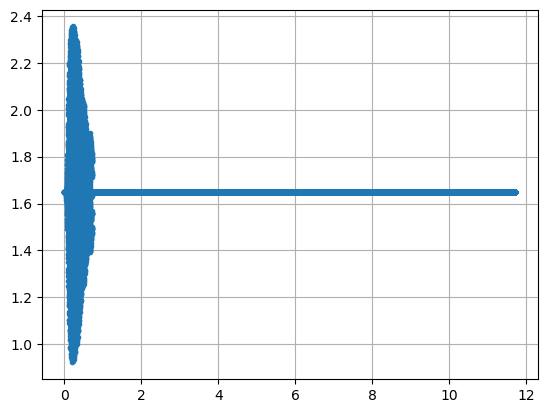

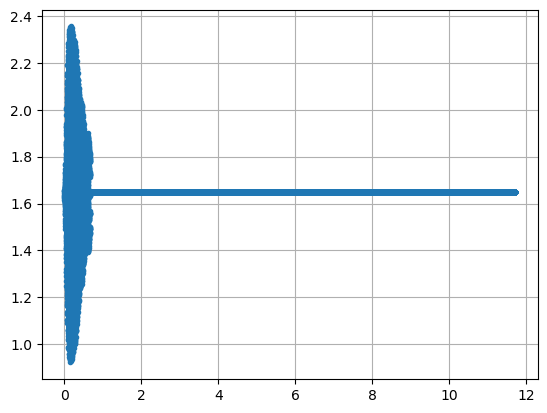

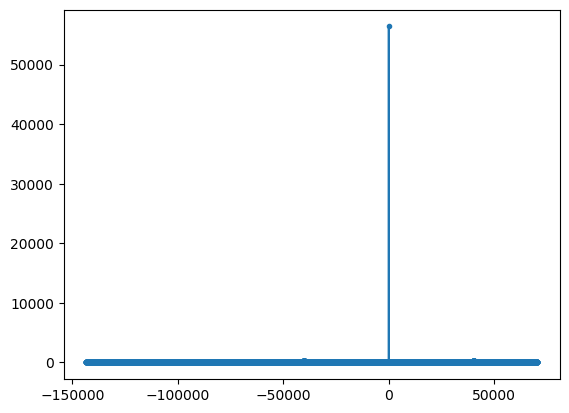

Lower:150
Upper:2100
(34200,)
(34200,)


In [159]:
#Recieved waveform
v_rx=(x_rx*(3.3/(2^12)))

IgnoreTime=0.01

#Time
S=29200 #Number of samples expected
CS=Int(floor((S+(500000*IgnoreTime)))) #Number of samples with compensation
c = 343 # Speed of sound in air in m/s
timeSample=20/343 +IgnoreTime # Amount of time sampled for
dt=timeSample/CS
t=collect(0:dt:timeSample)[1:CS] # t=0:dt:t_max defines a “range”.
r = c*t/2;

Lower=150
Upper=2100
println("Lower:",Lower)
println("Upper:",Upper)

chirp=zeros(CS)
println(size(chirp))
println(size(t))
for n = 1:CS
    chirp[n]=1.65
    if n>(Lower-1)&& n < (Upper+1)
        chirp[n]=v_rx[n]
    end
end

#Plot
figure()
plot(r,chirp,".-")
grid("on")
show()

i =0
for n = 1:CS
    chirp[n]=1.65
    if n>(Lower-1)&& n < (Upper+1)
        chirp[1+i]=v_rx[n]
        i+=1
    end
end

#Plot
figure()
plot(r,chirp,".-")
grid("on")
show()

N = length(t);
Δf = 1/(N*dt) # spacing in frequency domain
#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 # case N even
    f_axis = (-N/2:N/2-1)*Δf;
    else # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf;
end

CHIRP = fft(chirp)
figure()
plot(f_axis[7300:21900],fftshift(abs.(CHIRP))[7300:21900],".-") 
show()

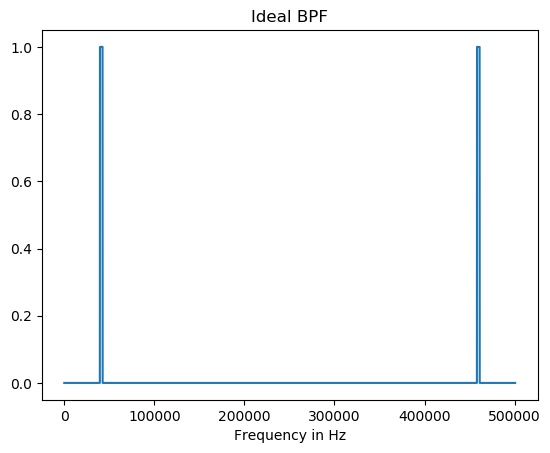

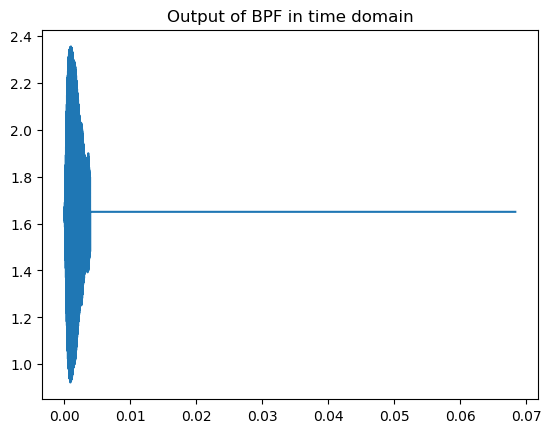

PyObject Text(0.5, 1, 'Output of BPF in time domain')

In [160]:
function rect(t)
    N = length(t)
    x = zeros(N)  # create array of zeros
    for n=1:N
        abs_t = abs(t[n]);    
        if abs_t > 0.5 
            x[n]=0.0
        elseif abs_t < 0.5 
            x[n]=1.0
        else
            x[n]=0.5     # case of t[n] = 0.5 (rising edge) or -0.5 (falling edge) 
        end
    end
    return x

end

Δt=dt
Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s

ω = 0:Δω:(N-1)*Δω
f = ω/(2*π)

## Pass square wave through a BPF centred on fundamental ω0
## The BPF is narrow enough only to allow the fundamental component to pass.

ω0=41000*2π

B = 3000 # filter bandwidth in Hz

# In the sampled frequency domain, position two rect() 
# i.e. centred on ω0 rad/s and on 2pi/Δt-ω0 rad/s.

H = rect((ω .- ω0)/(2*π*B)) + rect( (ω .+ (ω0 .- 2*π/Δt) )/(2*π*B) )

figure()
plot(f,H);    # Note, H in this case is purely real.
title("Ideal BPF")
xlabel("Frequency in Hz")



#Y = CHIRP .* H
Y = CHIRP 
y = ifft(Y)   # Transform back to time domain using inverse transform

figure()
plot(t,y)
title("Output of BPF in time domain")

In [161]:
MF = conj(Y);

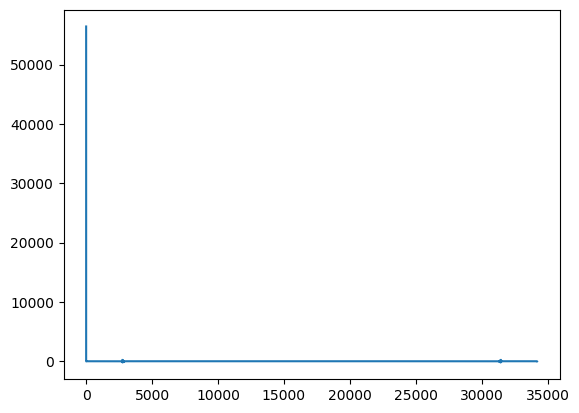

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdddb5fe128>

In [162]:
plot(MF)

In [239]:
sp=SerialPort("/dev/ttyACM35", 9600)

SerialPort("/dev/ttyACM35", 9600, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x7fdddb49f0b8, open=True>(port='/dev/ttyACM35', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

## Transmit and Sample

Time taken to sample 0.05443500000000002 s
Time between transmitting and receiving 58859 us
Finished Reading
Number of samples received (29201,)


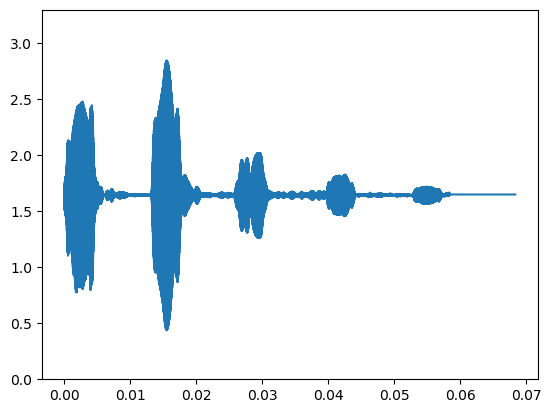

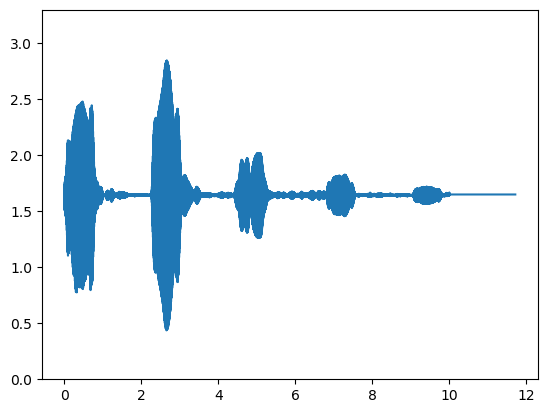

(34200,)
(34200,)


In [244]:
x_rx1=zeros(Int16,CS) # Samples values recieved
#data=Array{Union{Nothing,String}}(nothing,S)
data=""

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

# Transmit and Sample command
write(sp,"t") 

while bytesavailable(sp) < 1
    continue # wait for a response    
end  
sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to

timeString=readavailable(sp)
timeArray=split(timeString,"\n")

# Get timing information
time = parse(UInt16,timeArray[1])
timeSeconds = time*10^-6
println("Time taken to sample ",timeSeconds, " s")

timeBetweenTransmitAndRecieve = parse(UInt16,timeArray[2])
println("Time between transmitting and receiving ",timeBetweenTransmitAndRecieve, " us")

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

#Grab samples
write(sp,"p") # Print DMA buffer

while bytesavailable(sp) < 1   
    continue # wait for a response    
end 

sleep(0.05)

while true
    if bytesavailable(sp) < 1
        sleep(0.010) # Wait and check again
        if bytesavailable(sp) < 1
            println("Finished Reading")
            break
        end
    end
    data=string(data,readavailable(sp))
    i += 1 
end

samples = split(data,"\r\n")
println("Number of samples received ", size(samples))

for n in 1:S
    #print(x_rx[n])
    x_rx[n]=parse(UInt16,samples[n])
end
for n in S:CS
    x_rx[n]=2048
end

# Convert ADC output to voltage
v_rx=(x_rx.*(3.3/(2^12)))

#Plot
figure()
plot(t[1:CS],v_rx[1:CS],"-")
ylim([0,3.3])
show()

figure()
plot(r[1:CS],v_rx,"-")
ylim([0,3.3])
show()

println(size(v_rx))
println(size(t))

Time taken to sample 0.05443600000000002 s
Time between transmitting and receiving 58858 us
Finished Reading
Number of samples received (29201,)


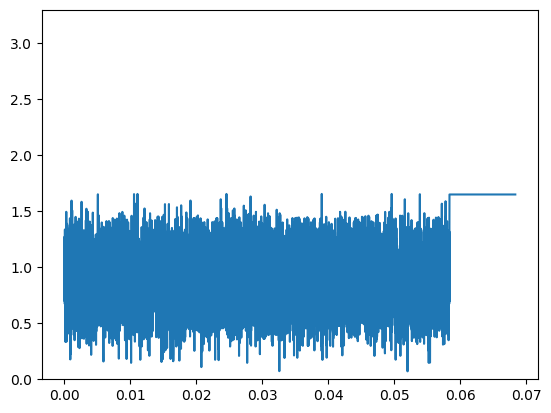

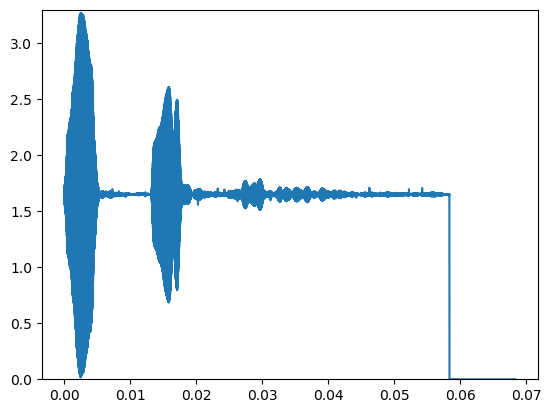

Finished Reading
Number of samples received (29201,)


In [243]:
x_rx=zeros(Int16,CS) # Samples values recieved
#data=Array{Union{Nothing,String}}(nothing,S)
data=""

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

# Transmit and Sample command
write(sp,"t") 

while bytesavailable(sp) < 1
    continue # wait for a response    
end  
sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to

timeString=readavailable(sp)
timeArray=split(timeString,"\n")

# Get timing information
time = parse(UInt16,timeArray[1])
timeSeconds = time*10^-6
println("Time taken to sample ",timeSeconds, " s")

timeBetweenTransmitAndRecieve = parse(UInt16,timeArray[2])
println("Time between transmitting and receiving ",timeBetweenTransmitAndRecieve, " us")

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

#Grab samples
write(sp,"p") # Print DMA buffer

while bytesavailable(sp) < 1   
    continue # wait for a response    
end 

sleep(0.05)

while true
    if bytesavailable(sp) < 1
        sleep(0.010) # Wait and check again
        if bytesavailable(sp) < 1
            println("Finished Reading")
            break
        end
    end
    data=string(data,readavailable(sp))
    i += 1 
end

samples = split(data,"\r\n")
println("Number of samples received ", size(samples))

for n in 1:S
    #print(x_rx[n])
    x_rx[n]=parse(UInt16,samples[n])
end
for n in S:CS
    x_rx[n]=2048
end

# Convert ADC output to voltage
v_rx=(x_rx.*(3.3/(2^12)))

#Plot
figure()
plot(t[1:CS],v_rx[1:CS],"-")
ylim([0,3.3])
show()

#x_rx=zeros(Int16,CS) # Samples values recieved
#data=Array{Union{Nothing,String}}(nothing,S)
data=""

#Grab samples
write(sp,"o") # Print DMA buffer

while bytesavailable(sp) < 1   
    continue # wait for a response    
end 

sleep(0.05)

while true
    if bytesavailable(sp) < 1
        sleep(0.010) # Wait and check again
        if bytesavailable(sp) < 1
            println("Finished Reading")
            break
        end
    end
    data=string(data,readavailable(sp))
    i += 1 
end

samples = split(data,"\r\n")
println("Number of samples received ", size(samples))
#print(samples)

for n in 1:S
    #print(x_rx[n])
    x_rx[n]=parse(UInt16,samples[n])
end
for n in S:CS
    x_rx[n]=0
end

# Convert ADC output to voltage
v_rx=(x_rx.*(3.3/(2^12)))

#Plot
figure()
plot(t[1:CS],v_rx[1:CS],"-")
ylim([0,3.3])
show()

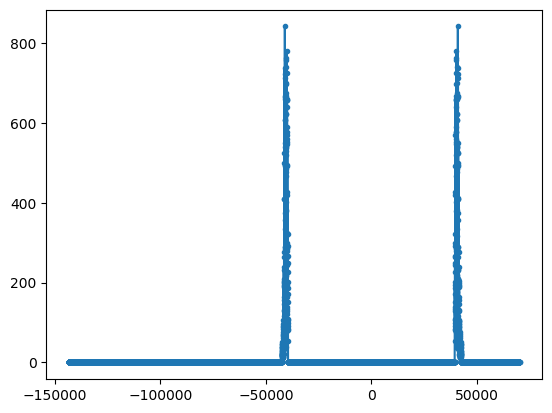

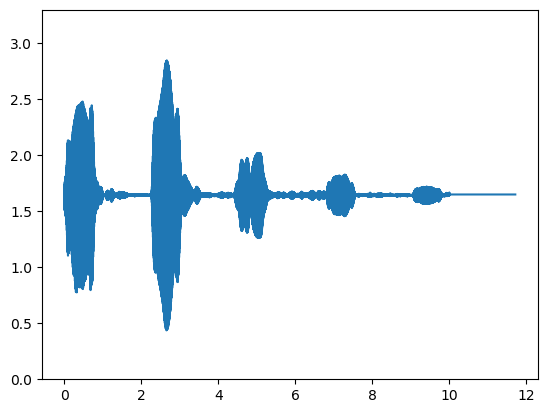

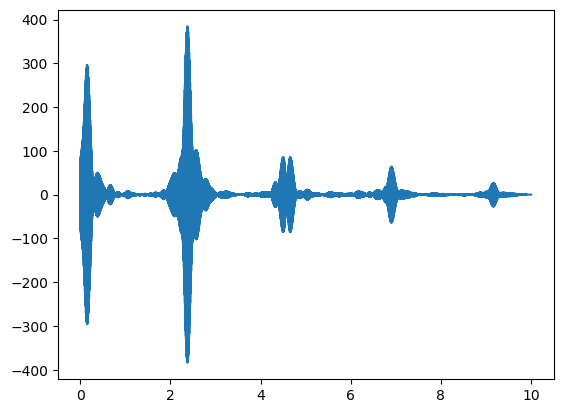

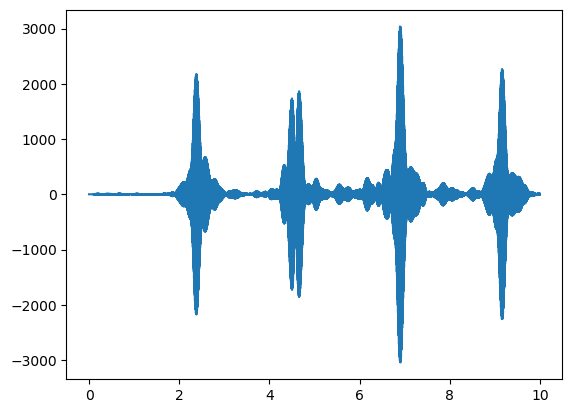

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdddb3b6860>

In [245]:
V_RX = fft(v_rx)

V_RX = V_RX .* H

#v_rx=ifft(V_RX)

figure()
plot(f_axis[7300:21900],fftshift(abs.(V_RX))[7300:21900],".-") 


figure()
plot(r[1:CS],v_rx[1:CS])
ylim([0,3.3])
show()

V_MF = MF[1:CS].*V_RX[1:CS];
v_mf = ifft(V_MF[1:CS]);


figure()
plot(r[1:S],v_mf[1:S])


v_mf=v_mf.*r[1:CS].*r[1:CS]
#V_MF=fft(v_mf)

figure()
plot(r[1:S],v_mf[1:S])

In [256]:
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
if mod(N,2)==0 # case N even
neg_freq_range = Int(N/2):N; # Define range of "neg-freq" components
else # case N odd
neg_freq_range = Int((N+1)/2):N;
end
V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*ω0*t);

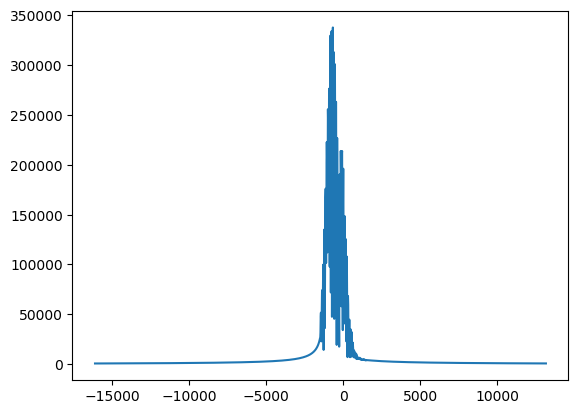

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fddda791c18>

In [268]:
V_BB= fft(v_bb)

figure()
plot(f_axis[16000:18000],fftshift(abs.(V_BB))[16000:18000],"-") 

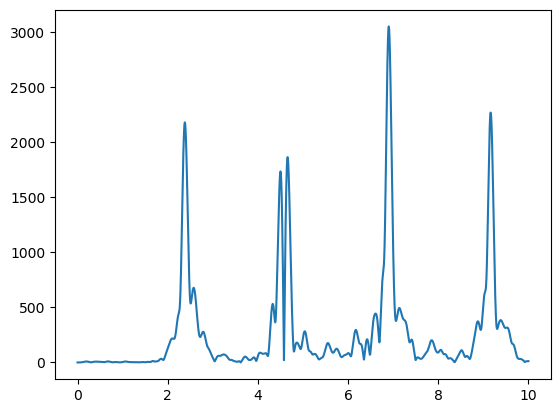

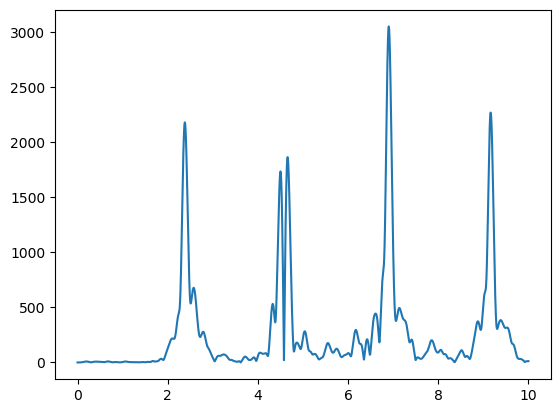

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdddad486a0>

In [257]:
figure()
plot(r[1:S],abs.(v_anal.*r.*r)[1:S])

figure()
plot(r[1:S],abs.(v_bb.*r.*r)[1:S])

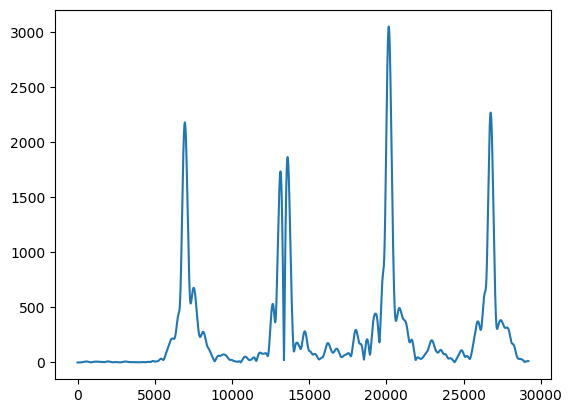

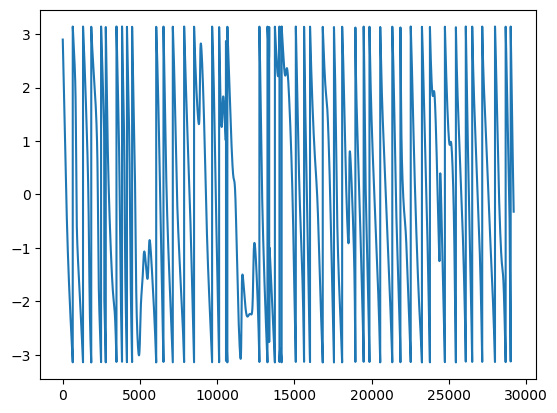

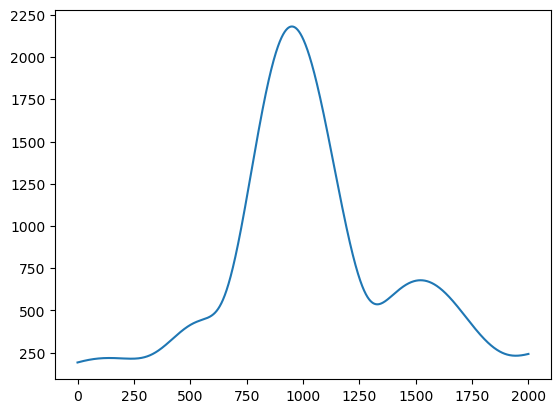

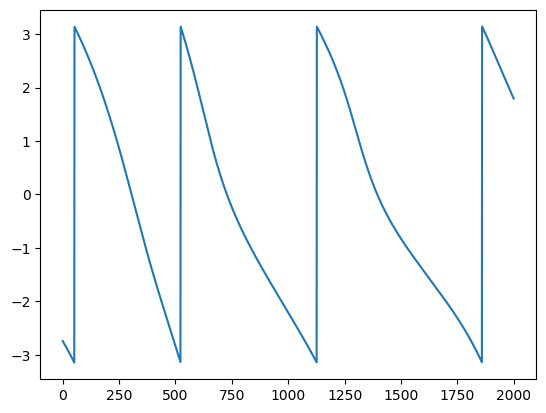

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fddda62d400>

In [269]:
figure()
plot(abs.(v_bb.*r.*r)[1:S])

figure()
plot(angle.(v_bb)[1:S])

figure()
plot(abs.(v_bb.*r.*r)[6000:8000])

figure()
plot(angle.(v_bb)[6000:8000])



In [155]:
print(x_rx)

Int16[2064, 2041, 2015, 1998, 1999, 2015, 2030, 2497, 2229, 1919, 1648, 1475, 1442, 1555, 1779, 2073, 2355, 2562, 2643, 2578, 2379, 2096, 1796, 1553, 1432, 1466, 1651, 1934, 2248, 2510, 2656, 2641, 2472, 2194, 1878, 1608, 1453, 1445, 1601, 1860, 2161, 2427, 2594, 2621, 2508, 2282, 1996, 1727, 1533, 1470, 1545, 1749, 2026, 2310, 2527, 2629, 2585, 2402, 2121, 1820, 1572, 1444, 1473, 1651, 1935, 2253, 2511, 2648, 2627, 2453, 2175, 1860, 1600, 1459, 1473, 1633, 1897, 2200, 2453, 2599, 2603, 2465, 2222, 1936, 1682, 1521, 1494, 1606, 1828, 2107, 2374, 2555, 2605, 2509, 2296, 2014, 1736, 1544, 1481, 1567, 1782, 2067, 2344, 2545, 2610, 2522, 2309, 2028, 1756, 1564, 1504, 1588, 1790, 2058, 2316, 2495, 2559, 2487, 2300, 2052, 1807, 1628, 1561, 1616, 1784, 2017, 2255, 2438, 2516, 2478, 2323, 2093, 1852, 1665, 1578, 1614, 1769, 1994, 2237, 2423, 2508, 2465, 2315, 2089, 1853, 1675, 1596, 1644, 1796, 2013, 2235, 2400, 2467, 2422, 2275, 2075, 1870, 1715, 1650, 1689, 1821, 2012, 2206, 2357, 2424, 2392

, 2036, 2033, 2035, 2039, 2049, 2058, 2065, 2066, 2062, 2054, 2044, 2034, 2025, 2020, 2024, 2036, 2048, 2064, 2077, 2080, 2075, 2061, 2045, 2028, 2016, 2011, 2015, 2031, 2049, 2068, 2083, 2090, 2085, 2067, 2047, 2025, 2009, 1999, 2004, 2019, 2043, 2067, 2088, 2099, 2099, 2083, 2058, 2031, 2007, 1992, 1989, 2004, 2031, 2060, 2087, 2104, 2108, 2098, 2074, 2040, 2008, 1985, 1977, 1990, 2016, 2052, 2085, 2109, 2119, 2109, 2085, 2050, 2013, 1982, 1971, 1977, 2001, 2037, 2077, 2108, 2125, 2123, 2101, 2067, 2025, 1986, 1964, 1961, 1981, 2020, 2064, 2104, 2129, 2135, 2117, 2083, 2040, 1996, 1962, 1952, 1965, 2000, 2048, 2095, 2128, 2144, 2133, 2100, 2053, 2006, 1966, 1946, 1949, 1982, 2030, 2081, 2125, 2148, 2145, 2119, 2073, 2019, 1974, 1945, 1940, 1963, 2008, 2063, 2113, 2146, 2156, 2136, 2095, 2041, 1985, 1948, 1934, 1946, 1986, 2044, 2099, 2143, 2161, 2152, 2114, 2061, 2000, 1954, 1931, 1936, 1969, 2023, 2081, 2131, 2164, 2162, 2133, 2081, 2020, 1966, 1931, 1926, 1950, 1998, 2060, 2119, 21

 2013, 1990, 1981, 1988, 2010, 2040, 2071, 2098, 2109, 2106, 2088, 2061, 2032, 2004, 1987, 1984, 1997, 2024, 2055, 2084, 2103, 2108, 2096, 2074, 2047, 2018, 1994, 1986, 1992, 2012, 2039, 2069, 2092, 2107, 2103, 2087, 2062, 2033, 2007, 1991, 1988, 2000, 2025, 2050, 2079, 2099, 2103, 2094, 2073, 2049, 2023, 2000, 1990, 1994, 2011, 2035, 2066, 2088, 2099, 2102, 2089, 2065, 2035, 2010, 1996, 1991, 1999, 2023, 2049, 2077, 2095, 2102, 2096, 2080, 2053, 2026, 2006, 1993, 1993, 2010, 2033, 2059, 2082, 2098, 2099, 2090, 2068, 2041, 2016, 1999, 1993, 1998, 2019, 2043, 2070, 2089, 2101, 2097, 2081, 2059, 2032, 2008, 1997, 1998, 2006, 2028, 2053, 2078, 2095, 2102, 2093, 2073, 2047, 2023, 2003, 1992, 1998, 2014, 2038, 2064, 2086, 2100, 2097, 2087, 2062, 2034, 2013, 1995, 1994, 2005, 2025, 2049, 2074, 2093, 2098, 2094, 2076, 2052, 2025, 2005, 1993, 1994, 2012, 2035, 2060, 2085, 2099, 2101, 2089, 2066, 2041, 2013, 1995, 1989, 1998, 2021, 2047, 2074, 2093, 2104, 2099, 2082, 2054, 2028, 2005, 1987, 199

 2116, 2436, 2658, 2728, 2628, 2383, 2052, 1718, 1468, 1362, 1427, 1646, 1965, 2310, 2583, 2724, 2694, 2502, 2196, 1851, 1555, 1384, 1375, 1535, 1825, 2171, 2484, 2689, 2731, 2604, 2335, 1991, 1663, 1431, 1352, 1446, 1690, 2026, 2366, 2628, 2741, 2679, 2462, 2137, 1788, 1506, 1356, 1383, 1573, 1881, 2234, 2540, 2721, 2733, 2572, 2280, 1923, 1600, 1391, 1346, 1472, 1747, 2095, 2431, 2672, 2754, 2661, 2410, 2068, 1719, 1452, 1336, 1397, 1622, 1952, 2309, 2598, 2750, 2723, 2528, 2210, 1847, 1537, 1357, 1347, 1513, 1813, 2175, 2502, 2714, 2761, 2624, 2345, 1988, 1642, 1400, 1322, 1425, 1683, 2037, 2391, 2659, 2772, 2702, 2468, 2125, 1764, 1470, 1324, 1359, 1568, 1896, 2267, 2579, 2758, 2757, 2577, 2262, 1894, 1564, 1352, 1316, 1467, 1763, 2131, 2477, 2711, 2785, 2668, 2394, 2030, 1670, 1409, 1302, 1386, 1635, 1992, 2363, 2651, 2788, 2738, 2513, 2169, 1793, 1484, 1314, 1325, 1524, 1852, 2233, 2565, 2765, 2784, 2618, 2304, 1927, 1579, 1350, 1295, 1429, 1720, 2094, 2459, 2716, 2805, 2702, 243

, 1985, 1923, 1891, 1899, 1941, 2014, 2094, 2162, 2199, 2198, 2157, 2088, 2009, 1939, 1897, 1894, 1928, 1992, 2072, 2144, 2191, 2201, 2170, 2109, 2030, 1955, 1905, 1890, 1918, 1976, 2052, 2127, 2182, 2201, 2181, 2128, 2051, 1974, 1916, 1892, 1908, 1956, 2031, 2106, 2169, 2198, 2189, 2143, 2073, 1995, 1930, 1897, 1900, 1943, 2012, 2088, 2150, 2186, 2192, 2155, 2092, 2018, 1949, 1907, 1901, 1933, 1990, 2066, 2135, 2178, 2189, 2165, 2108, 2036, 1968, 1920, 1902, 1923, 1975, 2045, 2117, 2165, 2185, 2169, 2123, 2059, 1988, 1934, 1910, 1921, 1960, 2027, 2095, 2148, 2179, 2169, 2135, 2073, 2008, 1952, 1920, 1921, 1949, 2011, 2075, 2133, 2168, 2170, 2139, 2089, 2027, 1969, 1931, 1925, 1948, 1996, 2057, 2113, 2153, 2166, 2147, 2103, 2044, 1987, 1947, 1931, 1947, 1987, 2043, 2095, 2138, 2155, 2144, 2109, 2059, 2006, 1961, 1942, 1947, 1979, 2029, 2079, 2121, 2140, 2139, 2113, 2067, 2021, 1980, 1955, 1955, 1978, 2020, 2064, 2105, 2129, 2133, 2113, 2079, 2035, 1996, 1971, 1966, 1982, 2017, 2053, 20

 2082, 2094, 2091, 2077, 2059, 2035, 2015, 2008, 2006, 2016, 2033, 2054, 2074, 2088, 2093, 2083, 2068, 2046, 2023, 2008, 2003, 2009, 2023, 2044, 2065, 2083, 2090, 2087, 2076, 2056, 2033, 2016, 2006, 2008, 2018, 2039, 2057, 2075, 2087, 2090, 2082, 2065, 2043, 2025, 2008, 2006, 2013, 2029, 2051, 2069, 2082, 2090, 2086, 2073, 2052, 2031, 2012, 2007, 2008, 2022, 2039, 2059, 2075, 2085, 2087, 2077, 2063, 2041, 2023, 2010, 2008, 2015, 2034, 2051, 2070, 2082, 2086, 2081, 2066, 2050, 2030, 2016, 2009, 2011, 2023, 2043, 2059, 2080, 2085, 2084, 2074, 2057, 2039, 2022, 2011, 2010, 2019, 2034, 2053, 2071, 2084, 2085, 2078, 2065, 2046, 2031, 2017, 2012, 2015, 2025, 2043, 2063, 2077, 2085, 2081, 2070, 2054, 2038, 2023, 2015, 2013, 2021, 2036, 2054, 2070, 2080, 2082, 2076, 2064, 2046, 2029, 2018, 2015, 2018, 2029, 2045, 2061, 2073, 2083, 2081, 2068, 2054, 2036, 2024, 2016, 2018, 2024, 2038, 2054, 2068, 2078, 2081, 2074, 2063, 2046, 2029, 2019, 2013, 2020, 2032, 2047, 2061, 2073, 2077, 2077, 2067, 205

, 2009, 2006, 2010, 2024, 2045, 2066, 2082, 2090, 2088, 2077, 2060, 2038, 2018, 2006, 2004, 2015, 2032, 2054, 2072, 2085, 2090, 2085, 2071, 2051, 2029, 2013, 2004, 2007, 2020, 2038, 2062, 2079, 2087, 2089, 2080, 2064, 2043, 2022, 2008, 2003, 2010, 2026, 2048, 2069, 2086, 2092, 2089, 2076, 2055, 2034, 2014, 2003, 2001, 2014, 2034, 2056, 2077, 2091, 2092, 2087, 2068, 2045, 2025, 2005, 1997, 2005, 2020, 2043, 2067, 2087, 2096, 2093, 2079, 2059, 2035, 2015, 2000, 1995, 2008, 2028, 2053, 2077, 2094, 2099, 2090, 2073, 2047, 2024, 2004, 1994, 1998, 2015, 2040, 2066, 2088, 2098, 2098, 2085, 2062, 2034, 2013, 1995, 1991, 2005, 2025, 2051, 2079, 2097, 2104, 2096, 2076, 2050, 2021, 1998, 1989, 1992, 2011, 2038, 2066, 2091, 2103, 2105, 2090, 2065, 2034, 2009, 1990, 1986, 1997, 2023, 2052, 2081, 2103, 2109, 2101, 2078, 2047, 2018, 1993, 1984, 1988, 2007, 2037, 2068, 2095, 2109, 2108, 2093, 2065, 2032, 2004, 1984, 1982, 1995, 2023, 2056, 2086, 2107, 2113, 2103, 2079, 2044, 2013, 1988, 1975, 1986, 20

, 2096, 2143, 2164, 2158, 2121, 2059, 1996, 1947, 1925, 1933, 1972, 2031, 2093, 2143, 2168, 2163, 2128, 2070, 2003, 1948, 1919, 1925, 1963, 2023, 2089, 2144, 2174, 2170, 2134, 2078, 2011, 1948, 1915, 1916, 1950, 2013, 2082, 2144, 2179, 2181, 2148, 2085, 2018, 1953, 1912, 1907, 1938, 1999, 2073, 2141, 2184, 2190, 2159, 2100, 2024, 1957, 1913, 1900, 1925, 1986, 2062, 2135, 2185, 2198, 2173, 2111, 2034, 1958, 1908, 1891, 1913, 1971, 2048, 2127, 2184, 2207, 2187, 2130, 2051, 1969, 1909, 1883, 1899, 1954, 2033, 2115, 2180, 2212, 2198, 2147, 2067, 1980, 1913, 1878, 1887, 1941, 2021, 2106, 2177, 2216, 2210, 2164, 2085, 1995, 1918, 1876, 1874, 1919, 1999, 2094, 2170, 2218, 2223, 2181, 2107, 2012, 1928, 1874, 1862, 1900, 1975, 2072, 2163, 2217, 2231, 2197, 2125, 2032, 1942, 1877, 1858, 1885, 1955, 2050, 2146, 2216, 2238, 2214, 2145, 2054, 1956, 1884, 1852, 1869, 1934, 2029, 2125, 2207, 2246, 2231, 2169, 2077, 1975, 1892, 1848, 1856, 1911, 2000, 2104, 2192, 2246, 2246, 2192, 2103, 1996, 1906, 18

 2105, 2131, 2135, 2116, 2080, 2038, 1995, 1966, 1956, 1969, 2003, 2048, 2091, 2123, 2136, 2127, 2095, 2054, 2013, 1975, 1960, 1963, 1986, 2029, 2074, 2111, 2131, 2132, 2110, 2073, 2031, 1990, 1966, 1961, 1974, 2011, 2053, 2095, 2123, 2132, 2120, 2088, 2048, 2006, 1975, 1961, 1969, 1998, 2035, 2078, 2112, 2130, 2125, 2103, 2066, 2024, 1987, 1967, 1966, 1985, 2020, 2061, 2099, 2120, 2126, 2109, 2080, 2040, 2004, 1976, 1968, 1979, 2007, 2042, 2079, 2110, 2122, 2118, 2093, 2057, 2020, 1988, 1972, 1974, 1995, 2029, 2064, 2096, 2114, 2117, 2101, 2071, 2037, 2004, 1982, 1977, 1989, 2014, 2049, 2081, 2102, 2113, 2107, 2083, 2053, 2020, 1993, 1982, 1985, 2005, 2034, 2068, 2092, 2106, 2109, 2094, 2066, 2036, 2009, 1990, 1986, 1998, 2022, 2051, 2079, 2098, 2103, 2097, 2077, 2049, 2022, 1999, 1989, 1994, 2012, 2039, 2066, 2088, 2100, 2098, 2084, 2061, 2037, 2015, 1998, 1994, 2004, 2026, 2051, 2073, 2093, 2098, 2088, 2073, 2051, 2027, 2008, 1997, 2000, 2017, 2039, 2064, 2082, 2093, 2093, 2082, 206

, 1990, 1986, 1997, 2021, 2051, 2079, 2100, 2106, 2099, 2079, 2053, 2025, 1998, 1989, 1989, 2007, 2032, 2063, 2088, 2103, 2105, 2093, 2069, 2040, 2013, 1994, 1989, 1995, 2017, 2045, 2073, 2095, 2105, 2102, 2085, 2059, 2030, 2005, 1990, 1991, 2003, 2027, 2055, 2081, 2099, 2104, 2095, 2074, 2048, 2020, 1997, 1988, 1994, 2011, 2038, 2065, 2090, 2102, 2104, 2088, 2064, 2036, 2010, 1992, 1988, 2000, 2021, 2049, 2075, 2097, 2106, 2100, 2084, 2055, 2025, 2001, 1987, 1987, 2004, 2031, 2060, 2088, 2104, 2107, 2096, 2072, 2042, 2014, 1992, 1982, 1993, 2017, 2042, 2073, 2096, 2107, 2106, 2088, 2060, 2029, 2000, 1985, 1982, 1997, 2024, 2053, 2085, 2105, 2113, 2102, 2080, 2049, 2016, 1987, 1979, 1984, 2006, 2039, 2070, 2097, 2113, 2114, 2097, 2068, 2032, 1999, 1979, 1973, 1988, 2018, 2054, 2086, 2111, 2120, 2112, 2086, 2049, 2015, 1984, 1970, 1975, 1998, 2031, 2073, 2104, 2124, 2120, 2105, 2069, 2032, 1994, 1973, 1965, 1982, 2014, 2054, 2094, 2120, 2129, 2117, 2090, 2053, 2010, 1977, 1960, 1967, 19

 2010, 1999, 2000, 2015, 2038, 2062, 2083, 2091, 2093, 2081, 2062, 2039, 2016, 2006, 1999, 2007, 2027, 2050, 2073, 2089, 2094, 2083, 2072, 2051, 2027, 2012, 2004, 2006, 2017, 2038, 2062, 2079, 2090, 2089, 2079, 2061, 2040, 2021, 2009, 2006, 2012, 2028, 2048, 2068, 2084, 2090, 2086, 2070, 2050, 2028, 2014, 2008, 2012, 2019, 2038, 2056, 2075, 2085, 2087, 2079, 2063, 2043, 2024, 2012, 2007, 2015, 2027, 2045, 2065, 2079, 2088, 2082, 2074, 2055, 2037, 2020, 2010, 2010, 2021, 2033, 2052, 2070, 2083, 2086, 2081, 2066, 2049, 2030, 2016, 2007, 2011, 2025, 2040, 2058, 2075, 2086, 2086, 2078, 2060, 2043, 2024, 2012, 2008, 2013, 2032, 2046, 2064, 2079, 2086, 2086, 2073, 2055, 2034, 2020, 2007, 2008, 2018, 2035, 2055, 2072, 2086, 2090, 2083, 2067, 2048, 2027, 2012, 2005, 2008, 2021, 2040, 2063, 2080, 2090, 2089, 2080, 2061, 2038, 2018, 2004, 2001, 2011, 2027, 2050, 2072, 2090, 2096, 2087, 2074, 2053, 2028, 2009, 1999, 2000, 2016, 2037, 2064, 2081, 2099, 2096, 2085, 2067, 2039, 2013, 1996, 1992, 200

, 2102, 2125, 2126, 2113, 2080, 2037, 1997, 1971, 1962, 1974, 2005, 2046, 2087, 2119, 2132, 2124, 2096, 2058, 2014, 1978, 1961, 1965, 1987, 2026, 2069, 2107, 2130, 2133, 2112, 2074, 2033, 1993, 1966, 1961, 1973, 2007, 2051, 2091, 2124, 2134, 2125, 2095, 2054, 2007, 1975, 1958, 1963, 1990, 2030, 2074, 2110, 2133, 2132, 2111, 2072, 2029, 1987, 1962, 1957, 1976, 2014, 2056, 2094, 2125, 2135, 2123, 2090, 2050, 2004, 1972, 1957, 1968, 1996, 2037, 2079, 2114, 2133, 2130, 2106, 2067, 2024, 1985, 1962, 1964, 1977, 2019, 2061, 2099, 2125, 2131, 2117, 2084, 2045, 2003, 1970, 1960, 1969, 1998, 2040, 2079, 2111, 2129, 2124, 2098, 2063, 2023, 1986, 1967, 1967, 1985, 2020, 2062, 2098, 2121, 2127, 2111, 2081, 2040, 2005, 1975, 1966, 1976, 2005, 2041, 2082, 2111, 2125, 2119, 2096, 2060, 2023, 1989, 1971, 1971, 1987, 2022, 2060, 2097, 2117, 2122, 2109, 2079, 2043, 2007, 1980, 1971, 1979, 2006, 2042, 2077, 2108, 2120, 2114, 2093, 2062, 2025, 1993, 1977, 1974, 1991, 2023, 2061, 2094, 2115, 2118, 2104, 20

 1982, 1981, 1997, 2026, 2059, 2088, 2107, 2111, 2100, 2077, 2045, 2014, 1988, 1981, 1987, 2010, 2042, 2074, 2098, 2111, 2106, 2088, 2060, 2029, 1999, 1983, 1983, 1998, 2025, 2057, 2088, 2105, 2109, 2098, 2075, 2045, 2015, 1991, 1981, 1988, 2011, 2041, 2073, 2098, 2110, 2106, 2088, 2060, 2030, 2001, 1984, 1982, 1997, 2024, 2056, 2085, 2106, 2109, 2101, 2076, 2044, 2014, 1991, 1983, 1990, 2011, 2041, 2071, 2097, 2110, 2107, 2090, 2061, 2029, 2003, 1986, 1982, 1996, 2024, 2055, 2083, 2103, 2109, 2101, 2078, 2045, 2014, 1991, 1983, 1990, 2011, 2040, 2070, 2096, 2109, 2107, 2090, 2064, 2032, 2003, 1986, 1984, 1997, 2023, 2054, 2082, 2103, 2111, 2102, 2079, 2047, 2017, 1992, 1982, 1989, 2008, 2039, 2068, 2095, 2108, 2107, 2092, 2065, 2033, 2006, 1986, 1984, 1997, 2023, 2054, 2082, 2103, 2109, 2101, 2079, 2050, 2021, 1992, 1982, 1988, 2008, 2036, 2068, 2094, 2107, 2105, 2091, 2065, 2036, 2008, 1987, 1981, 1995, 2022, 2054, 2083, 2103, 2110, 2101, 2080, 2051, 2021, 1995, 1984, 1986, 2006, 203

 1996, 1991, 1999, 2021, 2049, 2074, 2093, 2100, 2096, 2079, 2055, 2027, 2000, 1991, 1993, 2010, 2036, 2062, 2087, 2102, 2101, 2088, 2067, 2040, 2015, 1996, 1990, 1998, 2021, 2050, 2077, 2094, 2104, 2098, 2078, 2052, 2026, 2007, 1974, 1991, 2010, 2034, 2063, 2088, 2101, 2102, 2089, 2066, 2037, 2009, 1993, 1988, 1997, 2019, 2050, 2079, 2099, 2107, 2099, 2079, 2053, 2023, 1998, 1987, 1992, 2007, 2035, 2064, 2086, 2105, 2103, 2089, 2066, 2037, 2009, 1991, 1988, 2001, 2021, 2049, 2078, 2099, 2108, 2099, 2077, 2051, 2023, 1997, 1987, 1990, 2012, 2038, 2067, 2091, 2104, 2103, 2088, 2063, 2034, 2008, 1992, 1987, 2000, 2025, 2053, 2080, 2099, 2106, 2096, 2076, 2048, 2018, 1995, 1987, 1991, 2011, 2039, 2066, 2090, 2104, 2103, 2087, 2063, 2033, 2007, 1989, 1989, 1999, 2024, 2056, 2080, 2099, 2104, 2097, 2075, 2048, 2018, 1997, 1986, 1994, 2013, 2038, 2069, 2090, 2102, 2102, 2087, 2063, 2032, 2007, 1988, 1988, 2000, 2025, 2055, 2082, 2099, 2103, 2095, 2074, 2047, 2019, 1996, 1988, 1995, 2015, 204

, 2092, 2098, 2091, 2069, 2045, 2021, 2004, 1995, 2005, 2022, 2045, 2070, 2090, 2098, 2096, 2080, 2056, 2032, 2006, 1995, 1994, 2008, 2032, 2060, 2082, 2097, 2100, 2089, 2067, 2042, 2017, 1991, 1991, 1999, 2019, 2047, 2073, 2094, 2103, 2098, 2080, 2056, 2027, 2005, 1987, 1993, 2008, 2032, 2061, 2086, 2100, 2104, 2092, 2067, 2040, 2014, 1994, 1993, 1998, 2020, 2047, 2076, 2097, 2105, 2099, 2080, 2050, 2024, 1998, 1989, 2010, 2008, 2034, 2064, 2090, 2101, 2103, 2089, 2066, 2037, 2011, 1993, 1988, 1996, 2020, 2049, 2079, 2100, 2107, 2098, 2080, 2051, 2021, 1998, 1988, 1991, 2001, 2037, 2065, 2090, 2104, 2105, 2088, 2064, 2034, 2007, 1989, 1988, 2000, 2021, 2053, 2080, 2100, 2106, 2098, 2077, 2048, 2019, 1995, 1986, 1991, 2013, 2030, 2069, 2093, 2106, 2106, 2090, 2061, 2031, 2006, 1988, 1986, 2000, 2027, 2074, 2084, 2102, 2106, 2096, 2074, 2045, 2016, 1994, 1986, 1993, 2016, 2044, 2072, 2096, 2105, 2102, 2085, 2058, 2027, 2004, 1987, 1988, 2004, 2030, 2061, 2080, 2104, 2104, 2094, 2072, 20

 1998, 2009, 2031, 2053, 2077, 2093, 2098, 2090, 2070, 2047, 2023, 2006, 1997, 2004, 2019, 2043, 2066, 2085, 2097, 2093, 2072, 2058, 2033, 2012, 1998, 1996, 2010, 2031, 2054, 2077, 2091, 2095, 2088, 2087, 2047, 2020, 2003, 1996, 2001, 2021, 2043, 2067, 2085, 2095, 2094, 2080, 2077, 2036, 2012, 1998, 1998, 2009, 2031, 2055, 2076, 2091, 2095, 2087, 2070, 2040, 2024, 2006, 1998, 2005, 2022, 2043, 2066, 2085, 2095, 2092, 2079, 2059, 2041, 2015, 1999, 1999, 2011, 2029, 2052, 2075, 2091, 2094, 2088, 2070, 2047, 2018, 2008, 1997, 2004, 2020, 2042, 2065, 2083, 2093, 2093, 2080, 2059, 2037, 2031, 2004, 2003, 2011, 2030, 2054, 2075, 2090, 2095, 2087, 2071, 2049, 2026, 2029, 1998, 2003, 2018, 2041, 2064, 2083, 2091, 2091, 2080, 2061, 2037, 2017, 1996, 2000, 2010, 2028, 2052, 2074, 2090, 2094, 2086, 2071, 2050, 2027, 2009, 2001, 2003, 2019, 2039, 2064, 2081, 2093, 2093, 2081, 2061, 2038, 2018, 2004, 1993, 2010, 2027, 2050, 2072, 2089, 2094, 2090, 2073, 2052, 2028, 2010, 2001, 2018, 2018, 2037, 206

 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 204

, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 20

 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 204

In [3]:
while true
    write(sp,"t") 
    sleep(0.08)
    
end

InterruptException: InterruptException: